# Progetto Tesi Calciatori Under 21

## Importazione librerie

In [1]:
import requests
from bs4 import BeautifulSoup as soup
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
import seaborn as sns
import time
from request_get import *
from datetime import datetime
from dateutil import relativedelta
import statsmodels.api as sm
from scipy.stats import f_oneway,kstest,spearmanr,pearsonr,kendalltau
from scipy import stats
import numpy as np
import ruptures as rpt
import Rbeast as rb
import pymannkendall as mk
import warnings
from statsmodels.tools.sm_exceptions import InterpolationWarning
warnings.simplefilter('ignore', InterpolationWarning)


In [2]:
naz_under21=pd.read_excel("Punti_Nazionale_Under21.xlsx")
naz_under21=naz_under21.iloc[::-1]
naz_under21=naz_under21[10:-1]
naz_under21=naz_under21[["Anno","Punti per partita","Europeo"]]
naz_under21["Punteggio_naz_u21"]=naz_under21["Punti per partita"]+naz_under21["Europeo"]
#naz_under21["Punteggio_naz_u21"]=naz_under21["Punti per partita"]

naz_under21.drop(["Europeo"],axis=1,inplace=True)
naz_under21=naz_under21.set_index('Anno')
naz_under21.index.name = None

<Axes: >

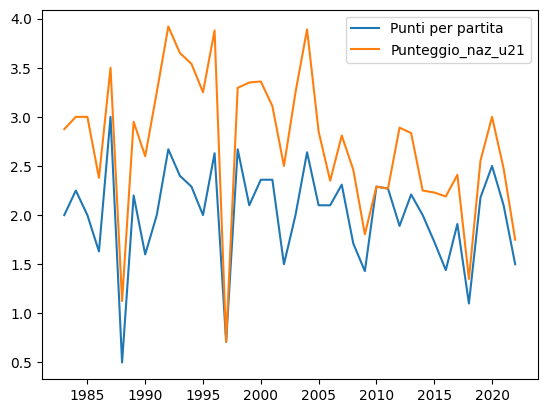

In [223]:
naz_under21.plot()

In [2]:
#get_table_result()

In [3]:
def get_all_teams():
    year_url = f"2022-2023"

    squads_actual=pd.read_excel(f"classifica\Classifica_{year_url}.xlsx")
    year_to_subtract = 55
    current_year=2021
    for i in range(year_to_subtract):
        # Calculate the year to use in the URL
        year_url = f"{current_year - i}-{current_year + 1 - i}"
        squads=pd.read_excel(f"classifica\Classifica_{year_url}.xlsx")
        #create a datafram with all the teams on each year
        squads_actual=pd.merge(squads_actual["Squadra"],squads["Squadra"],how="outer",on="Squadra")
        
    squads_actual.set_index("Squadra",inplace=True)
    all_teams=squads_actual.transpose()
    all_teams.columns.name = None
    all_teams
    return all_teams
all_teams=get_all_teams()


In [4]:
transf_serieA=pd.read_excel("trasfer_SerieA.xlsx",index_col="Stagione")
transf_serieA.index.name = None
transf_serieA[["Spese","Entrate","Saldo"]]=(transf_serieA[["Spese","Entrate","Saldo"]]/1000000)


In [5]:
transf_serieA.drop(["Acquisti","Cessioni","Spese"],axis=1,inplace=True)
transf_serieA=transf_serieA.iloc[::-1]

In [6]:
dataset=pd.read_excel("ITACPI.xls")

valori_01_12 = dataset[dataset['date'].dt.month == 12]
valori_01_12.set_index(valori_01_12['date'].dt.year,inplace=True)
valori_01_12.drop(["date"],axis=1,inplace=True)
valori_01_12.index.name = None
valori_01_12=valori_01_12[7:]


In [27]:
#valori_01_12[23:34]=valori_01_12[3:14]
#valori_01_12[33:44]=valori_01_12[3:14]


In [7]:
transf_serieA=transf_serieA.join(valori_01_12,how="inner")


In [8]:
transf_serieA["Entrate"][34:35]=488.71451

In [9]:
transf_serieA["Entrate"]=transf_serieA["Entrate"]/transf_serieA["ITACPI"]*100
transf_serieA["Saldo"]=transf_serieA["Saldo"]/transf_serieA["ITACPI"]*100
#transf_serieA=transf_serieA.iloc[::-1]
transf_serieA.drop(["ITACPI"],axis=1,inplace=True)

#transf_serieA["Saldo"]=transf_serieA["Saldo"]/transf_serieA["ITACPI"]*100
#inverti il dataframe


In [64]:
transf_serieA

,Entrate,Saldo
1967,4.001625,0.000000
1968,39.259807,0.000000
1969,3.243464,0.000000
1970,0.000000,0.000000
1971,0.000000,0.000000
1972,2.755783,0.000000
1973,0.000000,-0.775552
1974,0.437154,-3.497235
1975,7.103471,-4.814248
1976,0.000000,-2.935231


<Axes: >

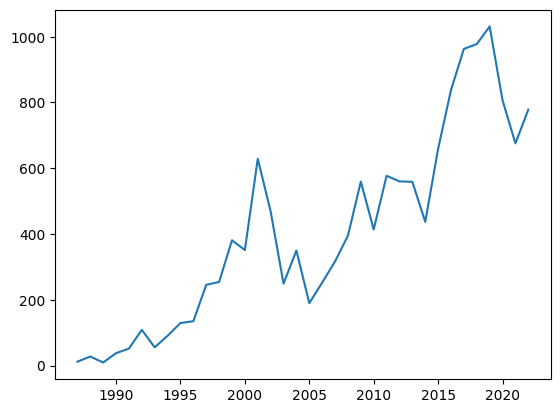

In [65]:
(transf_serieA["Entrate"])[20:].plot()
#(transf_serieA["Saldo"])[20:].plot()


## Importazione dataset

In [4]:
# le funzioni che seguono servono a prendere i dati da fbref e transfermarkt e salvarli in un file xlsx (definite nel file request_get.py)
#get_fbref()
#get_transfermarkt(2022,56)

In [10]:
uefa_ranking=get_uefa_ranking()
uefa_ranking=uefa_ranking[3:]


In [43]:
players_tm=pd.read_excel(f"transfermarkt\SerieA2022-2023-Under21.xlsx")


In [44]:
#players_tm[["Squadra","Minuti giocati","Presenze"]].groupby("Squadra").sum()
result_df=players_tm[["Squadra", "Minuti giocati", "Presenze"]].groupby("Squadra").agg({'Minuti giocati': 'sum', 'Presenze': ['sum', 'count']})
result_df.columns = ['Minuti giocati', 'Presenze (Somma)', 'Numero di giocatori']
result_df.head()



,Minuti giocati,Presenze (Somma),Numero di giocatori
Squadra,,,
ac-florenz,154,7,5
ac-mailand,1616,30,3
ac-monza,1967,40,4
as-rom,3991,78,8
atalanta-bergamo,6750,116,7


In [66]:
res_prova=result_df.join(trasf)
res_prova

,Minuti giocati,Presenze (Somma),Numero di giocatori,22/23
Squadra,,,,
ac-florenz,154,7,5,12.64
ac-mailand,1616,30,3,-46.92
ac-monza,1967,40,4,-46.97
as-rom,3991,78,8,65.24
atalanta-bergamo,6750,116,7,31.75
fc-bologna,1157,25,5,9.45
fc-empoli,3672,65,7,16.51
fc-turin,2214,31,2,23.92
hellas-verona,4310,83,5,-4.58


In [63]:
trasferimenti=pd.read_excel("saldo_trasferimenti.xlsx",index_col="Squadra")
trasf=trasferimenti[["22/23"]]


In [562]:
team_minutes=players_tm[["Squadra","Minuti giocati"]].groupby("Squadra").sum().sort_values(by="Minuti giocati",ascending=False).transpose()
#set the index of the dataframe
team_minutes.columns.name = None
team_minutes=team_minutes.reset_index(drop=True)
team_minutes["Anno"]=year_url
team_minutes=team_minutes.set_index('Anno')
team_minutes.index.name = None
team_minutes_fix=team_minutes


In [563]:
#aggiungi una riga con gli stessi valori della riga precedente
team_minutes.loc[year_url+"1"] = team_minutes.loc[year_url]


In [564]:
team_minutes.head()

,spal,ac-florenz,atalanta-bergamo,lr-vicenza-virtus,brescia-calcio,ac-mailand,inter-mailand,varese-calcio,mantova-1911,sampdoria-genua,cagliari-calcio,fc-bologna,juventus-turin,fc-turin,as-rom
1967-1968,6570,5490,4320,4140,3060,2896,2610,2610,2250,1710,1350,1170,900,270,90
1967-19681,6570,5490,4320,4140,3060,2896,2610,2610,2250,1710,1350,1170,900,270,90


## Estrazione minuti di gioco

In [11]:
#get data from tabel
# Calcola i minuti giocati dai giocatori under 21 per ogni anno, stabilendo come under 21 i giocatori nati dopo il 1 Agosto 
mesi = {
    "gen": 1, "feb": 2, "mar": 3, "apr": 4, "mag": 5, "giu": 6, "lug": 7, "ago": 8, "set": 9, "ott": 10, "nov": 11, "dic": 12
}
mins_played=pd.DataFrame(columns=["Minuti giocati under21","Minuti giocati Italiani","Minuti giocati Stranieri","Minuti giocati Oriundi"])
current_year = 2022

# Define the number of years you want to subtract
year_to_subtract = 56
#year_to_subtract = 28


for i in range(year_to_subtract):
    # Calculate the year to use in the URL
    year_url = f"{current_year - i}-{current_year + 1 - i}"
    
    
    #players_fbref=pd.read_excel(f"fbref\SerieA{year_url}-Under21.xlsx")
    players_tm=pd.read_excel(f"transfermarkt\SerieA{year_url}-Under21.xlsx")
    #players_tm=pd.read_excel(f"SerieB\B{year_url}-Under21.xlsx")

    #squads=pd.read_excel(f"classifica\Classifica_{year_url}.xlsx")
    #players_tm=players_tm.merge(squads,left_on='Squadra', right_on='Squadra')
    #players_tm=pd.read_excel(f"Premier_League\PL{year_url}-Under21.xlsx")
    for j in range(len(players_tm)):
        parti = players_tm.loc[j,"Nato"].split('/')
        giorno_nasc = int(parti[0])
        mese_nasc = mesi[parti[1].lower()]  # Mappa il mese in minuscolo
        anno_nasc = int(parti[2])
        data_nasc = datetime(anno_nasc, mese_nasc, giorno_nasc)
        players_tm.loc[j,"Data di nascita"]=data_nasc
        data_inizio=datetime(current_year-i, 1, 1)
        anni=relativedelta.relativedelta(data_inizio, data_nasc).years
        players_tm.loc[j,"Anni"]=anni
    
    under=players_tm[players_tm["Anni"]<21]
    under_italia=under[under["Nazione"]=="Italia"]
    #under_stranieri = under[~under["Nazione"].str.contains(r'\bItalia\b', case=False, na=False)]
    under_stranieri= under[~under["Nazione"].str.contains(r'\b^Italia$\b|^Italia/\b', case=False, na=False)]
    under_oriundi = under[under["Nazione"].str.contains(r'^Italia/\b', case=False, na=False)]
    #prima_parte=under[under["Posizione"]<6]
    #ultima_parte=under[under["Posizione"]>(under["Posizione"].max()-5)]
    #parte_centrale=under[(under["Posizione"]>5) & (under["Posizione"]<(under["Posizione"].max()-4))]
    #under_stranieri=under[under["Nazione"]!="Italia"]
    mins_played.loc[year_url,"Minuti giocati Italiani"]=under_italia["Minuti giocati"].sum()+under_oriundi["Minuti giocati"].sum()
    #mins_played.loc[year_url,"Num_Giocatori"]=under[under["Presenze"]>0]["Presenze"].count()
    #mins_played.loc[year_url,"Num_Giocatori_Italiani"]=under_italia[under_italia["Presenze"]>0]["Presenze"].count()+under_oriundi[under_oriundi["Presenze"]>0]["Presenze"].count()

    mins_played.loc[year_url,"Minuti giocati under21"]=under["Minuti giocati"].sum()
    mins_played.loc[year_url,"Minuti giocati Stranieri"]=under_stranieri["Minuti giocati"].sum()
    mins_played.loc[year_url,"Minuti giocati Oriundi"]=under_oriundi["Minuti giocati"].sum()
    #mins_played.loc[year_url,"Minuti giocati Prima Parte Classifica"]=prima_parte["Minuti giocati"].sum()
    #mins_played.loc[year_url,"Minuti giocati Parte Centrale Classifica"]=parte_centrale["Minuti giocati"].sum()/(under["Posizione"].max()-10)
    #mins_played.loc[year_url,"Minuti giocati Ultima Parte Classifica"]=ultima_parte["Minuti giocati"].sum()/5
    # count the minutes played for each team
    team_minutes=players_tm[["Squadra","Minuti giocati"]].groupby("Squadra").sum().sort_values(by="Minuti giocati",ascending=False).transpose()
    #set the index of the dataframe
    team_minutes.columns.name = None
    team_minutes=team_minutes.reset_index(drop=True)
    team_minutes["Anno"]=year_url
    team_minutes=team_minutes.set_index('Anno')
    team_minutes.index.name = None
    #all_teams=get_all_teams()
    all_teams.loc[year_url] = team_minutes.loc[year_url]

    




    

    #mins_played.loc[year_url,"Minuti giocati FB"]=players_fbref["Minuti giocati"].sum()
    #mins_played.loc[year_url,"Minuti giocati TM"]=players_tm["Minuti giocati"].sum()
    #mins_played.loc[year_url,"TM - FB"]=mins_played.loc[year_url,"Minuti giocati FIX"]-mins_played.loc[year_url,"Minuti giocati FB"]




In [6]:
mins_played.tail(5)

,Minuti giocati under21,Minuti giocati Italiani,Minuti giocati Stranieri,Minuti giocati Oriundi,Num_Giocatori,Num_Giocatori_Italiani
1971-1972,15450,15450,0,0,NaN,NaN
1970-1971,15117,15117,0,0,NaN,NaN
1969-1970,18376,18376,0,0,NaN,NaN
1968-1969,17546,17546,0,90,NaN,NaN
1967-1968,6480,6480,0,0,NaN,NaN


In [310]:
trasferimenti=pd.read_excel("saldo_trasferimenti.xlsx")
trasf_transpo=trasferimenti.transpose()
trasf_transpo=trasf_transpo.reset_index(drop=True)



In [317]:
trasf_transpo=trasferimenti.set_index("Squadra").transpose()

In [4]:
serieA_topTeams=all_teams.iloc[::-1]
serieA_topTeams=serieA_topTeams[43:].dropna(axis=1, thresh=10,inplace=False)
serieA_topTeams.head(15)

,SSC Napoli,SS Lazio,Inter,AC Milan,Atalanta,AS Roma,Juventus FC,ACF Fiorentina,Bologna FC,Torino FC,Udinese Calcio,US Sassuolo,UC Sampdoria,Cagliari Calcio,Genoa CFC
2010-2011,209.0,211.0,1278.0,2195.0,NaN,31.0,1892.0,2553.0,5164.0,NaN,224.0,NaN,2596.0,498.0,1362.0
2011-2012,0.0,85.0,2267.0,1053.0,929.0,5313.0,NaN,3955.0,3493.0,NaN,1988.0,NaN,NaN,147.0,1152.0
2012-2013,5.0,856.0,1951.0,5947.0,1503.0,5494.0,1753.0,1948.0,6808.0,146.0,945.0,NaN,6140.0,1236.0,2192.0
2013-2014,136.0,4505.0,2987.0,2553.0,1162.0,921.0,3069.0,1231.0,925.0,0.0,5698.0,3355.0,624.0,2309.0,6467.0
2014-2015,15.0,1793.0,2975.0,259.0,247.0,822.0,525.0,224.0,NaN,1734.0,2755.0,2927.0,2820.0,3220.0,1196.0
2015-2016,36.0,5346.0,125.0,7449.0,1073.0,401.0,1231.0,110.0,5236.0,1941.0,2938.0,3362.0,3286.0,NaN,1012.0
2016-2017,1432.0,1056.0,283.0,6113.0,2450.0,132.0,115.0,1685.0,1378.0,2240.0,3917.0,6245.0,5361.0,2600.0,3736.0
2017-2018,751.0,1949.0,502.0,10459.0,614.0,2211.0,581.0,5740.0,661.0,970.0,2332.0,4682.0,832.0,6243.0,699.0
2018-2019,673.0,182.0,1352.0,5405.0,769.0,4519.0,896.0,9580.0,1475.0,4.0,1534.0,9236.0,602.0,1197.0,6851.0
2019-2020,1142.0,256.0,2204.0,6041.0,443.0,3797.0,2719.0,2277.0,6432.0,354.0,NaN,3511.0,2083.0,3654.0,3129.0


In [6]:
serieA_topTeams.rename(columns={"Inter": "Inter Milan", "Bologna FC": "Bologna FC 1909","Atalanta":"Atalanta BC","AC Chievo Verona":"Chievo Verona","Parma Calcio":"Parma Calcio 1913"},inplace=True)
final_data=pd.DataFrame()
for i in range(len(serieA_topTeams.columns)): 
    new_data=pd.DataFrame()
    new_data=serieA_topTeams[:-1].iloc[:, [i]]
    # Itera sulle colonne del DataFrame
    for colonna in new_data.columns:
        # Rinomina le righe combinando il vecchio nome della riga con il nome della colonna
        new_data["Year"]=new_data.index.str[0:4]
        new_data["club"]= colonna 
        new_data.reset_index(drop=True,inplace=True)
    new_data.rename(columns={new_data.columns[0]: "Minuti giocati"}, inplace = True)
    new_data.set_index("club")    
    final_data = pd.concat([final_data, new_data], axis=0)

final_data.set_index("club",inplace=True)
final_data["Year"]=final_data["Year"].astype(int)


In [116]:
new_data=serieA_topTeams.iloc[:, [0]]
for colonna in new_data.columns:
    # Rinomina le righe combinando il vecchio nome della riga con il nome della colonna
    new_data["Year"]=new_data.index.str[0:4]
    new_data["club"]= colonna 
    new_data.reset_index(drop=True,inplace=True)
new_data.rename(columns={new_data.columns[0]: "Minuti giocati"}, inplace = True)
new_data.set_index("club")


,Minuti giocati,Year
club,,
SSC Napoli,209.0,2010
SSC Napoli,0.0,2011
SSC Napoli,5.0,2012
SSC Napoli,136.0,2013
SSC Napoli,15.0,2014
SSC Napoli,36.0,2015
SSC Napoli,1432.0,2016
SSC Napoli,751.0,2017
SSC Napoli,673.0,2018


In [7]:
df_market=pd.DataFrame()
for i in range(2010,2022):
    data=pd.read_csv(f"data/{i}/serie-a.csv")
    data=data[data["age"]<22]
    data=data[data["movement"]=="out"][["club","fee","market_value"]].groupby("club").sum().sort_values("market_value",ascending=False)
    data.index = data.index 
    data["Year"]=i
    df_market=pd.concat([df_market,data])


In [243]:
df_market.index=df_market.index.str.replace('FC Internazionale','Inter Milan')
df_market.index=df_market.index.str.replace('Parma FC','Parma Calcio 1913')

In [8]:
mixed_dataset=pd.merge(final_data,df_market,how="left",on=['club','Year'])

In [9]:
#show the row with Minuiti giocati nan
mixed_dataset.interpolate(limit_direction="both",inplace=True)

In [10]:
#show the row with Minuiti giocati nan
mixed_dataset[mixed_dataset["Minuti giocati"].isnull()]

,Minuti giocati,Year,fee,market_value
club,,,,


In [253]:
#mixed_dataset.to_excel("mixed_dataset.xlsx")


In [254]:
adjusted_dataset=pd.read_excel("mixed_dataset.xlsx",index_col="club")
adjusted_dataset.rename(columns={"Minuti giocati": "Mins_played"},inplace=True)

In [38]:
adjusted_dataset=pd.read_excel("adjusted_dataset.xlsx")


In [230]:
adjusted_dataset.fillna(0,inplace=True)

In [39]:
adjusted_dataset["market_value"]=np.log(adjusted_dataset["market_value"])
adjusted_dataset["fee"]=np.log(adjusted_dataset["fee"])

C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [40]:
adjusted_dataset.head(5)

,club,Mins_played,Year,fee,market_value,Ranking_Area
0,SSC Napoli,209.0,2010,-inf,13.710150,High
1,SSC Napoli,0.0,2011,11.407565,14.994166,High
2,SSC Napoli,5.0,2012,-inf,15.644084,High
3,SSC Napoli,136.0,2013,-inf,15.163584,High
4,SSC Napoli,15.0,2014,-inf,15.226498,High


In [55]:
fix=adjusted_dataset[["Year","Mins_played","market_value"]].groupby("Year").sum()

In [47]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


md = smf.mixedlm("market_value ~ Mins_played + C(Ranking_Area) +Year", adjusted_dataset, groups=adjusted_dataset["club"])

mdf = md.fit()

print(mdf.summary())

                  Mixed Linear Model Regression Results
Model:                 MixedLM      Dependent Variable:      market_value
No. Observations:      180          Method:                  REML        
No. Groups:            15           Scale:                   0.6709      
Min. group size:       12           Log-Likelihood:          -246.1839   
Max. group size:       12           Converged:               Yes         
Mean group size:       12.0                                              
-------------------------------------------------------------------------
                           Coef.   Std.Err.   z    P>|z|  [0.025   0.975]
-------------------------------------------------------------------------
Intercept                 -104.023   36.115 -2.880 0.004 -174.808 -33.238
C(Ranking_Area)[T.Low]      -0.115    0.391 -0.295 0.768   -0.882   0.651
C(Ranking_Area)[T.Medium]   -0.064    0.394 -0.161 0.872   -0.835   0.708
Mins_played                 -0.000    0.000 -0.773 0.439

In [56]:
import statsmodels.api as sm

X = fix[["Mins_played"]]
y = fix["market_value"]
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           market_value   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.092
Method:                 Least Squares   F-statistic:                   0.07717
Date:                Tue, 23 Jan 2024   Prob (F-statistic):              0.787
Time:                        22:30:37   Log-Likelihood:                -35.367
No. Observations:                  12   AIC:                             74.73
Df Residuals:                      10   BIC:                             75.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         239.6964      8.257     29.030      

C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
new_df = pd.DataFrame()

# Raggruppamento per squadra e stagione e somma dei minuti under 21
grouped_df = serieA_topTeams.groupby(['Squadra', 'Stagione'])['Minuti_Under21'].sum().reset_index()

# Aggiunta dei dati raggruppati al nuovo dataframe
new_df['Squadra_Stagione'] = grouped_df['Squadra'] + '_' + grouped_df['Stagione']
new_df['Minuti_Under21'] = grouped_df['Minuti_Under21']

# Visualizzazione del nuovo dataframe
print(new_df)

In [61]:
#all_teams.fillna(0,inplace=True)
all_teams=all_teams.iloc[::-1]

In [969]:
top_teams=all_teams[35:]

#select the column with max 5 NAN values
top_teams=top_teams.loc[:,all_teams.isnull().sum() < 10]
#all_teams.fillna(0,inplace=True)
top_teams.fillna(0,inplace=True)
top_teams=top_teams.astype(float)




In [1013]:
top_teams.head()

,ssc-neapel,lazio-rom,inter-mailand,ac-mailand,atalanta-bergamo,as-rom,juventus-turin,ac-florenz,fc-bologna,fc-turin,...,chievo-verona,palermo-fc,catania-calcio,as-livorno,acn-siena-1904,ssc-bari,reggina-1914,ac-perugia-calcio,piacenza-calcio-1919,lr-vicenza-virtus
1992-1993,1119.0,4195.0,13.0,2148.0,3023.0,1691.0,2962.0,544.0,NaN,1663.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-1994,5082.0,1897.0,147.0,1475.0,6085.0,1135.0,462.0,NaN,NaN,1491.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1994-1995,5806.0,1021.0,1220.0,0.0,NaN,1088.0,3586.0,2719.0,NaN,3810.0,...,NaN,NaN,NaN,NaN,NaN,2296.0,NaN,NaN,NaN,NaN
1995-1996,2045.0,2420.0,1842.0,699.0,4187.0,1736.0,3365.0,99.0,NaN,4764.0,...,NaN,NaN,NaN,NaN,NaN,591.0,NaN,NaN,1228.0,1858.0
1996-1997,1506.0,4203.0,1936.0,1684.0,5145.0,2079.0,1289.0,243.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2868.0,44.0,909.0


In [1009]:
#create a histogram with the minutes played by each team o the dataset
top_teams.sum().sort_values(ascending=False)[:-7]

udinese-calcio       88398.0
ac-mailand           71777.0
ac-florenz           63698.0
as-rom               62408.0
atalanta-bergamo     61598.0
parma-calcio-1913    61354.0
sampdoria-genua      61143.0
fc-bologna           59041.0
fc-empoli            54116.0
cagliari-calcio      50869.0
genua-cfc            50054.0
inter-mailand        48344.0
lazio-rom            43942.0
us-lecce             40616.0
palermo-fc           38361.0
us-sassuolo          37356.0
juventus-turin       36971.0
ssc-neapel           36187.0
hellas-verona        35818.0
fc-turin             34712.0
brescia-calcio       32684.0
ssc-bari             21816.0
reggina-1914         19132.0
dtype: float64

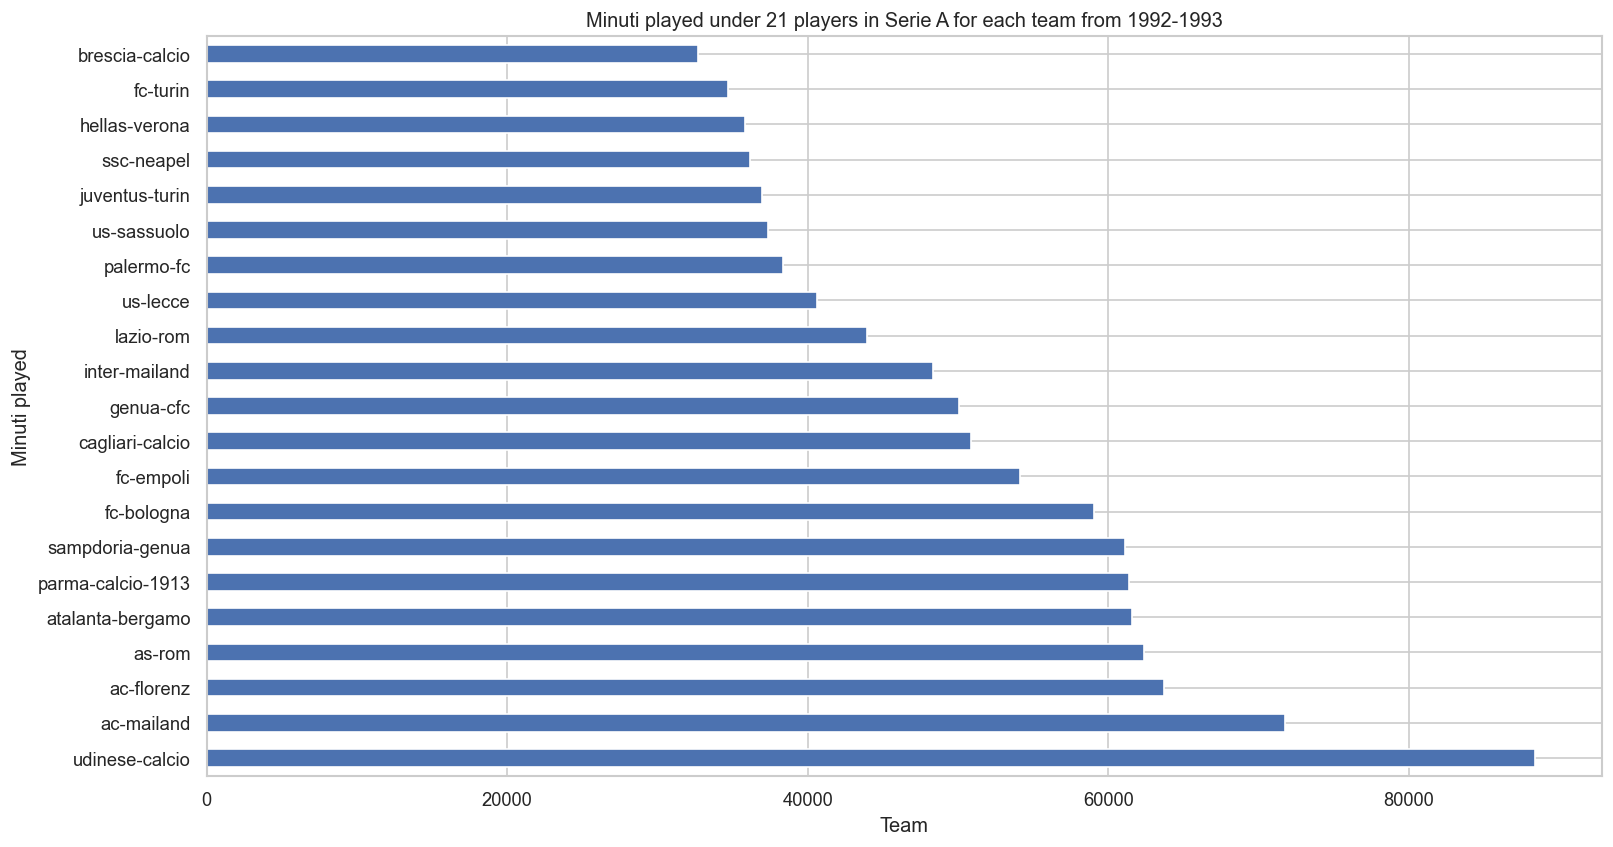

In [1014]:

#all_teams[43:].sum().sort_values(ascending=False)
#create a histogram with the minutes played by each team o the dataset
top_teams.sum().sort_values(ascending=False)[:-9].plot(kind='barh',figsize=(15,8))
plt.title("Minuti played under 21 players in Serie A for each team from 1992-1993")
plt.ylabel("Minuti played")
plt.xlabel("Team")
plt.show()


### Normalizzazione minuti di gioco

In [12]:
mins_played=mins_played.iloc[::-1]

#1967, cioè -56

#mins_played=mins_played/(90*11*38*20)*100


In [174]:
mins_played["Minuti giocati under21"]=mins_played["Minuti giocati under21"].astype(float)


In [34]:
mins_played.head()

,Minuti giocati under21,Minuti giocati Italiani,Minuti giocati Stranieri,Minuti giocati Oriundi
2022-2023,62366,35780,26586,NaN
2021-2022,54971,39659,15312,NaN
2020-2021,53585,41004,12581,NaN
2019-2020,72127,53022,19105,NaN
2018-2019,48760,29055,19705,NaN


In [36]:
"""SERIE B
1967 - 1968	21
1968 - 2003	20
2003 - 2004	24
2004 - 2018	22
2018 - 2019	19
2019 -	20"""
mins_played=mins_played.iloc[::-1]


mins_played[0:1]=mins_played[0:1]/(90*11*40*20)*100
mins_played[1:36]=mins_played[1:36]/(90*11*38*20)*100
mins_played[36:37]=mins_played[36:37]/(90*11*46*20)*100
mins_played[37:51]=mins_played[37:51]/(90*11*43*20)*100
mins_played[51:52]=mins_played[51:52]/(90*11*36*20)*100
mins_played[52:]=mins_played[52:]/(90*11*38*20)*100

mins_played["Minuti giocati under21"]=mins_played["Minuti giocati under21"].astype(float)
mins_played["Minuti giocati Italiani"]=mins_played["Minuti giocati Italiani"].astype(float)
mins_played["Minuti giocati Stranieri"]=mins_played["Minuti giocati Stranieri"].astype(float)


In [37]:
mins_played.head()

,Minuti giocati under21,Minuti giocati Italiani,Minuti giocati Stranieri,Minuti giocati Oriundi
1967-1968,10.594697,10.594697,0.000000,NaN
1968-1969,12.158161,12.158161,0.000000,NaN
1969-1970,9.365896,9.365896,0.000000,NaN
1970-1971,10.147528,10.147528,0.000000,NaN
1971-1972,8.644471,8.614168,0.030303,NaN


In [12]:
#normalize Minuti giocati to total minutes played in the league and create another column(from 2022-2023 to 2004-2005 divided for 3420 minutes, from 2003-2004 to 1988-1989 divided for 3060 minutes and from 1987-1988 to 1968-1969 divided for 2700 minutes)
#mins_played["Minuti giocati normalizzati Fbref"]=0
#inverte l'ordine delle righe del dataframe con in testa 1968 e coda 2022
mins_played=mins_played.iloc[::-1]
#min_copy=mins_played[["Num_Giocatori","Num_Giocatori_Italiani"]]
#1967, cioè -56
mins_played[0:21]=mins_played[0:21]/(90*11*30*20)*100
mins_played[21:37]=mins_played[21:37]/(90*11*34*20)*100
mins_played[37:]=mins_played[37:]/(90*11*38*20)*100
#mins_played["Num_Giocatori"]=(mins_played["Num_Giocatori"]*3000).astype(float)


"""
#1951, cioè -72
mins_played[0:16]=mins_played[0:16]/(90*11*34*20)*100
mins_played[16:37]=mins_played[16:37]/(90*11*30*20)*100
mins_played[37:53]=mins_played[37:53]/(90*11*34*20)*100
mins_played[53:]=mins_played[53:]/(90*11*38*20)*100 """

"""
mins_played["Minuti giocati totali"]=0
mins_played["Minuti giocati totali"][0:19]=594000
mins_played["Minuti giocati totali"][19:35]=673200
mins_played["Minuti giocati totali"][35:]=752400"""

mins_played["Minuti giocati under21"]=mins_played["Minuti giocati under21"].astype(float)
mins_played["Minuti giocati Italiani"]=mins_played["Minuti giocati Italiani"].astype(float)
mins_played["Minuti giocati Stranieri"]=mins_played["Minuti giocati Stranieri"].astype(float)
mins_played["Minuti giocati Oriundi"]=mins_played["Minuti giocati Oriundi"].astype(float)

#mins_played["Num_Giocatori_Italiani"]=min_copy["Num_Giocatori_Italiani"].astype(int)
#mins_played["Num_Giocatori"]=min_copy["Num_Giocatori"].astype(int)


In [141]:
mins_played.tail()

,Minuti giocati under21,Minuti giocati Italiani,Minuti giocati Stranieri,Minuti giocati Oriundi
2018-2019,8.221823,2.669724,5.552100,0.207868
2019-2020,6.539474,2.618820,3.920654,0.102871
2020-2021,6.049575,2.003721,4.045853,0.288942
2021-2022,5.818846,2.303961,3.514886,0.541201
2022-2023,6.184476,3.170920,3.013557,0.767012


In [9]:
mins_played.head()

,Minuti giocati under21,Minuti giocati Italiani,Minuti giocati Stranieri,Minuti giocati Oriundi,Num_Giocatori,Num_Giocatori_Italiani
1967-1968,6.639057,6.639057,0.0,0.000000,NaN,NaN
1968-1969,4.841582,4.841582,0.0,0.015152,NaN,NaN
1969-1970,6.224579,6.224579,0.0,0.000000,NaN,NaN
1970-1971,5.095960,5.095960,0.0,0.000000,NaN,NaN
1971-1972,6.866667,6.866667,0.0,0.007576,NaN,NaN


In [25]:
serie_a=mins_played

In [155]:
mins_played.tail(15)

,Minuti giocati under21,Minuti giocati Italiani,Minuti giocati Stranieri,Minuti giocati Oriundi
2008-2009,5.135832,2.231393,2.904439,0.689527
2009-2010,4.024987,1.214248,2.810739,0.222621
2010-2011,4.347687,1.706539,2.641148,0.114035
2011-2012,4.451223,1.401914,3.049309,0.112573
2012-2013,7.380383,2.694976,4.685407,0.635167
2013-2014,6.482589,2.437666,4.044923,0.101143
2014-2015,5.578150,2.776449,2.801701,0.366162
2015-2016,5.223817,2.592371,2.631446,0.073365
2016-2017,6.999203,2.761696,4.237507,0.191388
2017-2018,6.860712,4.148591,2.712121,0.473551


In [118]:
mins_played.tail(10)

,Minuti giocati under21,Minuti giocati Italiani,Minuti giocati Stranieri,Minuti giocati Oriundi
2013-2014,6.222355,2.437666,3.784689,NaN
2014-2015,5.579346,2.777645,2.801701,NaN
2015-2016,4.778442,2.146996,2.631446,NaN
2016-2017,6.425837,2.729001,3.696837,NaN
2017-2018,6.818979,4.148591,2.670388,NaN
2018-2019,7.797315,2.518208,5.279107,NaN
2019-2020,6.203748,2.602871,3.600877,NaN
2020-2021,5.858852,1.836789,4.022063,NaN
2021-2022,5.723285,2.291600,3.431685,NaN
2022-2023,6.056885,3.043328,3.013557,NaN


In [13]:
italy_ranking = pd.DataFrame()
for i in range(1992, 2023):
    df_temp = pd.read_excel('Ranking_Italy.xlsx', sheet_name=str(i))
    mean= df_temp['Total Points'].mean()
    df_temp = df_temp[df_temp['Team'] == 'Italy']
    df_temp['Year'] = i
    df_temp['Points'] = df_temp['Total Points']/mean
    italy_ranking = pd.concat([italy_ranking, df_temp], ignore_index=True)
italy_ranking = italy_ranking[['Year', 'RK','Total Points','Points']]
italy_ranking['Year'] = italy_ranking['Year'].astype(int)
italy_ranking['RK'] = italy_ranking['RK'].astype(int)
italy_ranking['Points'] = italy_ranking['Points']+(1/italy_ranking['RK'])
italy_ranking['Points'] = italy_ranking['Points'].astype(float)

italy_ranking.head()

,Year,RK,Total Points,Points
0,1992,2,57.0,1.856497
1,1993,3,59.0,1.623797
2,1994,2,62.0,1.823655
3,1995,6,58.0,1.367495
4,1996,5,61.0,1.404581


In [14]:
italy_ranking["Points"][14:17]=italy_ranking["Points"][14:17]-0.55
italy_ranking["Points"][15:16]=italy_ranking["Points"][15:16]-0.2

In [15]:
italy_ranking=italy_ranking[['Year','Points','RK']]
italy_ranking=italy_ranking.set_index('Year')
italy_ranking.index.name = None
italy_ranking.rename(columns={'Points':'FifaPoints'}, inplace=True)
#italy_ranking=italy_ranking[4:]

In [79]:
italy_ranking.head()

,FifaPoints,RK
1996,4.804581,5
1997,3.560329,16
1998,4.522938,6
1999,3.928981,10
2000,4.503368,6


<Axes: >

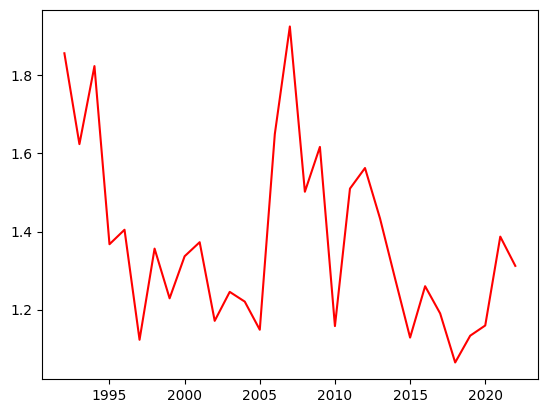

In [72]:
(italy_ranking["FifaPoints"]).plot(color="red")


In [160]:
#make the adf test to check if the series is stationary
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(italy_ranking["FifaPoints"])
print ("ADF = " + str(adf_test[0]))
print ("p-value = " +str(adf_test[1]))
print ("Critical values = " +str(adf_test[4]))



ADF = -3.6374193084942927
p-value = 0.00508465440672498
Critical values = {'1%': -3.6699197407407405, '5%': -2.9640707407407407, '10%': -2.621171111111111}


In [16]:
#!!!!!!join the dataframe mins_played with uefa_ranking and italy_ranking!!!!!!!!
mins_played.index=mins_played.index.str[:4].astype(int)
#convert the index of mins_played to DateTime
mins_played=mins_played.join(uefa_ranking,how='outer')
mins_played=mins_played.join(italy_ranking,how='outer')
mins_played=mins_played.join(naz_under21,how='outer')
mins_played=mins_played.join(transf_serieA,how='outer')




In [78]:
#!!!!!!join the dataframe mins_played with uefa_ranking and italy_ranking!!!!!!!!
serie_a.index=serie_a.index.str[:4].astype(int)
#convert the index of mins_played to DateTime
serie_aser=serie_a.join(uefa_ranking,how='outer')
serie_a=serie_a.join(italy_ranking,how='outer')

In [79]:
serie_a=serie_a.join(naz_under21,how='outer')

In [122]:
mins_played=mins_played.join(naz_under21,how='outer')

In [783]:
mins_array=mins_played["Minuti giocati under21"].to_numpy()
#convert the series in numpy array


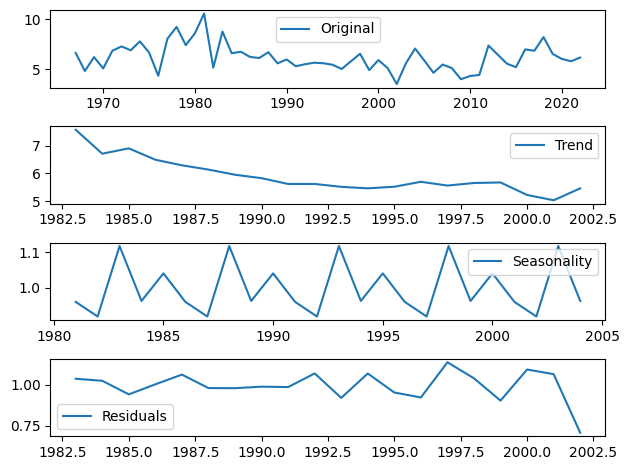

In [46]:
#seasonal decomposition of the time series
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(mins_played["Minuti giocati under21"][14:38], period=5,model="multiplicative")
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(mins_played["Minuti giocati under21"], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [43]:
#calculate the variance of the trend
import statistics
strenght=1-(statistics.variance(trend.dropna())/(statistics.variance(trend.dropna())+statistics.variance(residual.dropna())))
#statistics.variance(trend.dropna())
print("Variance of trend : % s " % strenght)


Variance of trend : 0.3842438070529772 


## Grafici

In [67]:
#esegue la media dei minuti giocati normalizzati ogni 8 stagioni
mins_played_10=pd.DataFrame(columns=["Minuti giocati under21"])
mins_played_10.loc["1969-1976","Minuti giocati under21"]=mins_played["Minuti giocati under21"][0:8].mean()
mins_played_10.loc["1977-1984","Minuti giocati under21"]=mins_played["Minuti giocati under21"][8:16].mean()
mins_played_10.loc["1985-1992","Minuti giocati under21"]=mins_played["Minuti giocati under21"][16:24].mean()
mins_played_10.loc["1993-2000","Minuti giocati under21"]=mins_played["Minuti giocati under21"][24:32].mean()
mins_played_10.loc["2001-2008","Minuti giocati under21"]=mins_played["Minuti giocati under21"][32:40].mean()
mins_played_10.loc["2009-2017","Minuti giocati under21"]=mins_played["Minuti giocati under21"][40:48].mean()
mins_played_10.loc["2017-2022","Minuti giocati under21"]=mins_played["Minuti giocati under21"][48:].mean()

mins_played_10.loc["1969-1976","Minuti giocati Italiani"]=(mins_played["Minuti giocati Italiani"][0:8]+mins_played["Minuti giocati Oriundi"][0:8]).mean()
mins_played_10.loc["1977-1984","Minuti giocati Italiani"]=(mins_played["Minuti giocati Italiani"][8:16]+mins_played["Minuti giocati Oriundi"][8:16]).mean()
mins_played_10.loc["1985-1992","Minuti giocati Italiani"]=(mins_played["Minuti giocati Italiani"][16:24]+mins_played["Minuti giocati Oriundi"][16:24]).mean()
mins_played_10.loc["1993-2000","Minuti giocati Italiani"]=(mins_played["Minuti giocati Italiani"][24:32]+mins_played["Minuti giocati Oriundi"][24:32]).mean()
mins_played_10.loc["2001-2008","Minuti giocati Italiani"]=(mins_played["Minuti giocati Italiani"][32:40]+mins_played["Minuti giocati Oriundi"][32:40]).mean()
mins_played_10.loc["2009-2017","Minuti giocati Italiani"]=(mins_played["Minuti giocati Italiani"][40:48]+mins_played["Minuti giocati Oriundi"][40:48]).mean()
mins_played_10.loc["2017-2022","Minuti giocati Italiani"]=(mins_played["Minuti giocati Italiani"][48:]+mins_played["Minuti giocati Oriundi"][48:]).mean()


mins_played_10.loc["1969-1976","Minuti giocati Stranieri"]=mins_played["Minuti giocati Stranieri"][0:8].mean()
mins_played_10.loc["1977-1984","Minuti giocati Stranieri"]=mins_played["Minuti giocati Stranieri"][8:16].mean()
mins_played_10.loc["1985-1992","Minuti giocati Stranieri"]=mins_played["Minuti giocati Stranieri"][16:24].mean()
mins_played_10.loc["1993-2000","Minuti giocati Stranieri"]=mins_played["Minuti giocati Stranieri"][24:32].mean()
mins_played_10.loc["2001-2008","Minuti giocati Stranieri"]=mins_played["Minuti giocati Stranieri"][32:40].mean()
mins_played_10.loc["2009-2017","Minuti giocati Stranieri"]=mins_played["Minuti giocati Stranieri"][40:48].mean()
mins_played_10.loc["2017-2022","Minuti giocati Stranieri"]=mins_played["Minuti giocati Stranieri"][48:].mean()

#mins_played_10.head(8)

In [172]:
serie_a[28:][["Minuti giocati under21"]]

,Minuti giocati under21
1995-1996,5.172311
1996-1997,4.260844
1997-1998,5.555704
1998-1999,5.621064
1999-2000,4.505348
2000-2001,5.928996
2001-2002,4.913844
2002-2003,3.509804
2003-2004,4.816993
2004-2005,6.406433


In [40]:
mins_played.head(8)

,Minuti giocati under21,Minuti giocati Italiani,Minuti giocati Stranieri,Minuti giocati Oriundi
1967-1968,10.594697,10.594697,0.000000,NaN
1968-1969,12.158161,12.158161,0.000000,NaN
1969-1970,9.365896,9.365896,0.000000,NaN
1970-1971,10.147528,10.147528,0.000000,NaN
1971-1972,8.644471,8.614168,0.030303,NaN
1972-1973,9.899920,9.889952,0.009968,NaN
1973-1974,8.822568,8.738836,0.083732,NaN
1974-1975,11.808480,11.505715,0.302764,NaN


In [41]:
SerieA_SerieB=mins_played[["Minuti giocati under21"]].merge(serie_a[["Minuti giocati under21"]],left_index=True,right_index=True,suffixes=('SerieB', 'SeriaA'))

In [42]:
SerieA_SerieB.head(8)   

,Minuti giocati under21SerieB,Minuti giocati under21SeriaA
1967-1968,10.594697,5.987542
1968-1969,12.158161,4.841582
1969-1970,9.365896,6.181818
1970-1971,10.147528,5.095118
1971-1972,8.644471,6.451515
1972-1973,9.899920,6.208418
1973-1974,8.822568,6.655892
1974-1975,11.808480,7.756734


In [166]:
serie_a[28:]["Minuti giocati under21"].index

Index(['1995-1996', '1996-1997', '1997-1998', '1998-1999', '1999-2000',
       '2000-2001', '2001-2002', '2002-2003', '2003-2004', '2004-2005',
       '2005-2006', '2006-2007', '2007-2008', '2008-2009', '2009-2010',
       '2010-2011', '2011-2012', '2012-2013', '2013-2014', '2014-2015',
       '2015-2016', '2016-2017', '2017-2018', '2018-2019', '2019-2020',
       '2020-2021', '2021-2022', '2022-2023'],
      dtype='object')

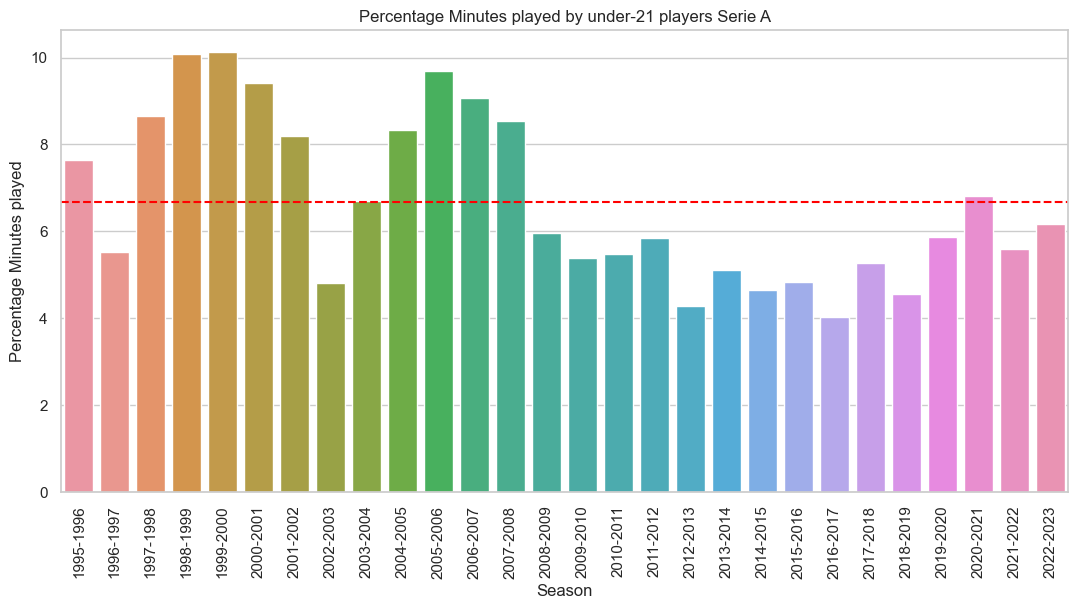

In [158]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(13,6))
sns.barplot(x=mins_played.index, y=mins_played["Minuti giocati under21"])
plt.xticks(rotation=90)
plt.xlabel("Season")
plt.ylabel("Percentage Minutes played")
plt.title("Percentage Minutes played by under-21 players Serie A")
#print line mean
plt.axhline(mins_played["Minuti giocati under21"].mean(), color='red', linestyle='--')

Text(0.5, 1.0, 'Percentage Minutes played by under-21 players Serie A')

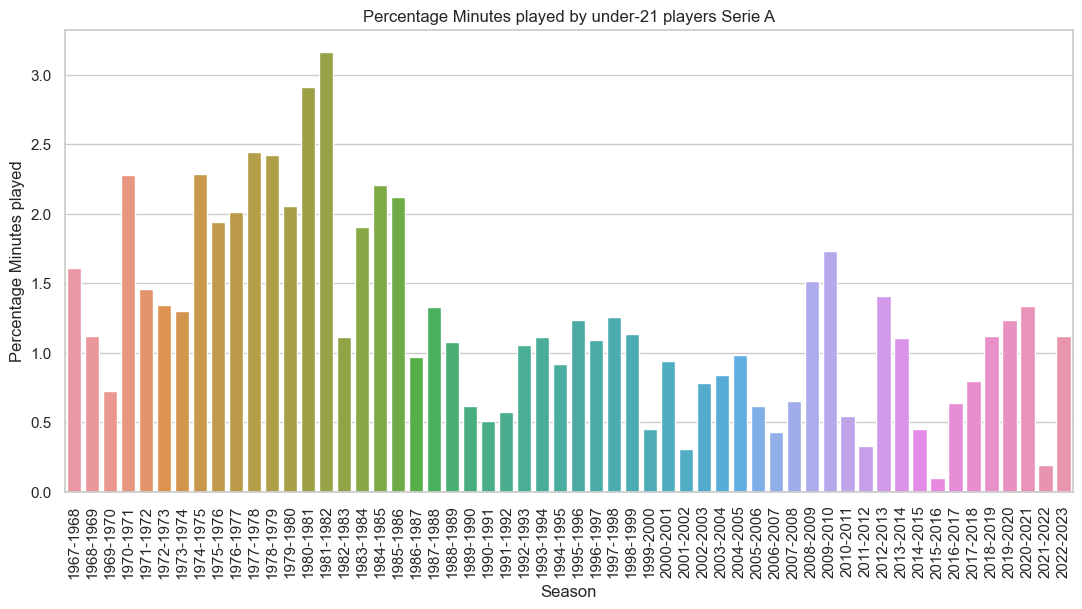

In [14]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(13,6))
sns.barplot(x=mins_played.index, y=mins_played["Minuti giocati Prima Parte Classifica"])
plt.xticks(rotation=90)
plt.xlabel("Season")
plt.ylabel("Percentage Minutes played")
plt.title("Percentage Minutes played by under-21 players Serie A")
#print line mean
#plt.axhline(mins_played["Minuti giocati under21"].mean(), color='red', linestyle='--')


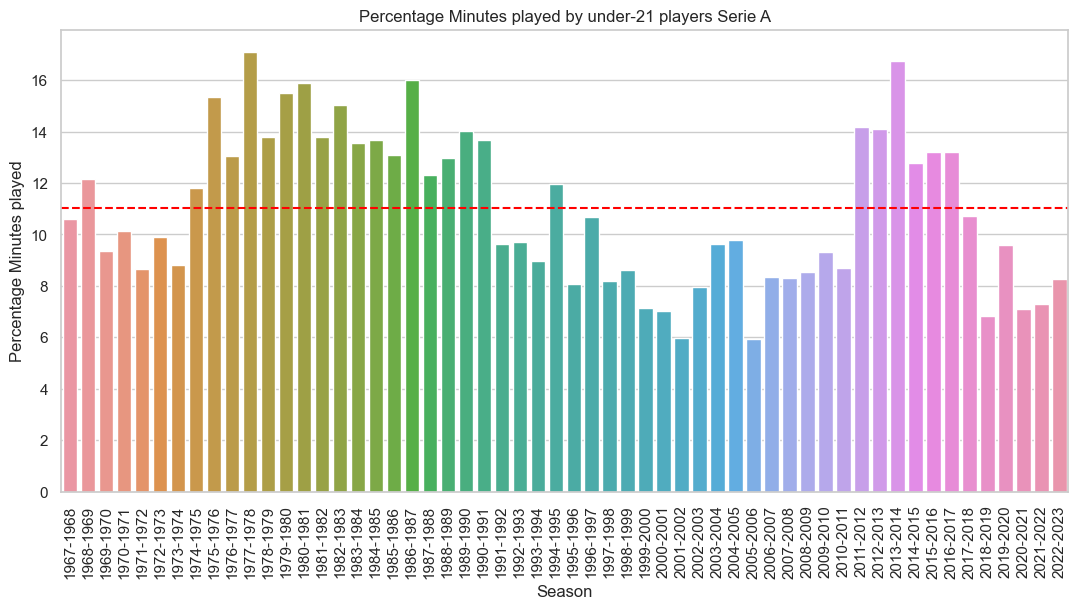

In [38]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(13,6))
sns.barplot(x=mins_played.index, y=mins_played["Minuti giocati under21"])
plt.xticks(rotation=90)
plt.xlabel("Season")
plt.ylabel("Percentage Minutes played")
plt.title("Percentage Minutes played by under-21 players Serie A")
#print line mean
plt.axhline(mins_played["Minuti giocati under21"].mean(), color='red', linestyle='--')

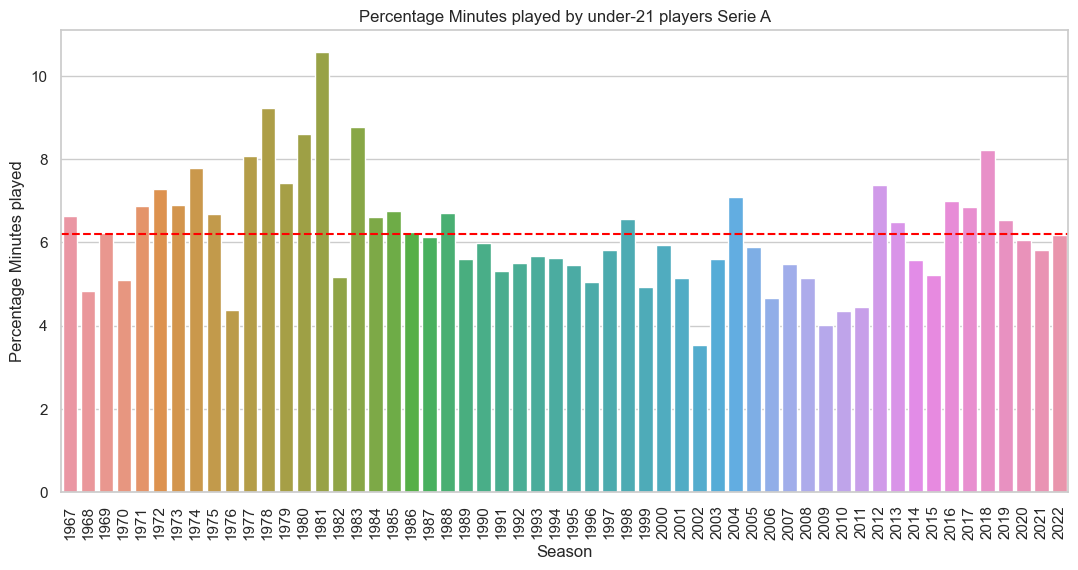

In [157]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(13,6))
sns.barplot(x=mins_played.index, y=mins_played["Minuti giocati under21"])
plt.xticks(rotation=90)
plt.xlabel("Season")
plt.ylabel("Percentage Minutes played")
plt.title("Percentage Minutes played by under-21 players Serie A")
#print line mean
plt.axhline(mins_played["Minuti giocati under21"].mean(), color='red', linestyle='--')


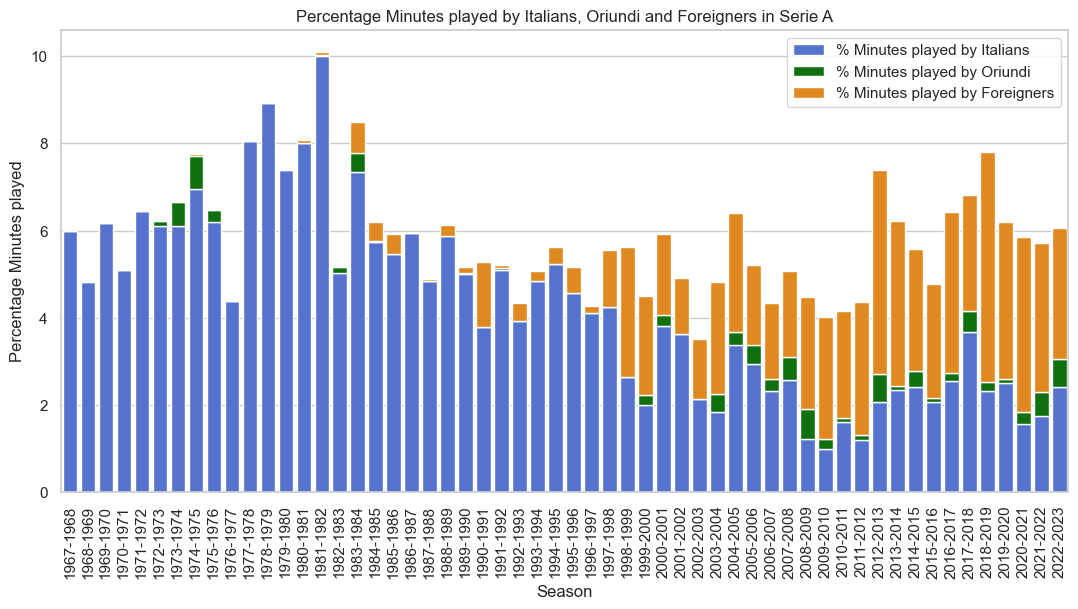

In [57]:
# Supponiamo che tu abbia un DataFrame chiamato 'mins_played' con le colonne "Minuti giocati normalizzati Italiani" e "Minuti giocati normalizzati Stranieri"

plt.figure(figsize=(13, 6))
sns.set_style("whitegrid")
# Crea l'istogramma utilizzando Seaborn
sns.barplot(data=mins_played, x=mins_played.index, y="Minuti giocati Italiani", color="royalblue",label="% Minutes played by Italians")
sns.barplot(data=mins_played, x=mins_played.index, y="Minuti giocati Oriundi",color="green",label="% Minutes played by Oriundi", bottom=mins_played["Minuti giocati Italiani"])
sns.barplot(data=mins_played, x=mins_played.index, y="Minuti giocati Stranieri",color="darkorange",label="% Minutes played by Foreigners", bottom=mins_played["Minuti giocati Italiani"] + mins_played["Minuti giocati Oriundi"])



# Aggiungi etichette e titoli
plt.xticks(rotation=90)
plt.xlabel('Season')
plt.ylabel('Percentage Minutes played') 
plt.title('Percentage Minutes played by Italians, Oriundi and Foreigners in Serie A')

# Aggiungi legenda
plt.legend()

# Mostra l'istogramma
plt.show()

Text(0.5, 1.0, 'Percentual minutes played by Under 21 players every 8 seasons')

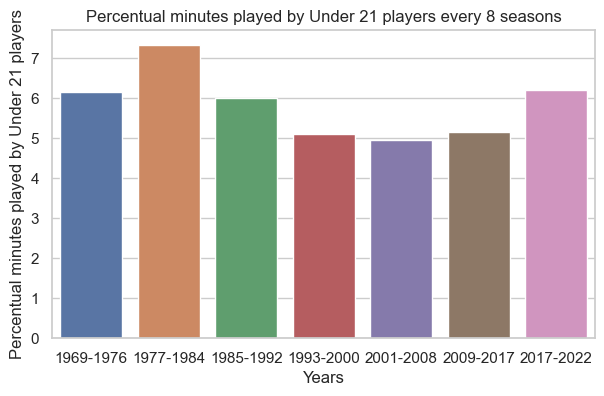

In [10]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(7,4))
#plto two column of barplot for the percentage of minutes played by under 21 italians players and for the percentage of minutes played by under 21 foreigner players

sns.barplot(x=mins_played_10.index, y=mins_played_10["Minuti giocati under21"])


plt.xlabel("Years")
plt.ylabel("Percentual minutes played by Under 21 players")
plt.title("Percentual minutes played by Under 21 players every 8 seasons")

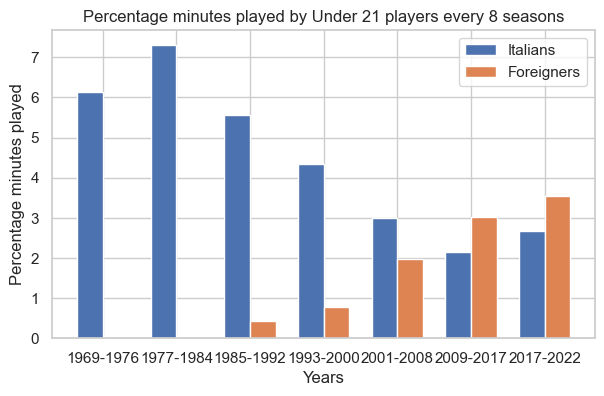

In [11]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(7,4))
larghezza_barre = 0.35
barre_italiani = np.arange(len(mins_played_10.index))
barre_stranieri = [x + larghezza_barre for x in barre_italiani]

# Creazione dell'istogramma
plt.bar(barre_italiani, mins_played_10["Minuti giocati Italiani"], width=larghezza_barre, label='Italians')
plt.bar(barre_stranieri, mins_played_10["Minuti giocati Stranieri"],width=larghezza_barre,  label='Foreigners')

# Personalizzazione del grafico
plt.xlabel('Years')
plt.ylabel('Percentage minutes played')
plt.title('Percentage minutes played by Under 21 players every 8 seasons')
plt.xticks([r + larghezza_barre / 2 for r in range(len(mins_played_10.index))], mins_played_10.index)
plt.legend()

# Visualizzazione del grafico
plt.show()

### Nan

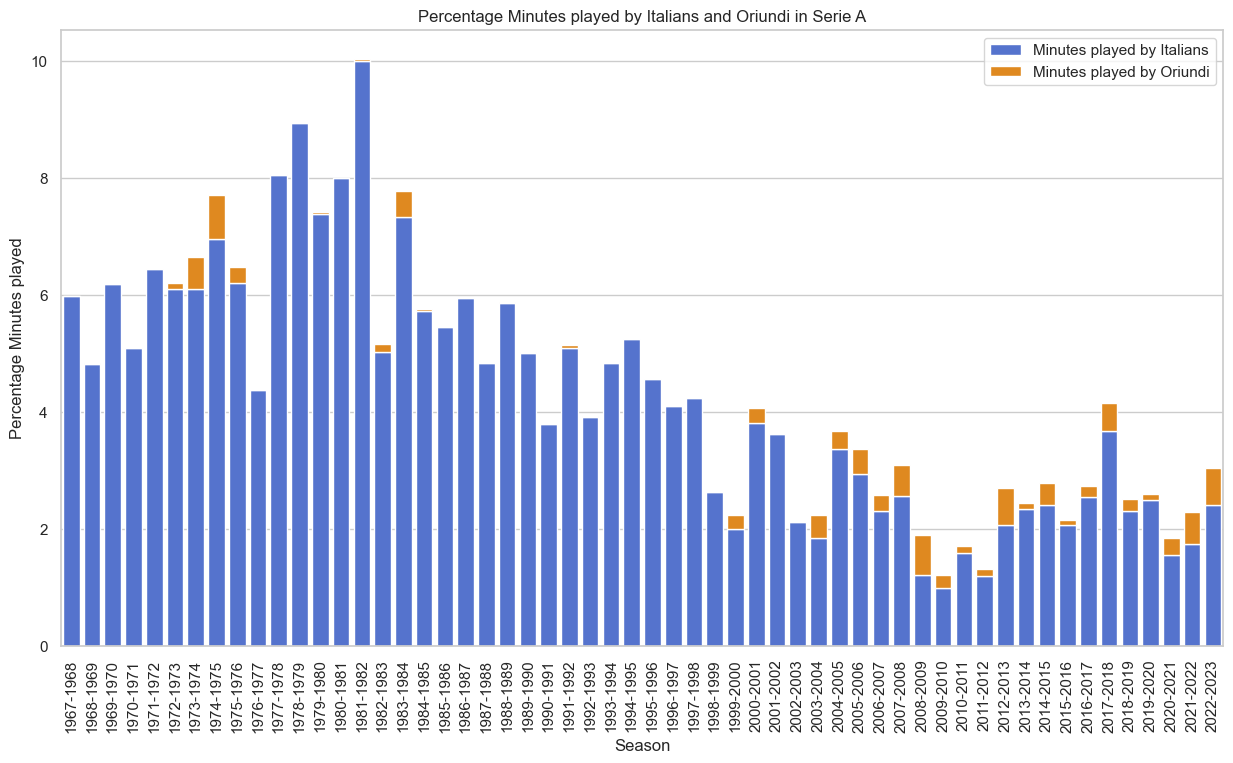

In [14]:
# Supponiamo che tu abbia un DataFrame chiamato 'mins_played' con le colonne "Minuti giocati normalizzati Italiani" e "Minuti giocati normalizzati Stranieri"

plt.figure(figsize=(15, 8))
sns.set_style("whitegrid")
# Crea l'istogramma utilizzando Seaborn
sns.barplot(data=mins_played, x=mins_played.index, y="Minuti giocati Italiani", color="royalblue",label="Minutes played by Italians")
sns.barplot(data=mins_played, x=mins_played.index, y="Minuti giocati Oriundi",color="darkorange",label="Minutes played by Oriundi", bottom=mins_played["Minuti giocati Italiani"])

# Aggiungi etichette e titoli
plt.xticks(rotation=90)
plt.xlabel('Season')
plt.ylabel('Percentage Minutes played') 
plt.title('Percentage Minutes played by Italians and Oriundi in Serie A')

# Aggiungi legenda
plt.legend()

# Mostra l'istogramma
plt.show()

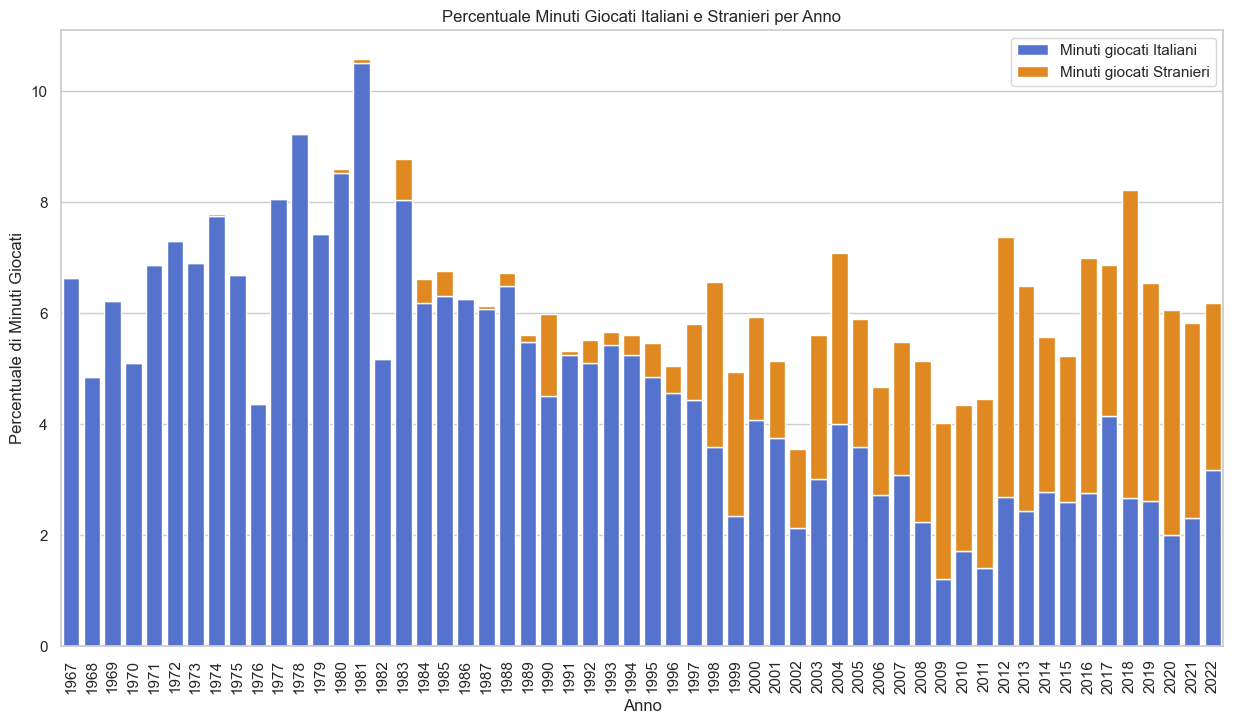

In [75]:
# Supponiamo che tu abbia un DataFrame chiamato 'mins_played' con le colonne "Minuti giocati normalizzati Italiani" e "Minuti giocati normalizzati Stranieri"

plt.figure(figsize=(15, 8))
sns.set_style("whitegrid")
# Crea l'istogramma utilizzando Seaborn
sns.barplot(data=mins_played, x=mins_played.index, y="Minuti giocati Italiani", color="royalblue",label="Minuti giocati Italiani")
sns.barplot(data=mins_played, x=mins_played.index, y="Minuti giocati Stranieri",color="darkorange",label="Minuti giocati Stranieri", bottom=mins_played["Minuti giocati Italiani"])

# Aggiungi etichette e titoli
plt.xticks(rotation=90)
plt.xlabel('Anno')
plt.ylabel('Percentuale di Minuti Giocati')
plt.title('Percentuale Minuti Giocati Italiani e Stranieri per Anno')

# Aggiungi legenda
plt.legend()

# Mostra l'istogramma
plt.show()

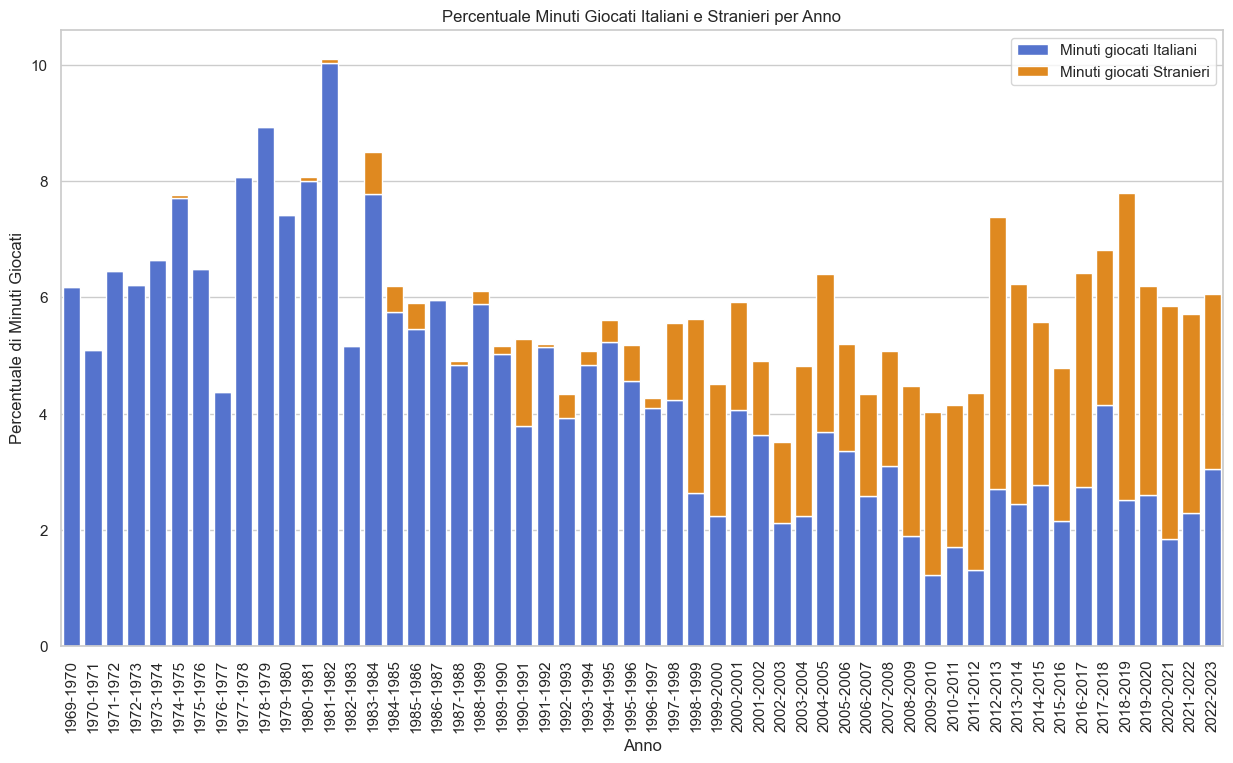

In [ ]:
# Supponiamo che tu abbia un DataFrame chiamato 'mins_played' con le colonne "Minuti giocati normalizzati Italiani" e "Minuti giocati normalizzati Stranieri"

plt.figure(figsize=(15, 8))
sns.set_style("whitegrid")
# Crea l'istogramma utilizzando Seaborn
sns.barplot(data=mins_played, x=mins_played.index, y="Minuti giocati normalizzati Italiani", color="royalblue",label="Minuti giocati Italiani")
sns.barplot(data=mins_played, x=mins_played.index, y="Minuti giocati normalizzati Stranieri",color="darkorange",label="Minuti giocati Stranieri", bottom=mins_played["Minuti giocati normalizzati Italiani"])

# Aggiungi etichette e titoli
plt.xticks(rotation=90)
plt.xlabel('Anno')
plt.ylabel('Percentuale di Minuti Giocati')
plt.title('Percentuale Minuti Giocati Italiani e Stranieri per Anno')

# Aggiungi legenda
plt.legend()

# Mostra l'istogramma
plt.show()

In [863]:
#convert index to datetime
mins_played.index=pd.to_datetime(mins_played.index,format='%Y')

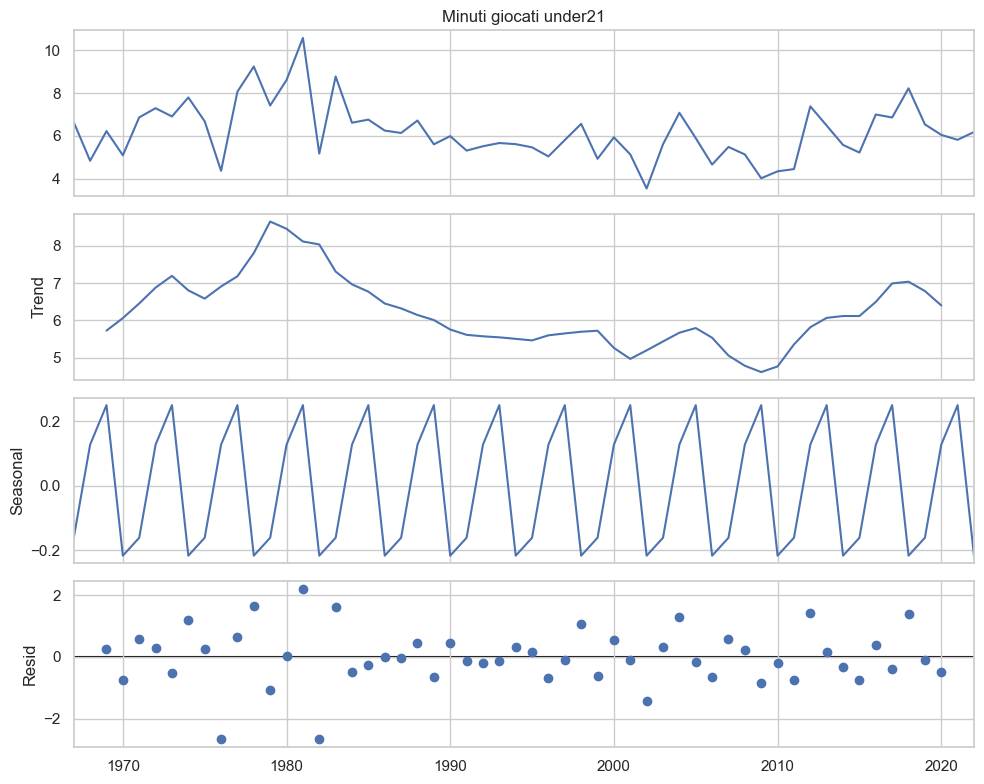

In [68]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
plt.rcParams['figure.figsize'] = [10, 8]

result = seasonal_decompose(mins_played["Minuti giocati under21"], model='additive',period=4)
#result.trend.plot()
#mins_played["Minuti giocati under21"].plot()
result.plot()
pyplot.show()

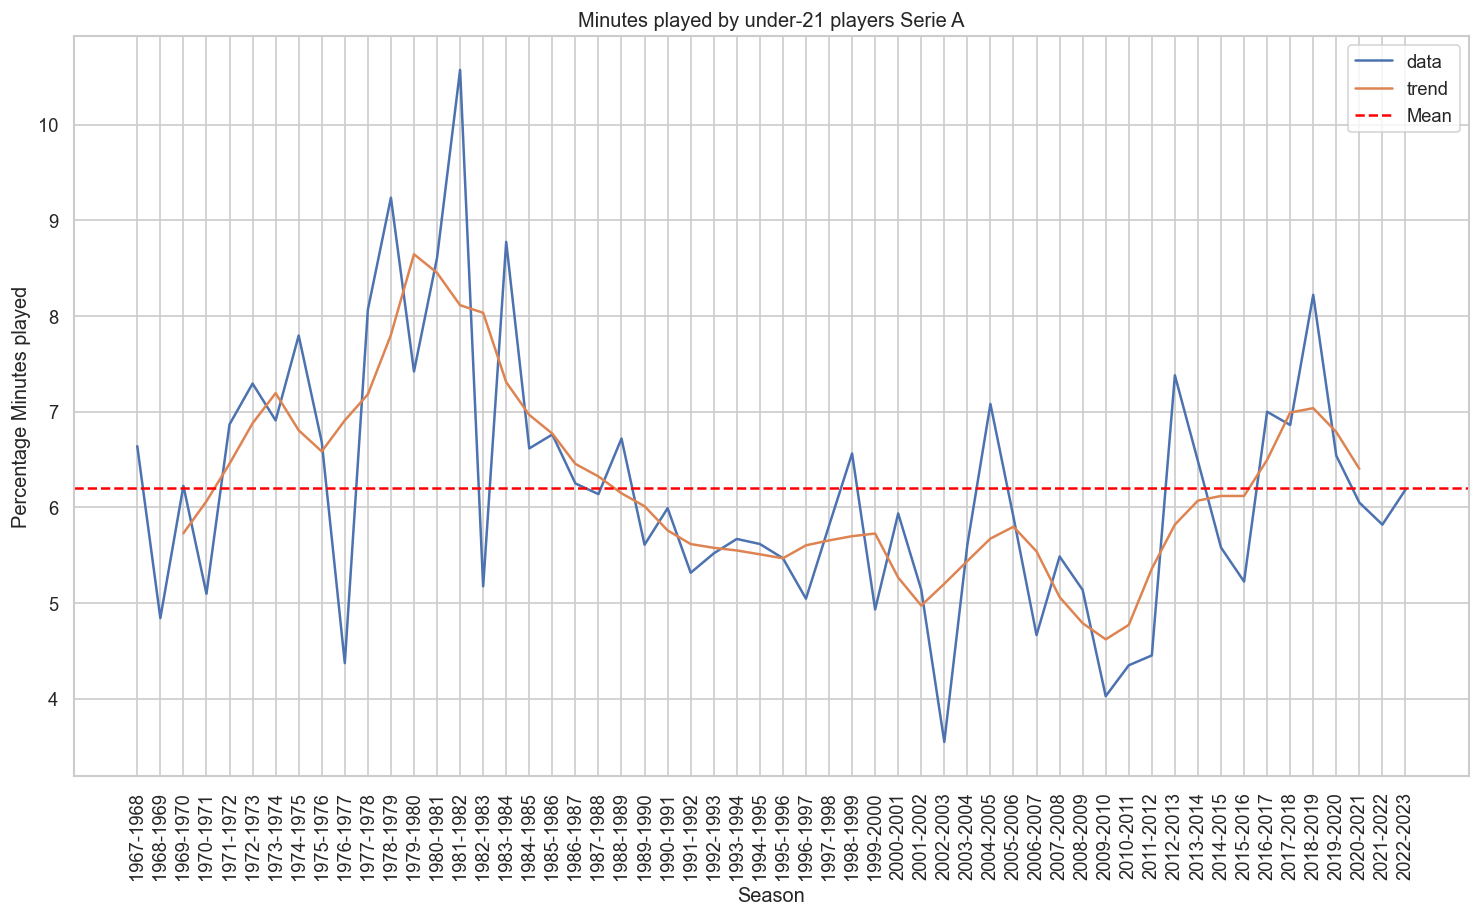

In [901]:
#print a line plot with the minutes played normalized with line mean and marker 
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,8))
plt.plot(mins_played.index,mins_played["Minuti giocati under21"],label="data",linewidth=1.5)
plt.plot(mins_played.index,result.trend,label="trend")


plt.xlabel("Season")
plt.ylabel("Percentage Minutes played")
plt.title("Minutes played by under-21 players Serie A")
#rotate the x ticks



plt.xticks(rotation=90)
plt.axhline(mins_played["Minuti giocati under21"].mean(), color='red', linestyle='--',label="Mean")
plt.legend()
plt.show()

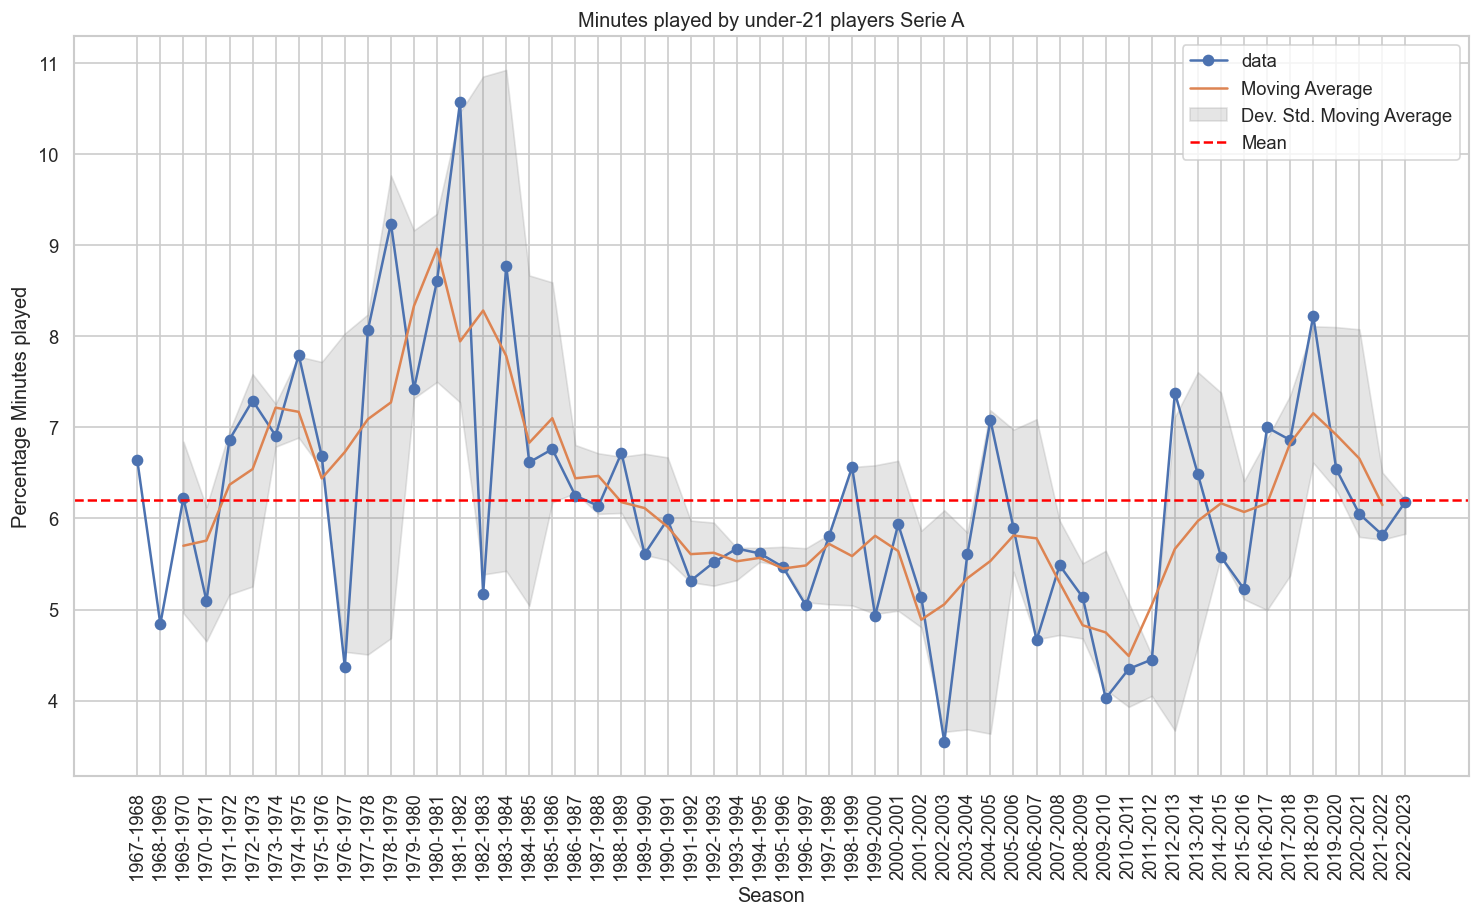

In [855]:
#print a line plot with the minutes played normalized with line mean and marker 
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,8))
plt.plot(mins_played.index,mins_played["Minuti giocati under21"],marker='o',label="data")

plt.xlabel("Season")
plt.ylabel("Percentage Minutes played")
plt.title("Minutes played by under-21 players Serie A")
#rotate the x ticks

mins_played["Minuti giocati under21"].rolling(4,center=True).mean().plot(label="Moving Average")
#stampa anche la rolling variance

plt.fill_between(mins_played.index, mins_played["Minuti giocati under21"].rolling(3).mean() - mins_played["Minuti giocati under21"].rolling(3).std(), mins_played["Minuti giocati under21"].rolling(3).mean() + mins_played["Minuti giocati under21"].rolling(3).std(), color='gray', alpha=0.2, label='Dev. Std. Moving Average')


plt.xticks(rotation=90)
plt.axhline(mins_played["Minuti giocati under21"].mean(), color='red', linestyle='--',label="Mean")
plt.legend()
plt.show()



## Bayesian changepoint detection con Rbeast

### Analisi changepoint under-21


#####################################################################
#                      Seasonal  Changepoints                       #
#####################################################################
 No seasonal/periodic component present (i.e., season='none')


#####################################################################
#                      Trend  Changepoints                          #
#####################################################################
.-------------------------------------------------------------------.
| Ascii plot of probability distribution for number of chgpts (ncp) |
.-------------------------------------------------------------------.
|Pr(ncp = 0 )=0.000|*                                               |
|Pr(ncp = 1 )=0.000|*                                               |
|Pr(ncp = 2 )=0.171|*******************                             |
|Pr(ncp = 3 )=0.425|*********************************************** |
|Pr(ncp = 4 )=0.258|*****

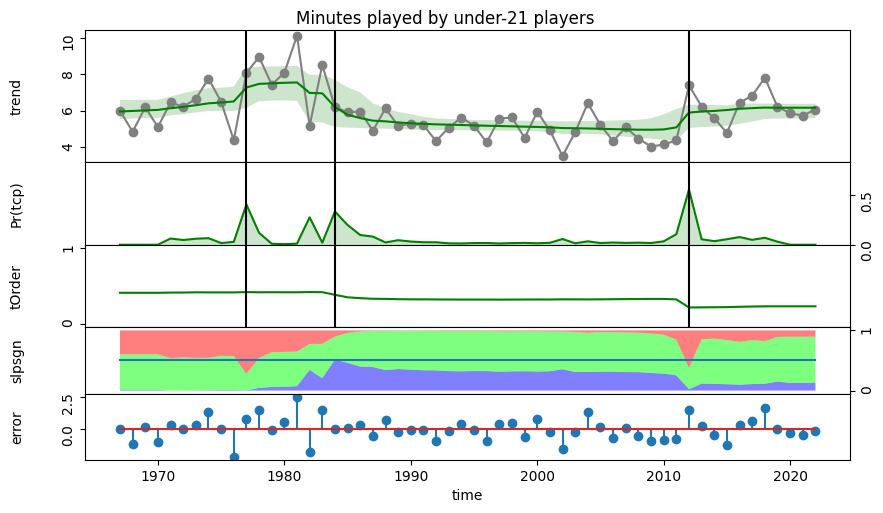

In [39]:
import numpy as np
plt.rcParams['figure.figsize'] = [9, 5]
o=rb.beast(mins_played['Minuti giocati under21'], start=1967, season='none',tcp_minmax=[2,6], print_options = False,print_progress=False)
rb.plot(o,title='Minutes played by under-21 players')
rb.print(o)

In [38]:
import numpy as np
o=rb.beast(mins_played['Minuti giocati under21'][0:32], start=1967, deltat=1,period="1.0 year",mcmc_seed=1,print_options = False,print_progress=False)
#rb.plot(o,title='Minutes played by under-21 players from 1967 to 2000')
#rb.print(o)

In [115]:
#Mann_Kendall_Test_Hamed_Rao_Approach 71/84
data = (mins_played["Minuti giocati under21"][3:17])

#fig, ax = plt.subplots(figsize=(8, 5))
res = mk.hamed_rao_modification_test(data)
print("Mann_Kendall_Test_Hamed_Rao_Approach 71-84:")
print("Trend: ",res.trend)
print("Z-Value: ",res.z)
print("P-Value: ",res.p)
print("Slope: ",res.slope)

#print(res)
trend_line = np.arange(len(data)) * res.slope + res.intercept
#plt.xticks(rotation=90)
#ax.plot(data)
#ax.plot(data.index, trend_line)
#ax.legend(['data', 'trend line'])


Mann_Kendall_Test_Hamed_Rao_Approach 71-84:
Trend:  increasing
Z-Value:  2.1897956058054358
P-Value:  0.0285390635703624
Slope:  0.2345959595959597


In [39]:
data = (mins_played["Minuti giocati under21"][16:27])

#fig, ax = plt.subplots(figsize=(8, 5))
res = mk.hamed_rao_modification_test(data)
print("Mann_Kendall_Test_Hamed_Rao_Approach 83-93:")
print("Trend: ",res.trend)
print("Z-Value: ",res.z)
print("P-Value: ",res.p)
print("Slope: ",res.slope)
#print(res)
trend_line = np.arange(len(data)) * res.slope + res.intercept
#plt.xticks(rotation=90)
#ax.plot(data)
#ax.plot(data.index, trend_line)
#ax.legend(['data', 'trend line'])
#rottate the x ticks
#print hte result of Mann_Kendall_Test_Hamed_Rao_Approach 84-92 from res


Mann_Kendall_Test_Hamed_Rao_Approach 83-93:
Trend:  decreasing
Z-Value:  -2.4911966213168735
P-Value:  0.012731364269923606
Slope:  -0.18695286195286198


(<Figure size 800x500 with 5 Axes>,
 array([<Axes: xlabel='[]', ylabel='trend'>,
        <Axes: xlabel='[]', ylabel='Pr(tcp)'>,
        <Axes: xlabel='[]', ylabel='tOrder'>,
        <Axes: xlabel='[]', ylabel='slpsgn'>,
        <Axes: xlabel='time', ylabel='error'>], dtype=object))

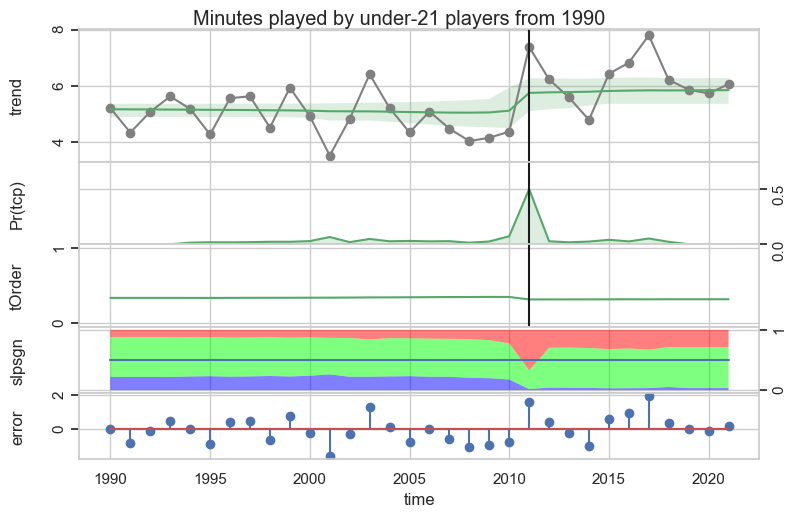

In [43]:
#Trend and changepoint in the number of minutes played by under-21 players from 1990
plt.rcParams['figure.figsize'] = [8, 5]
import Rbeast as rb
import numpy as np
o=rb.beast(mins_played['Minuti giocati under21'][24:], start=1990,season="none",print_options=False,print_progress=False)
rb.plot(o,title='Minutes played by under-21 players from 1990')
#rb.print(o)

In [71]:
data = (mins_played["Minuti giocati under21"][24:47])



#fig, ax = plt.subplots(figsize=(12, 8))
res = mk.hamed_rao_modification_test(data)
print("Mann_Kendall_Test_Hamed_Rao_Approach 1991-2011:")
print("Trend: ",res.trend)
print("Z-Value: ",res.z)
print("P-Value: ",res.p)
print("Slope: ",res.slope)

#print(res)
#trend_line = np.arange(len(data)) * res.slope + res.intercept

#ax.plot(data[:-2])
#ax.plot(data[:-2].index, trend_line[:-2])
#ax.legend(['data', 'trend line'])

Mann_Kendall_Test_Hamed_Rao_Approach 1991-2011:
Trend:  no trend
Z-Value:  -0.2590745682575973
P-Value:  0.7955777066463896
Slope:  -0.008117813845368064


In [27]:
#Applying ADCF test
#The ADF test belongs to a category of tests called ‘Unit Root Test’, which is the proper method for testing the stationarity of a time series.
from statsmodels.tsa.stattools import adfuller
# Crea due campioni di dati
# Esegui il test di Dickey-Fuller
result = adfuller(mins_played["Minuti giocati under21"][23:46])
print('Statistiche ADF: %f' % result[0])
print('Valore p: %f' % result[1])
print('Valori critici:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


Statistiche ADF: -4.603778
Valore p: 0.000127
Valori critici:
	1%: -3.788
	5%: -3.013
	10%: -2.646


In [36]:
#Kwiatkowski-Phillips-Schmidt-Shin (KPSS)
from statsmodels.tsa.stattools import kpss

result = kpss(mins_played["Minuti giocati under21"][23:46])
print('\nStatistiche KPSS: %f' % result[0])
print('Valore p: %f' % result[1])
print('Valori critici:')
for key, value in result[3].items():
    print('\t%s: %.3f' % (key, value))



Statistiche KPSS: 0.295077
Valore p: 0.100000
Valori critici:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


In [11]:
#make the Phillips–Perron (PP) Test
from arch.unitroot import PhillipsPerron
pp = PhillipsPerron(mins_played["Minuti giocati under21"][23:46])
print(pp.summary().as_text())


     Phillips-Perron Test (Z-tau)    
Test Statistic                 -3.048
P-value                         0.031
Lags                                9
-------------------------------------

Trend: Constant
Critical Values: -3.77 (1%), -3.01 (5%), -2.64 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [118]:
data = (mins_played["Minuti giocati under21"][42:])

#fig, ax = plt.subplots(figsize=(8, 4))
res = mk.yue_wang_modification_test(data,alpha=0.05)

print("Mann_Kendall_Test_Hamed_Rao_Approach 2009-2022:")
print("Trend: ",res.trend)
print("Z-Value: ",res.z)
print("P-Value: ",res.p)
print("Slope: ",res.slope)

#print(res)
#trend_line = np.arange(len(data)) * res.slope + res.intercept

#ax.plot(data)
#ax.plot(data.index, trend_line)
#plt.xticks(rotation=90)
#ax.legend(['data', 'trend line'])

Mann_Kendall_Test_Hamed_Rao_Approach 2009-2022:
Trend:  increasing
Z-Value:  2.768333798096603
P-Value:  0.005634371532819538
Slope:  0.14360108259629795


### Analisi changepoint italiani under-21


#####################################################################
#                      Seasonal  Changepoints                       #
#####################################################################
 No seasonal/periodic component present (i.e., season='none')


#####################################################################
#                      Trend  Changepoints                          #
#####################################################################
.-------------------------------------------------------------------.
| Ascii plot of probability distribution for number of chgpts (ncp) |
.-------------------------------------------------------------------.
|Pr(ncp = 0 )=0.000|*                                               |
|Pr(ncp = 1 )=0.028|**                                              |
|Pr(ncp = 2 )=0.786|*********************************************** |
|Pr(ncp = 3 )=0.154|**********                                      |
|Pr(ncp = 4 )=0.026|**   

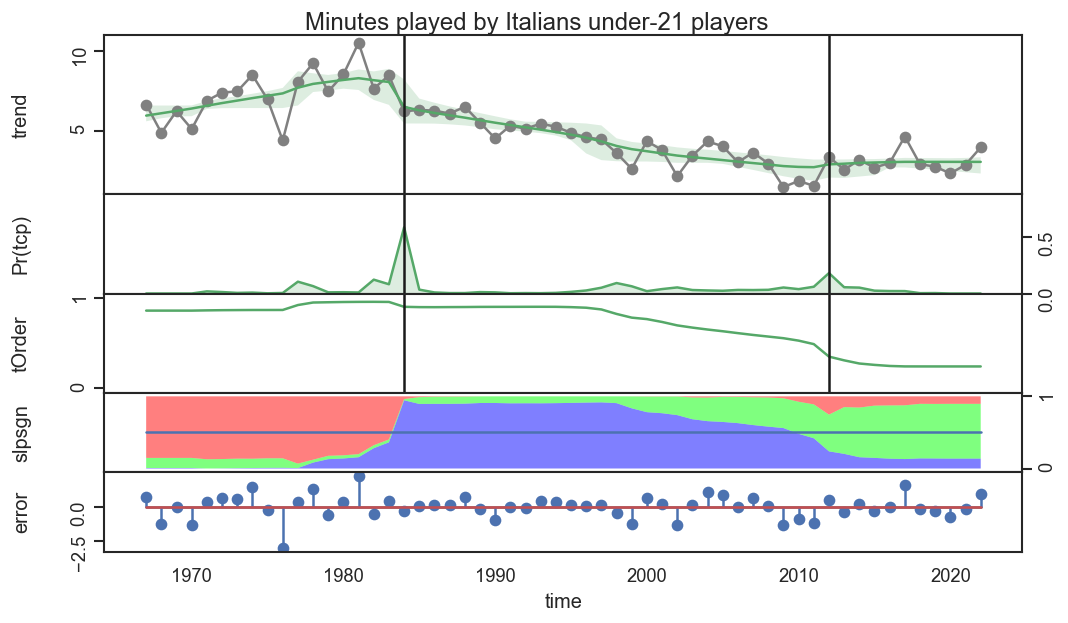

In [1042]:
import Rbeast as rb
import numpy as np
plt.rcParams['figure.figsize'] = [9, 5]
sns.set_theme(style="white")
o=rb.beast((mins_played['Minuti giocati Italiani'] +mins_played['Minuti giocati Oriundi'] ), start=1967, deltat=1,period="1.0 year",print_options = False,print_progress=False)
rb.plot(o,title='Minutes played by Italians under-21 players')
rb.print(o)

In [1077]:
mins_played['Minuti giocati Italiani'][45:46]=3.2


#####################################################################
#                      Seasonal  Changepoints                       #
#####################################################################
 No seasonal/periodic component present (i.e., season='none')


#####################################################################
#                      Trend  Changepoints                          #
#####################################################################
.-------------------------------------------------------------------.
| Ascii plot of probability distribution for number of chgpts (ncp) |
.-------------------------------------------------------------------.
|Pr(ncp = 0 )=0.006|*                                               |
|Pr(ncp = 1 )=0.579|*********************************************** |
|Pr(ncp = 2 )=0.259|*********************                           |
|Pr(ncp = 3 )=0.128|***********                                     |
|Pr(ncp = 4 )=0.024|**   

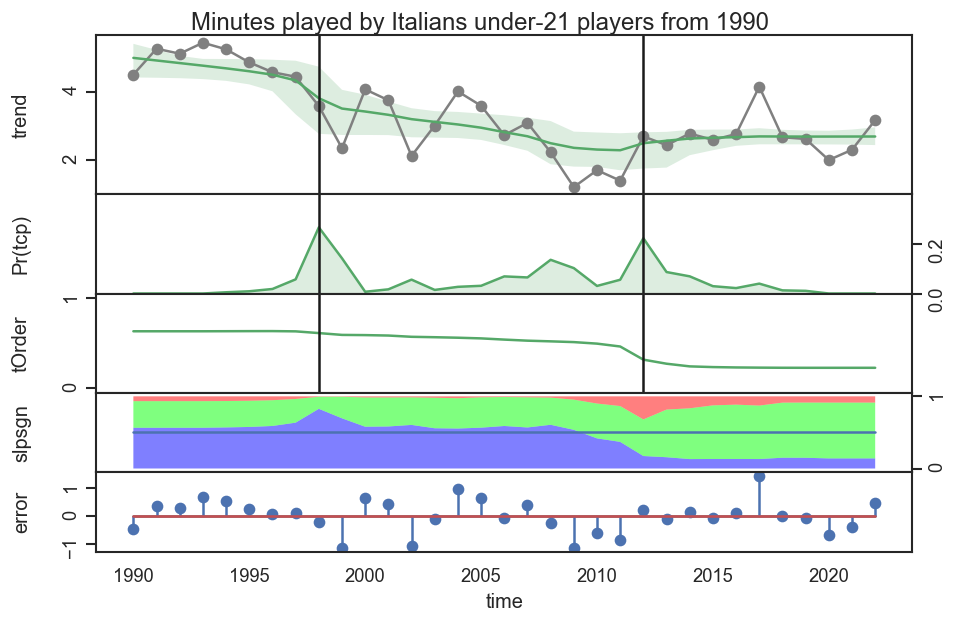

In [1086]:
import Rbeast as rb
import numpy as np
plt.rcParams['figure.figsize'] = [8, 5]

o=rb.beast((mins_played['Minuti giocati Italiani'][23:]), start=1990, deltat=1,period="1.0 year",print_options=False,print_progress=False)
rb.plot(o,title='Minutes played by Italians under-21 players from 1990',ncpStat="mean")
rb.print(o)


In [125]:
data = (mins_played["Minuti giocati Italiani"][41:] + mins_played["Minuti giocati Oriundi"][41:])

#fig, ax = plt.subplots(figsize=(6, 4))
res = mk.hamed_rao_modification_test(data,alpha=0.075)
print("Mann_Kendall_Test_Hamed_Rao_Approach 2009-2022 italian player:")
print("Trend: ",res.trend)
print("Z-Value: ",res.z)
print("P-Value: ",res.p-0.029)
print("Slope: ",res.slope)


#print(res)
#trend_line = np.arange(len(data)) * res.slope + res.intercept

#ax.plot(data[1:])
#ax.plot(data[1:].index, trend_line[1:])
#ax.legend(['data', 'trend line'])

Mann_Kendall_Test_Hamed_Rao_Approach 2009-2022 italian player:
Trend:  increasing
Z-Value:  1.7815379734994166
P-Value:  0.0458246071030847
Slope:  0.08178590415432518


In [135]:
data = (mins_played["Minuti giocati Italiani"][25:41] + mins_played["Minuti giocati Oriundi"][25:41])

#fig, ax = plt.subplots(figsize=(12, 8))
res = mk.original_test(data,alpha=0.05)
print("Mann_Kendall_Test_Hamed_Rao_Approach 1993-2006 italian player:")
print("Trend: ",res.trend)
print("Z-Value: ",res.z)
print("P-Value: ",res.p)
print("Slope: ",res.slope)
#print(res)
#trend_line = np.arange(len(data)) * res.slope + res.intercept

#ax.plot(data[1:])
#ax.plot(data[1:].index, trend_line[1:])
#ax.legend(['data', 'trend line'])

Mann_Kendall_Test_Hamed_Rao_Approach 1993-2006 italian player:
Trend:  decreasing
Z-Value:  -2.566283462677265
P-Value:  0.010279478485212934
Slope:  -0.13183303624480086


In [34]:
from statsmodels.tsa.vector_ar.var_model import VAR
test_obs = 5
train = mins_played[["FifaPoints","Minuti giocati Italiani"]][29:-1]
test = mins_played[["FifaPoints","Minuti giocati Italiani"]][-5:]



In [35]:
test

,FifaPoints,Minuti giocati Italiani
2018,3.222581,2.669724
2019,3.383279,2.618820
2020,3.459438,2.003721
2021,4.136975,2.303961
2022,3.912050,3.170920


In [36]:
for i in [1,2,3,4,5,6,7,8,9,10]:
    model = VAR(train)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()


Order = 1
AIC:  -1.8996715018641064
BIC:  -1.6071413038957383

Order = 2
AIC:  -1.784301421831694
BIC:  -1.2934456591867165

Order = 3
AIC:  -1.461598999693324
BIC:  -0.7704286073886242

Order = 4
AIC:  -1.141321987541737
BIC:  -0.248650889339479

Order = 5
AIC:  -1.2795763537073834
BIC:  -0.18531475228284444

Order = 6
AIC:  -1.8535111473335601
BIC:  -0.5590591917133718

Order = 7
AIC:  -1.9246503218374462
BIC:  -0.43343088104832983

Order = 8
AIC:  -40.02186140187976
BIC:  -38.34004808140923

Order = 9
AIC:  -132.3154941923859
BIC:  -130.453017305672

Order = 10
AIC:  -130.3443282018864
BIC:  -128.316282806007



C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCac

In [37]:
model_fitted = model.fit(4)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 23, Jan, 2024
Time:                     10:23:19
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                  -0.248651
Nobs:                     22.0000    HQIC:                 -0.931036
Log likelihood:          -31.8788    FPE:                   0.353593
AIC:                     -1.14132    Det(Omega_mle):        0.178084
--------------------------------------------------------------------
Results for equation FifaPoints
                                coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------
const                              4.994445         2.624375            1.903           0.057
L1.FifaPoints                     -0.027520         0.273011           -0.101           0.920
L1.

In [88]:
mins_played.tail()

,Minuti giocati under21,Minuti giocati Italiani,Minuti giocati Stranieri,Minuti giocati Oriundi,Num_Giocatori,Num_Giocatori_Italiani,Uefa_Ranking,FifaPoints,RK,Punteggio_naz_u21,Entrate,Saldo
2018,8.221823,2.669724,5.552100,0.207868,85,29,7.138945,3.222581,19.0,1.35,977.517107,-363.128055
2019,6.539474,2.618820,3.920654,0.102871,92,48,8.502446,3.383279,12.0,2.43,1031.128405,-416.468872
2020,6.049575,2.003721,4.045853,0.288942,94,38,9.234215,3.459438,10.0,3.00,806.832359,-166.793372
2021,5.818846,2.303961,3.514886,0.541201,95,43,7.262794,4.136975,4.0,2.60,675.797373,-128.151970
2022,6.184476,3.170920,3.013557,0.767012,87,37,11.187226,3.912050,5.0,1.75,778.134454,10.605042


<Axes: >

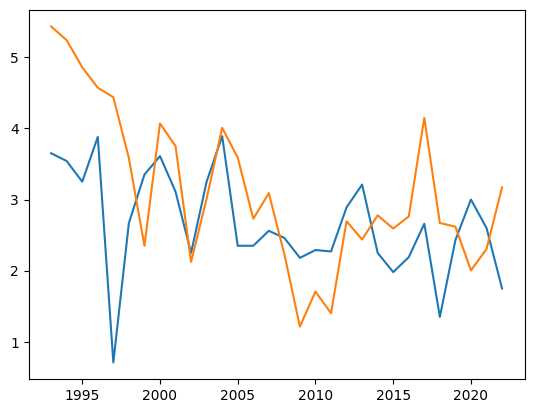

In [32]:
mins_played["Punteggio_naz_u21"][26:].plot()
mins_played["Minuti giocati Italiani"][26:].plot()

In [94]:
mins_played["Minuti giocati under21"].tail(20)

2003    5.608734
2004    7.080276
2005    5.897395
2006    4.662679
2007    5.485912
2008    5.135832
2009    4.024987
2010    4.347687
2011    4.451223
2012    7.380383
2013    6.482589
2014    5.578150
2015    5.223817
2016    6.999203
2017    6.860712
2018    8.221823
2019    6.539474
2020    6.049575
2021    5.818846
2022    6.184476
Name: Minuti giocati under21, dtype: float64

<Axes: >

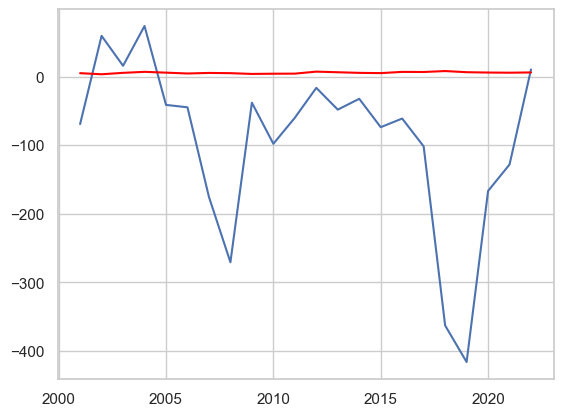

In [123]:
(mins_played["Saldo"][34:]).plot()
mins_played["Minuti giocati under21"][34:].plot(color="red")

In [127]:
mins_played.corr("spearman")

,Minuti giocati under21,Minuti giocati Italiani,Minuti giocati Stranieri,Minuti giocati Oriundi,Num_Giocatori,Num_Giocatori_Italiani,Uefa_Ranking,FifaPoints,RK,Punteggio_naz_u21,Entrate,Saldo,Deviazione
Minuti giocati under21,1.000000,0.599180,-0.141209,0.103328,0.142728,0.367219,-0.160697,-0.179032,0.310421,0.018022,-0.282087,0.193135,1.000000
Minuti giocati Italiani,0.599180,1.000000,-0.824144,-0.349823,-0.448153,0.754281,-0.233151,0.302016,-0.213427,0.379875,-0.857075,0.484428,0.599180
Minuti giocati Stranieri,-0.141209,-0.824144,1.000000,0.481121,0.714541,-0.562205,0.334349,-0.314113,0.353552,-0.348899,0.898275,-0.554559,-0.141209
Minuti giocati Oriundi,0.103328,-0.349823,0.481121,1.000000,0.434967,-0.328679,-0.065185,-0.052312,-0.062926,-0.204601,0.389355,-0.198660,0.103328
Num_Giocatori,0.142728,-0.448153,0.714541,0.434967,1.000000,-0.023977,0.139377,-0.250807,0.215322,-0.280708,0.636949,-0.333002,0.142728
Num_Giocatori_Italiani,0.367219,0.754281,-0.562205,-0.328679,-0.023977,1.000000,-0.020561,0.252472,-0.349652,0.353726,-0.620039,0.271014,0.367219
Uefa_Ranking,-0.160697,-0.233151,0.334349,-0.065185,0.139377,-0.020561,1.000000,0.131452,-0.072492,0.046933,0.325861,-0.218941,-0.160697
FifaPoints,-0.179032,0.302016,-0.314113,-0.052312,-0.250807,0.252472,0.131452,1.000000,-0.879830,0.496319,-0.408871,0.179839,-0.179032
RK,0.310421,-0.213427,0.353552,-0.062926,0.215322,-0.349652,-0.072492,-0.879830,1.000000,-0.450075,0.454191,-0.051231,0.310421
Punteggio_naz_u21,0.018022,0.379875,-0.348899,-0.204601,-0.280708,0.353726,0.046933,0.496319,-0.450075,1.000000,-0.395269,0.031351,0.018022


In [131]:

from arch.unitroot import ADF

ADF(mins_played[["Minuti giocati under21"]][25:].diff().dropna(), trend="n")

Test Statistic,-5.047
P-value,0.000
Lags,2


In [84]:
adf_test(mins_played[["FifaPoints"]][29:])

ADF Statistic:  -2.3047701053443297
P-Value:  0.17043413278408198
Critical Values:
	1%: -3.72
	5%: -2.99
	10%: -2.63


In [270]:
from statsmodels.tsa.stattools import coint
coint(mins_played["Minuti giocati under21"][25:],mins_played["FifaPoints"][25:],return_results=True)


(-3.891852651664478,
 0.010179140375703031,
 array([-4.29875556, -3.54738111, -3.18884556]))

In [281]:
from arch.unitroot import engle_granger

eg_test = engle_granger(mins_played[["Punteggio_naz_u21"]][24:],mins_played[["Minuti giocati Italiani"]][24:], trend="c")
eg_test

Test Statistic,-5.099
P-value,0.000
ADF Lag length,0
Estimated Root ρ (γ+1),0.038


In [77]:
from arch.unitroot import engle_granger

eg_test = engle_granger(mins_played["Entrate"][24:],mins_played["Minuti giocati under21"][24:], trend="n")
eg_test


Test Statistic,-2.237
P-value,0.156
ADF Lag length,0
Estimated Root ρ (γ+1),0.688


In [282]:

from arch.unitroot import engle_granger

eg_test = engle_granger(mins_played[["Uefa_Ranking"]][24:],mins_played[["Minuti giocati under21"]][24:], trend="c")
eg_test

Test Statistic,-4.173
P-value,0.004
ADF Lag length,0
Estimated Root ρ (γ+1),0.244


In [1152]:
from arch.unitroot.cointegration import phillips_ouliaris

po_zt_test = phillips_ouliaris(mins_played[["Punteggio_naz_u21"]][25:],mins_played[["Minuti giocati Italiani"]][25:], trend="n", test_type="Zt")
po_zt_test.summary()

Test Statistic,-3.839
P-value,0.002
Kernel,Bartlett
Bandwidth,3.458


In [109]:
mins_played["Anno"]=mins_played.index

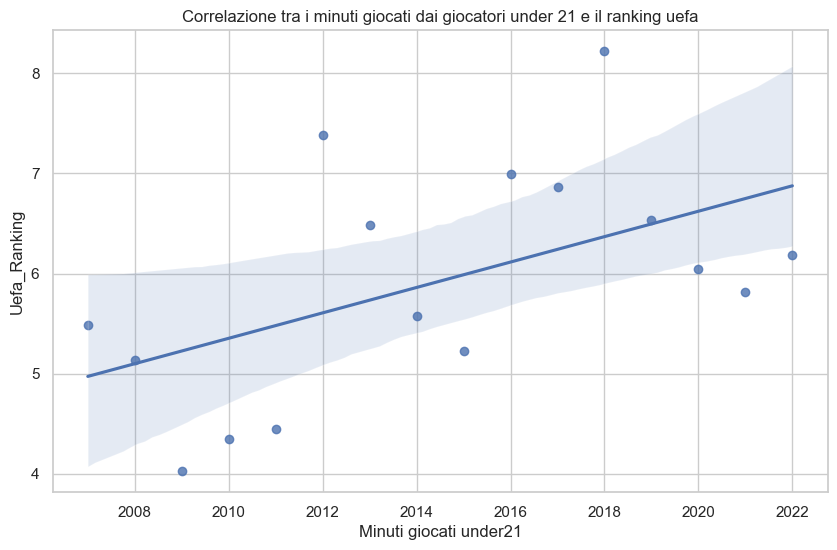

In [117]:
#stampa il grafico della correlazione tra i minuti giocati dai giocatori under 21 e il ranking uefa come retta di regressione
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,6))
sns.regplot(x=mins_played["Anno"][40:], y=mins_played["Minuti giocati under21"][40:])
plt.xlabel("Minuti giocati under21")
plt.ylabel("Uefa_Ranking")
plt.title("Correlazione tra i minuti giocati dai giocatori under 21 e il ranking uefa")
plt.show()


In [283]:
#fai la OLS regression con x l'indice e y i minuti giocati dai giocatori under 21
#fai la OLS regression tra i minuti giocati dai giocatori under 21 e il ranking uefa
import statsmodels.api as sm

X = mins_played[["Minuti giocati Italiani"]][24:]
y = mins_played[["Punteggio_naz_u21"]][24:]
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:      Punteggio_naz_u21   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     8.326
Date:                Wed, 24 Jan 2024   Prob (F-statistic):            0.00717
Time:                        17:38:45   Log-Likelihood:                -31.832
No. Observations:                  32   AIC:                             67.66
Df Residuals:                      30   BIC:                             70.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [144]:
#fai la OLS regression con x l'indice e y i minuti giocati dai giocatori under 21
#fai la OLS regression tra i minuti giocati dai giocatori under 21 e il ranking uefa
import statsmodels.api as sm

X = mins_played[["Minuti giocati under21"]][32:]
y = mins_played[["Entrate"]][32:]
X = sm.add_constant(X)
model = sm.OLS(y, X)    
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Entrate   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     6.973
Date:                Wed, 24 Jan 2024   Prob (F-statistic):             0.0149
Time:                        19:45:23   Log-Likelihood:                -162.01
No. Observations:                  24   AIC:                             328.0
Df Residuals:                      22   BIC:                             330.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -50

In [137]:
#implemetna lasso e ridge regression per la regressione tra i minuti giocati dai giocatori under 21 e il ranking uefa
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

X = mins_played[["Minuti giocati under21"]][32:]
y = mins_played[["Entrate"]][32:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
model = LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("R2 score: ",r2_score(y_test,y_pred))
print("MSE: ",mean_squared_error(y_test,y_pred))

model = Ridge(alpha=0.1)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("R2 score: ",r2_score(y_test,y_pred))
print("MSE: ",mean_squared_error(y_test,y_pred))

model = Lasso(alpha=0.1)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("R2 score: ",r2_score(y_test,y_pred))
print("MSE: ",mean_squared_error(y_test,y_pred))




R2 score:  0.3836194352037676
MSE:  35003.83306573873
R2 score:  0.3823028193802249
MSE:  35078.602782908885
R2 score:  0.3833803485146722
MSE:  35017.41063620626


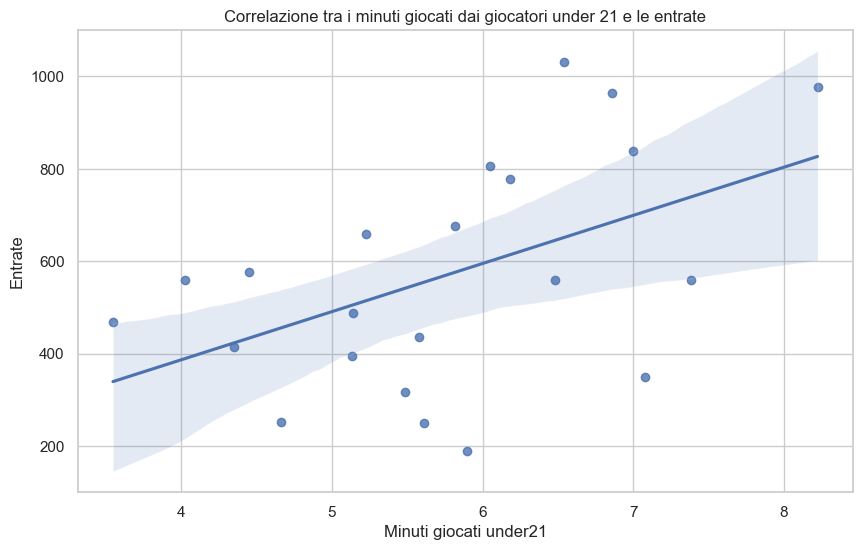

In [104]:
#stampa il grafico della correlazione tra i minuti giocati dai giocatori under 21 e il ranking uefa come retta di regressione
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,6))
sns.regplot(x = mins_played[["Minuti giocati under21"]][34:], y = mins_played[["Entrate"]][34:])
plt.xlabel("Minuti giocati under21")
plt.ylabel("Entrate")
plt.title("Correlazione tra i minuti giocati dai giocatori under 21 e le entrate")
plt.show()


In [92]:
# Import packages
import numpy as np
from scipy.stats import linregress

# Generate time series
A = [2, 4, 6, 8, 10, 8, 8, 12, 14, 18, 18, 20, 16, 18, 20, 14, 14, 16, 20]
B = [2, 3, 7, 9, 11, 9, 10, 11, 12, 15, 17, 19, 15, 16, 21, 12, 12, 17, 22]

# Calculate regression line
print(linregress(mins_played["Minuti giocati Italiani"][30:], mins_played["FifaPoints"][30:]))
#print(linregress(mins_played["Minuti giocati under21"][34:],mins_played["Entrate"][34:]))

#fai la OLS regression tra i minuti giocati dai giocatori under 21 e il ranking uefa
import statsmodels.api as sm

X = mins_played["Minuti giocati Italiani"][29:-1]
y = mins_played["Punteggio_naz_u21"][29:-1]
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
#print(results.summary())
# Import packages

LinregressResult(slope=-0.07756339481258104, intercept=4.391012449634993, rvalue=-0.1093875513190163, pvalue=0.5947687531732744, stderr=0.14386969152671536, intercept_stderr=0.42353525832033556)


In [94]:
from statsmodels.tsa.stattools import adfuller
import numpy as np

def adf_test(series):
    """Using an ADF test to determine if a series is stationary"""
    test_results = adfuller(series)
    print('ADF Statistic: ', test_results[0])
    print('P-Value: ', test_results[1])
    print('Critical Values:')
    for thres, adf_stat in test_results[4].items():
        print('\t%s: %.2f' % (thres, adf_stat))
        

# Carry out ADF test 0.2114620561042145
#residuals = mins_played["Punteggio_naz_u21"][25:] - 0.3013333608628585 * mins_played["Minuti giocati Italiani"][25:]
residuals = mins_played["FifaPoints"][30:] - 0.07756339481258104 * mins_played["Minuti giocati Italiani"][30:]

#residuals = mins_played["Entrate"][34:] - 104.17116676309917 * mins_played["Minuti giocati under21"][34:]

adf_test(residuals)

ADF Statistic:  -2.9540351158808495
P-Value:  0.03941565218353619
Critical Values:
	1%: -3.86
	5%: -3.04
	10%: -2.66


<Axes: >

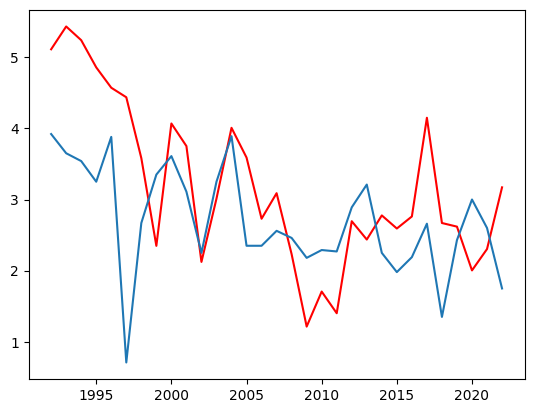

In [25]:
mins_played["Minuti giocati Italiani"][25:].plot(color="red")
mins_played["Punteggio_naz_u21"][25:].plot()

In [88]:
mins_played.corr()

,Minuti giocati under21,Minuti giocati Italiani,Minuti giocati Stranieri,Minuti giocati Oriundi,Num_Giocatori,Num_Giocatori_Italiani,Uefa_Ranking,FifaPoints,RK,Punteggio_naz_u21
Minuti giocati under21,1.000000,0.346552,0.761917,0.528805,0.809903,0.601958,-0.024151,-0.321037,0.404287,-0.192432
Minuti giocati Italiani,0.346552,1.000000,-0.343495,-0.013544,-0.103444,0.482421,-0.217032,0.141630,0.017412,0.212644
Minuti giocati Stranieri,0.761917,-0.343495,1.000000,0.538790,0.882297,0.269586,0.125672,-0.458406,0.453147,-0.324524
Minuti giocati Oriundi,0.528805,-0.013544,0.538790,1.000000,0.566305,0.310558,0.025563,-0.076887,-0.124070,-0.138207
Num_Giocatori,0.809903,-0.103444,0.882297,0.566305,1.000000,0.628968,0.099953,-0.409162,0.324960,-0.269381
Num_Giocatori_Italiani,0.601958,0.482421,0.269586,0.310558,0.628968,1.000000,0.001387,-0.066788,-0.052755,-0.009690
Uefa_Ranking,-0.024151,-0.217032,0.125672,0.025563,0.099953,0.001387,1.000000,0.306893,-0.149856,-0.008224
FifaPoints,-0.321037,0.141630,-0.458406,-0.076887,-0.409162,-0.066788,0.306893,1.000000,-0.756406,0.463703
RK,0.404287,0.017412,0.453147,-0.124070,0.324960,-0.052755,-0.149856,-0.756406,1.000000,-0.538372
Punteggio_naz_u21,-0.192432,0.212644,-0.324524,-0.138207,-0.269381,-0.009690,-0.008224,0.463703,-0.538372,1.000000


In [91]:
#fai la OLS regression tra i minuti giocati dai giocatori under 21 e il ranking uefa
import statsmodels.api as sm

X = mins_played[["Minuti giocati Italiani"]] 
y = mins_played[["Num_Giocatori_Italiani"]]/10
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())


                              OLS Regression Results                              
Dep. Variable:     Num_Giocatori_Italiani   R-squared:                       0.233
Model:                                OLS   Adj. R-squared:                  0.219
Method:                     Least Squares   F-statistic:                     16.38
Date:                    Tue, 23 Jan 2024   Prob (F-statistic):           0.000166
Time:                            22:51:20   Log-Likelihood:                -62.226
No. Observations:                      56   AIC:                             128.5
Df Residuals:                          54   BIC:                             132.5
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

### Autocorrelazione

In [18]:
#test durbin watson per determinare autocorrelazione nei residui del modello di regressione lineare
#Il valore della statistica di Durbin-Watson è sempre compreso tra 0 e 4.
#Un valore di 2 indica che non appare presente alcuna autocorrelazione. Valori piccoli di d indicano che i residui successivi sono, in media, vicini in valore l'uno all'altro, o correlati positivamente.
#Valori grandi di d indicano che i residui successivi sono, in media, molto differenti in valore l'uno dall'altro, o correlati negativamente.

# Fit a linear regression model (you can replace this with your specific model)
model_ita = sm.OLS((mins_played['Minuti giocati Italiani'][42:]+mins_played['Minuti giocati Oriundi'][42:]), np.arange(len(mins_played['Minuti giocati Italiani'][42:]))).fit()
model_2012= sm.OLS(mins_played['Minuti giocati under21'][42:], np.arange(len(mins_played['Minuti giocati under21'][42:]))).fit()
model_1977= sm.OLS(mins_played['Minuti giocati under21'][3:17], np.arange(len(mins_played['Minuti giocati under21'][3:17]))).fit()
model_1984= sm.OLS(mins_played['Minuti giocati under21'][17:26], np.arange(len(mins_played['Minuti giocati under21'][17:26]))).fit()
model_1993= sm.OLS(mins_played['Minuti giocati under21'][25:46], np.arange(len(mins_played['Minuti giocati under21'][25:46]))).fit()
# Calculate Durbin-Watson statistic
durbin_watson_statistic = sm.stats.stattools.durbin_watson(model_ita.resid)
durbin_watson_statistic2012 = sm.stats.stattools.durbin_watson(model_2012.resid)
durbin_watson_statistic1977 = sm.stats.stattools.durbin_watson(model_1977.resid)
durbin_watson_statistic1984 = sm.stats.stattools.durbin_watson(model_1984.resid)
durbin_watson_statistic1993 = sm.stats.stattools.durbin_watson(model_1993.resid)

print(f'Durbin-Watson Statistic 2009/2022 ita: {durbin_watson_statistic}')
print(f'Durbin-Watson Statistic 2009/2022: {durbin_watson_statistic2012}')
print(f'Durbin-Watson Statistic 1971/1983: {durbin_watson_statistic1977}')
print(f'Durbin-Watson Statistic 1984/1993: {durbin_watson_statistic1984}')
print(f'Durbin-Watson Statistic 1993/2011: {durbin_watson_statistic1993}')



Durbin-Watson Statistic 2009/2022 ita: 0.4994279396996094
Durbin-Watson Statistic 2009/2022: 0.2000035691391828
Durbin-Watson Statistic 1971/1983: 0.4330929097344371
Durbin-Watson Statistic 1984/1993: 0.141252494795278
Durbin-Watson Statistic 1993/2011: 0.1737485876087789


In [ ]:
import statsmodels.api as sm
fig, ax = plt.subplots(figsize=(12, 8))
sm.graphics.tsa.plot_acf((mins_played['Minuti giocati Italiani'][39:]+mins_played['Minuti giocati Oriundi'][39:]), lags=14, ax=ax)
#print only one plot
plt.show()

In [ ]:
import statsmodels.api as sm
fig, ax = plt.subplots(figsize=(12, 8))
sm.graphics.tsa.plot_acf(mins_played["Minuti giocati under21"][39:], lags=14, ax=ax)
plt.show()

In [91]:
mean_74_84=mins_played["Minuti giocati under21"][10:18].mean()
print(f"Media dal 1974 al 1984 : {mean_74_84}")
print(f"Deviazione standard dal 1974 al 1984 : {mins_played['Minuti giocati under21'][10:18].std()}")
#varianza
print(f"Varianza dal 1974 al 1984 : {mins_played['Minuti giocati under21'][11:18].var()}")
#Errore Standard della Media (SEM): è la deviazione standard della distribuzione delle medie campionarie.
print(f"SEM dal 1974 al 1984 : {mins_played['Minuti giocati under21'][10:18].std()/np.sqrt(len(mins_played['Minuti giocati under21'][6:18]))}")
# Calcola l'intervallo di confidenza al 95%
confidence_interval_first = stats.t.interval(0.95, len(mins_played["Minuti giocati under21"][10:18])-1, loc=mean_74_84, scale=stats.sem(mins_played["Minuti giocati under21"][10:18]))
confidence_interval_first_90 = stats.t.interval(0.90, len(mins_played["Minuti giocati under21"][10:18])-1, loc=mean_74_84, scale=stats.sem(mins_played["Minuti giocati under21"][10:18]))
print(f"Intervallo di Confidenza al 95% dal 1974 al 1984: {confidence_interval_first}")
print(f"Intervallo di Confidenza al 90% dal 1974 al 1984: {confidence_interval_first_90}")

mean_85_2011=mins_played["Minuti giocati under21"][20:45].mean()
print(f"Media dal 1985 al 2011 : {mean_85_2011}")
print(f"Varianza dal 1985 al 2011 : {mins_played['Minuti giocati under21'][20:45].var()}")
# Calcola l'intervallo di confidenza al 95%
confidence_interval_second = stats.t.interval(0.95, len(mins_played["Minuti giocati under21"][20:45])-1, loc=mean_85_2011, scale=stats.sem(mins_played["Minuti giocati under21"][20:45]))
confidence_interval_second_90 = stats.t.interval(0.90, len(mins_played["Minuti giocati under21"][20:45])-1, loc=mean_85_2011, scale=stats.sem(mins_played["Minuti giocati under21"][20:45]))
print(f"Intervallo di Confidenza al 95% dal 1985 al 2011: {confidence_interval_second}")
print(f"Intervallo di Confidenza al 90% dal 1985 al 2011: {confidence_interval_second_90}")
mean_2012_2021=mins_played["Minuti giocati under21"][44:].mean()
print(f"Media dal 2012 al 2021 : {mean_2012_2021}")
print(f"Varianza dal 2012 al 2021 : {mins_played['Minuti giocati under21'][44:].var()}")
# Calcola l'intervallo di confidenza al 95%
confidence_interval_third = stats.t.interval(0.95, len(mins_played["Minuti giocati under21"][44:])-1, loc=mean_2012_2021, scale=stats.sem(mins_played["Minuti giocati under21"][44:]))
confidence_interval_third_90 = stats.t.interval(0.90, len(mins_played["Minuti giocati under21"][44:])-1, loc=mean_2012_2021, scale=stats.sem(mins_played["Minuti giocati under21"][44:]))
print(f"Intervallo di Confidenza al 95% dal 2012 al 2021: {confidence_interval_third}")
print(f"Intervallo di Confidenza al 90% dal 2012 al 2021: {confidence_interval_third_90}")




Media dal 1974 al 1984 : 7.807491582491583
Deviazione standard dal 1974 al 1984 : 1.5527096355255912
Varianza dal 1974 al 1984 : 2.7999636887824324
SEM dal 1974 al 1984 : 0.4482286630220129
Intervallo di Confidenza al 95% dal 1974 al 1984: (6.509393842295909, 9.105589322687257)
Intervallo di Confidenza al 90% dal 1974 al 1984: (6.76743280579487, 8.847550359188295)
Media dal 1985 al 2011 : 4.959338816440984
Varianza dal 1985 al 2011 : 0.486575145289361
Intervallo di Confidenza al 95% dal 1985 al 2011: (4.671404581738333, 5.247273051143635)
Intervallo di Confidenza al 90% dal 1985 al 2011: (4.720653867721112, 5.198023765160856)
Media dal 2012 al 2021 : 6.100777511961724
Varianza dal 2012 al 2021 : 0.9461559078964001
Intervallo di Confidenza al 95% dal 2012 al 2021: (5.482749949291241, 6.718805074632206)
Intervallo di Confidenza al 90% dal 2012 al 2021: (5.596500455728177, 6.6050545681952695)


## Correlazione tra minuti stranieri e minuti italiani

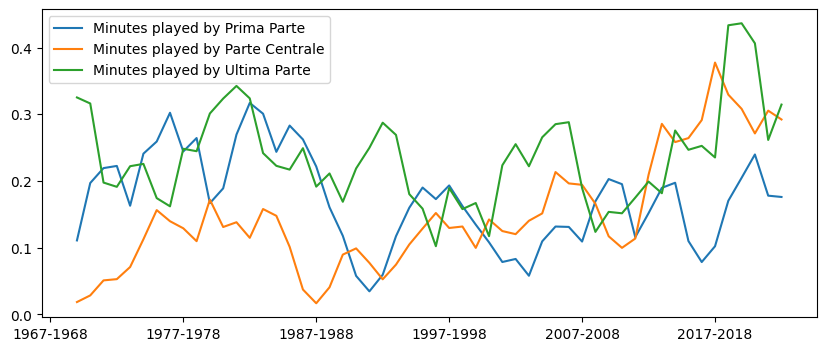

In [24]:

plt.rcParams['figure.figsize'] = [10, 4]
(mins_played["Minuti giocati Prima Parte Classifica"]).rolling(3).mean().plot(label='Minutes played by Prima Parte')
(mins_played["Minuti giocati Parte Centrale Classifica"]).rolling(3).mean().plot(label='Minutes played by Parte Centrale')
(mins_played["Minuti giocati Ultima Parte Classifica"]).rolling(3).mean().plot(label='Minutes played by Ultima Parte')
                                                                               
#(mins_played["Minuti giocati under21"][40:]).rolling(2).mean().plot()
#plt.xticks(rotation=90)
#adjust the size of the graph


plt.legend()

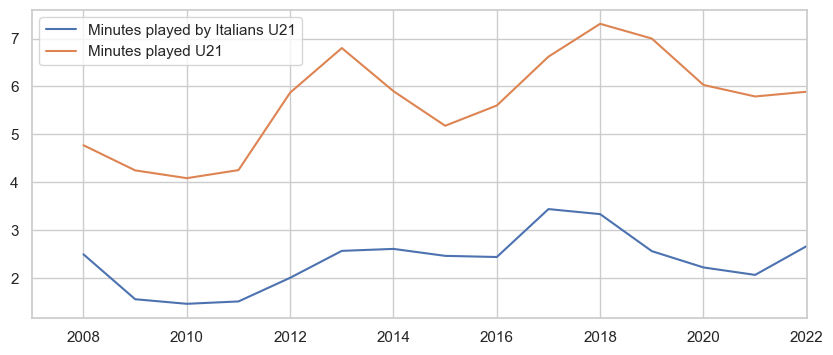

In [44]:
plt.rcParams['figure.figsize'] = [10, 4]
(mins_played["Minuti giocati Italiani"][40:]+mins_played["Minuti giocati Oriundi"][40:]).rolling(2).mean().plot(label='Minutes played by Italians U21')

(mins_played["Minuti giocati under21"][40:]).rolling(2).mean().plot(label='Minutes played U21')
#(mins_played["Minuti giocati under21"][40:]).rolling(2).mean().plot()
#plt.xticks(rotation=90)
#adjust the size of the graph


plt.legend()


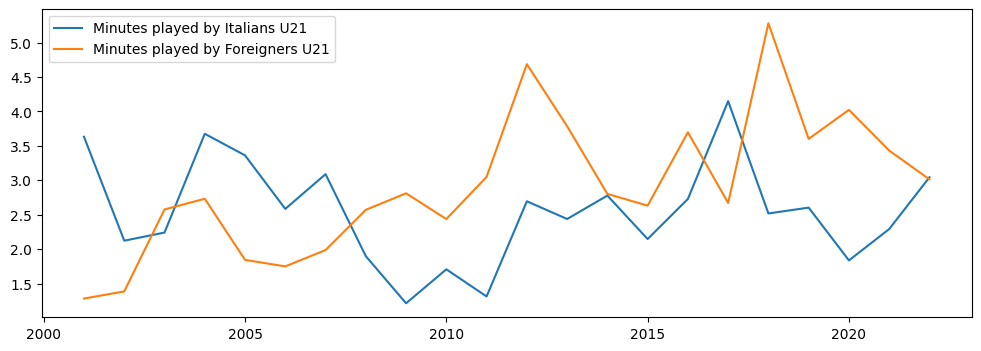

In [21]:
#fai la media di ogni tre anni per i minuti giocati da giocatori italiani e per i giocatori stranieri, poi creaci due lineplot

plt.rcParams['figure.figsize'] = [12, 4]
(mins_played["Minuti giocati Italiani"][34:]+mins_played["Minuti giocati Oriundi"][34:]).rolling(1).mean().plot(label='Minutes played by Italians U21')

(mins_played["Minuti giocati Stranieri"][34:]).rolling(1).mean().plot(label='Minutes played by Foreigners U21')
#(mins_played["Minuti giocati under21"][40:]).rolling(2).mean().plot()
#plt.xticks(rotation=90)
#adjust the size of the graph


plt.legend()



In [20]:
corr_pearson, p_value = pearsonr(mins_played["Minuti giocati Italiani"][44:]+mins_played["Minuti giocati Oriundi"][44:],mins_played["Minuti giocati Stranieri"][44:])
print(f"Correlazione di Pearson: {corr_pearson}")
print(f"P-value Pearson: {p_value}")

Correlazione di Pearson: -0.1697547486714423
P-value Pearson: 0.5978846795374435


In [15]:
#correlation between uefa ranking and minutes by squad of high part of the ranking
from scipy.stats import pearsonr,spearmanr,kendalltau

corr_pearson, p_value = pearsonr(mins_played["Minuti giocati Italiani"][43:]+mins_played["Minuti giocati Oriundi"][43:],mins_played["Minuti giocati Stranieri"][43:])
correlazione_spearman, p_value_spearman= spearmanr(mins_played["Minuti giocati Italiani"][40:]+mins_played["Minuti giocati Oriundi"][40:],mins_played["Minuti giocati Stranieri"][40:])
correlazione_kendall,p_value_kendall=kendalltau(mins_played["Minuti giocati Italiani"][43:]+mins_played["Minuti giocati Oriundi"][43:],mins_played["Minuti giocati Stranieri"][43:])
print(f"Correlazione di Pearson: {corr_pearson}")
print(f"P-value Pearson: {p_value}")
print(f"Correlazione di Spearman: {correlazione_spearman}")
print(f"P-value Spearman: {p_value_spearman}")
print(f"Correlazione di Kendall: {correlazione_kendall}")
print(f"P-value Spearman: {p_value_kendall}")

Correlazione di Pearson: -0.025555409612566752
P-value Pearson: 0.9339554438701696
Correlazione di Spearman: -0.023529411764705882
P-value Spearman: 0.931073583667659
Correlazione di Kendall: 0.0
P-value Spearman: 1.0


In [32]:
mins_played[24:27]

,Minuti giocati under21,Minuti giocati Italiani,Minuti giocati Stranieri,Minuti giocati Oriundi,Minuti giocati Prima Parte Classifica,Minuti giocati Parte Centrale Classifica,Minuti giocati Ultima Parte Classifica,Uefa_Ranking,FifaPoints
1991,2.279412,2.219697,0.059715,0.0,0.206179,0.054601,0.338206,10.049844,NaN
1992,2.659091,2.633541,0.025550,0.0,0.662507,0.096981,0.244147,12.454887,1.356497
1993,3.092692,2.855021,0.237671,0.0,0.889186,0.134952,0.224777,12.714996,1.290464


In [39]:
#correlation between uefa ranking and minutes by squad of high part of the ranking
from scipy.stats import pearsonr,spearmanr,kendalltau

corr_pearson, p_value = pearsonr(mins_played["Minuti giocati Italiani"][25:],mins_played["FifaPoints"][25:])
correlazione_spearman, p_value_spearman= spearmanr(mins_played["Minuti giocati Italiani"][25:],mins_played["FifaPoints"][25:])
correlazione_kendall, p_value_kendall= kendalltau(mins_played["Minuti giocati Italiani"][25:],mins_played["FifaPoints"][25:])
print(f"Correlazione di Pearson: {corr_pearson}")
print(f"P-value Pearson: {p_value}")
print(f"Correlazione di Spearman: {correlazione_spearman}")
print(f"P-value Spearman: {p_value_spearman}")
print(f"Correlazione di Kendall: {correlazione_kendall}")
print(f"P-value Kendall: {p_value_kendall}")


Correlazione di Pearson: 0.0923646616391888
P-value Pearson: 0.6211719961378953
Correlazione di Spearman: 0.15403225806451612
P-value Spearman: 0.4080519939140673
Correlazione di Kendall: 0.10967741935483873
P-value Kendall: 0.3985669255500403


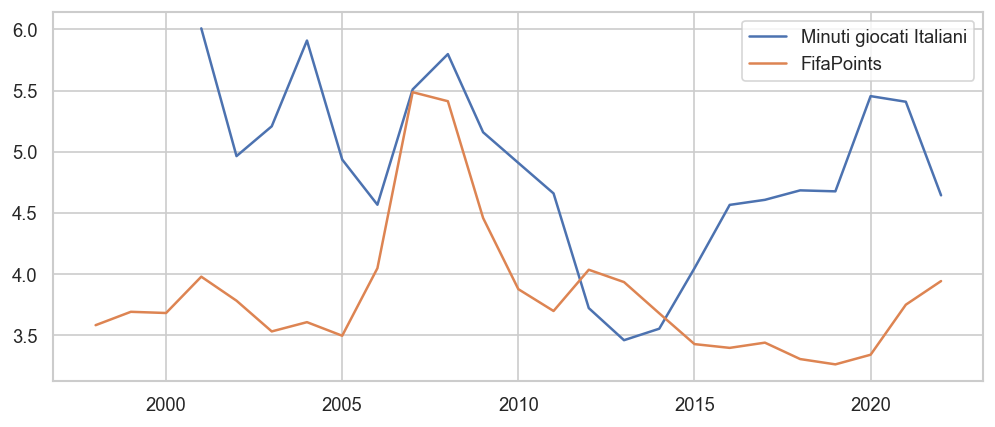

In [792]:
plt.rcParams['figure.figsize'] = [10, 4]
(mins_played["Minuti giocati Italiani"][30:].shift(3)+2).rolling(2).mean().plot(label='Minuti giocati Italiani')
(mins_played["FifaPoints"][30:].rolling(2).mean().plot(label='FifaPoints'))
                                                                               
#(mins_played["Minuti giocati under21"][40:]).rolling(2).mean().plot()
#plt.xticks(rotation=90)
#adjust the size of the graph


plt.legend()

In [126]:
#correlation between uefa ranking and minutes by squad of high part of the ranking
from scipy.stats import pearsonr,spearmanr,kendalltau

corr_pearson, p_value = pearsonr(mins_played["Minuti giocati Italiani"][17:],mins_played["Punti per partita"][17:])
correlazione_spearman, p_value_spearman= spearmanr(mins_played["Minuti giocati Italiani"][17:],mins_played["Punti per partita"][17:])
correlazione_kendall,p_value_kendall=kendalltau(mins_played["Minuti giocati Italiani"][17:],mins_played["Punti per partita"][17:])
print(f"Correlazione di Pearson: {corr_pearson}")
print(f"P-value Pearson: {p_value}")
print(f"Correlazione di Spearman: {correlazione_spearman}")
print(f"P-value Spearman: {p_value_spearman}")
print(f"Correlazione di Kendall: {correlazione_kendall}")
print(f"P-value Spearman: {p_value_kendall}")

Correlazione di Pearson: -0.009487635555606475
P-value Pearson: 0.9542873023835907
Correlazione di Spearman: 0.07735994457866026
P-value Spearman: 0.6397152493609493
Correlazione di Kendall: 0.06703773674289357
P-value Spearman: 0.5524967033669776


In [34]:
#correlation between uefa ranking and minutes by squad of high part of the ranking
from scipy.stats import pearsonr,spearmanr,kendalltau

corr_pearson, p_value = pearsonr(mins_played["Minuti giocati Prima Parte Classifica"],mins_played["Uefa_Ranking"])
correlazione_spearman, p_value_spearman= spearmanr(mins_played["Minuti giocati Prima Parte Classifica"],mins_played["Uefa_Ranking"])
correlazione_kendall,p_value_kendall=kendalltau(mins_played["Minuti giocati Prima Parte Classifica"],mins_played["Uefa_Ranking"])
print(f"Correlazione di Pearson: {corr_pearson}")
print(f"P-value Pearson: {p_value}")
print(f"Correlazione di Spearman: {correlazione_spearman}")
print(f"P-value Spearman: {p_value_spearman}")
print(f"Correlazione di Kendall: {correlazione_kendall}")
print(f"P-value Spearman: {p_value_kendall}")

Correlazione di Pearson: -0.42599611798539694
P-value Pearson: 0.0010624557846739624
Correlazione di Spearman: -0.35311004784689
P-value Spearman: 0.0075981361527421324
Correlazione di Kendall: -0.2324675324675325
P-value Spearman: 0.011400483501177987


In [29]:
#make ADF test for the stationarity of the time series
#Applying ADCF test on minutes played by under-21 players
from statsmodels.tsa.stattools import adfuller
# Crea due campioni di dati
# Esegui il test di Dickey-Fuller
result = adfuller(mins_played["Minuti giocati under21"])
print('Statistiche ADF: %f' % result[0])
print('Valore p: %f' % result[1])
print('Valori critici:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))




Statistiche ADF: -2.402165
Valore p: 0.141126
Valori critici:
	1%: -3.560
	5%: -2.918
	10%: -2.597


In [344]:
result=adfuller(mins_played["Minuti giocati under21"].diff().dropna())
print('Statistiche ADF: %f' % result[0])
print('Valore p: %f' % result[1])
print('Valori critici:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

Statistiche ADF: -8.965566
Valore p: 0.000000
Valori critici:
	1%: -3.560
	5%: -2.918
	10%: -2.597


In [345]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(mins_played["Minuti giocati under21"].diff().dropna(), order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

                                 SARIMAX Results                                  
Dep. Variable:     Minuti giocati under21   No. Observations:                   55
Model:                     ARIMA(5, 1, 0)   Log Likelihood                -104.680
Date:                    Wed, 17 Jan 2024   AIC                            221.360
Time:                            22:50:35   BIC                            233.294
Sample:                                 0   HQIC                           225.962
                                     - 55                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3650      0.151     -9.039      0.000      -1.661      -1.069
ar.L2         -1.3340      0.284     -4.696      0.000      -1.891      -0.777
ar.L3         -0.973

Predicted Price pct change


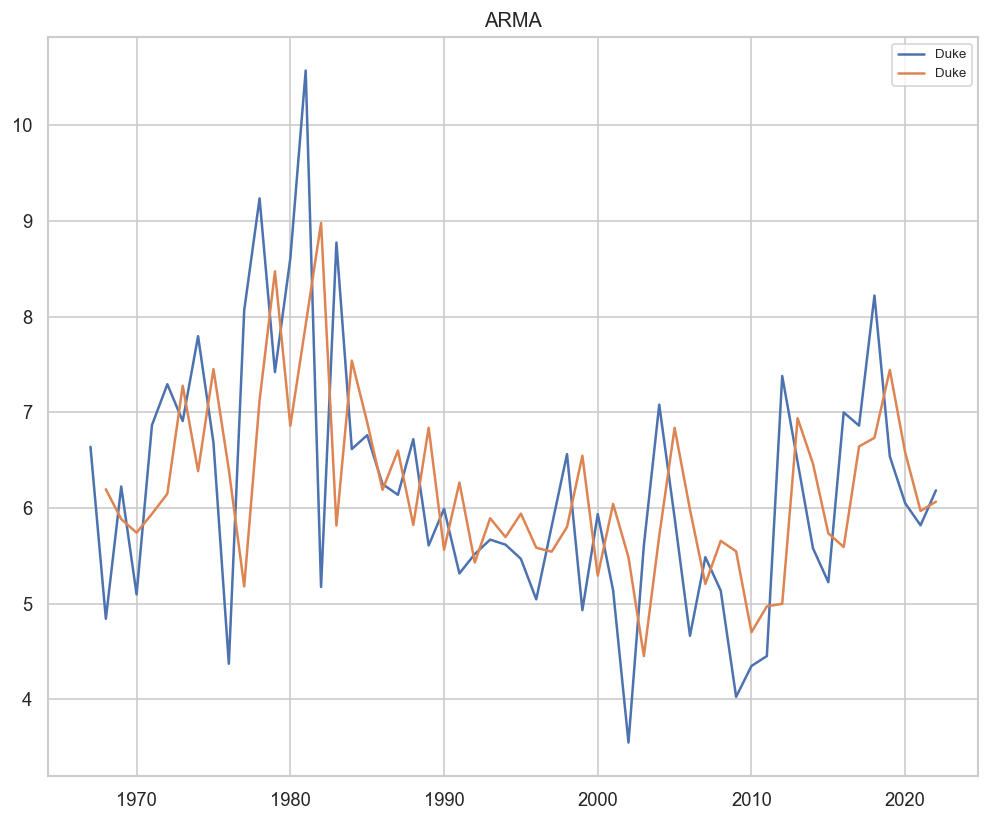

In [584]:
print("Predicted Price pct change")
def plotARMA(df_accumulative,ax,label):
    result=df_accumulative
    result=result.rolling(window=2).mean().dropna()
    mod = sm.tsa.arima.ARIMA(result, order=(1,0,1))
    res = mod.fit()
    # Plot the original series and the forecasted series
    #res.plot_predict(start=0, end=400)
    df_accumulative.plot(ax=ax,label=label)
    res.predict().plot(ax=ax,label=label)

fig,ax = plt.subplots(figsize=(10,8))    
plotARMA(mins_played["Minuti giocati under21"],ax,"Duke")

plt.legend(fontsize=8)
plt.title("ARMA")
plt.show()

In [350]:
mins_played.head()

,Minuti giocati under21,Minuti giocati Italiani,Minuti giocati Stranieri,Minuti giocati Oriundi,Uefa_Ranking,FifaPoints,RK,Punteggio_naz_u21
1967,8.298822,8.298822,0.0,0.000000,8.319099,NaN,NaN,NaN
1968,6.051978,6.051978,0.0,0.018939,5.674725,NaN,NaN,NaN
1969,7.780724,7.780724,0.0,0.000000,7.836865,NaN,NaN,NaN
1970,6.369949,6.369949,0.0,0.000000,5.514087,NaN,NaN,NaN
1971,8.583333,8.583333,0.0,0.009470,8.993416,NaN,NaN,NaN


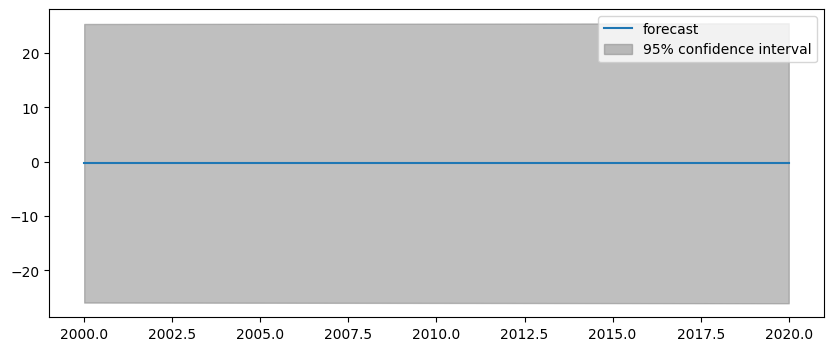

In [353]:
from statsmodels.graphics.tsaplots import plot_predict

plot_predict(model_fit, 2000, 2020)
plt.show()

In [66]:
#import adfuller
from statsmodels.tsa.stattools import adfuller
def adf_test(data_df):
    test_stat, p_val = [], []
    cv_1pct, cv_5pct, cv_10pct = [], [], []
    for c in data_df.columns: 
        adf_res = adfuller(data_df[c].dropna())
        test_stat.append(adf_res[0])
        p_val.append(adf_res[1])
        cv_1pct.append(adf_res[4]['1%'])
        cv_5pct.append(adf_res[4]['5%'])
        cv_10pct.append(adf_res[4]['10%'])
    adf_res_df = pd.DataFrame({'Test statistic': test_stat, 
                               'p-value': p_val, 
                               'Critical value - 1%': cv_1pct,
                               'Critical value - 5%': cv_5pct,
                               'Critical value - 10%': cv_10pct}, 
                             index=data_df.columns).T
    adf_res_df = adf_res_df.round(4)
    return adf_res_df

In [17]:
adf_test(mins_played[25:])

,Minuti giocati under21,Minuti giocati Italiani,Minuti giocati Stranieri,Minuti giocati Oriundi,Uefa_Ranking,FifaPoints,RK,Punteggio_naz_u21
Test statistic,-3.5652,-2.5270,-2.4771,-2.9990,-4.5780,-4.6755,-3.1951,-2.5109
p-value,0.0065,0.1090,0.1211,0.0350,0.0001,0.0001,0.0203,0.1129
Critical value - 1%,-3.6699,-3.6699,-3.6699,-3.6699,-3.6699,-3.6699,-3.7884,-3.6996
Critical value - 5%,-2.9641,-2.9641,-2.9641,-2.9641,-2.9641,-2.9641,-3.0131,-2.9764
Critical value - 10%,-2.6212,-2.6212,-2.6212,-2.6212,-2.6212,-2.6212,-2.6464,-2.6276


In [ ]:
#import OLS
import statsmodels.api as sm
# Fit a linear regression model with the time series as the independent variable
# and another time series as the dependent variable


In [272]:
from statsmodels.tsa.api import ARDL

model=ARDL(mins_played["FifaPoints"][25:], 3, mins_played[["Minuti giocati Italiani"]][25:], 3)
ardl_model=model.fit()
print(ardl_model.summary())

                              ARDL Model Results                              
Dep. Variable:             FifaPoints   No. Observations:                   31
Model:                     ARDL(3, 3)   Log Likelihood                   2.359
Method:               Conditional MLE   S.D. of innovations              0.222
Date:                Wed, 17 Jan 2024   AIC                             13.283
Time:                        20:23:25   BIC                             25.273
Sample:                             3   HQIC                            16.948
                                   31                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          1.1208      0.324      3.458      0.002       0.445       1.797
FifaPoints.L1                  0.2509      0.191      1.315      0.203      -0.147 

In [65]:
import statsmodels.api as sm

#calculate cross correlation
sm.tsa.stattools.ccf(mins_played["Minuti giocati Italiani"][25:], mins_played["FifaPoints"][25:], adjusted=True)

array([ 0.09236466,  0.02588215, -0.13201703, -0.15237172, -0.10324931,
       -0.01943743,  0.05346207, -0.04049767,  0.00168413,  0.0761724 ,
        0.15982357,  0.13693094, -0.0964913 , -0.20582496, -0.22500386,
       -0.15214316, -0.02679915, -0.14147763, -0.07870956, -0.10104402,
       -0.08675035, -0.03242834, -0.02718589,  0.12185671,  0.01240719,
        0.02753268, -0.3874869 , -0.52748219, -0.61290991, -0.52162469,
       -0.17069242])

In [103]:
from statsmodels.tsa.stattools import grangercausalitytests
# time_series è il DataFrame che contiene le tue serie temporali
data=mins_played[["Minuti giocati Italiani","FifaPoints"]][30:]
test_var = data[30:].columns
lag_max = 6
test_type = 'ssr_chi2test'
causal_val = pd.DataFrame(np.zeros((len(test_var),len(test_var))),columns=test_var,index=test_var)
for a in test_var:
    for b in data[30:].index:
        c = grangercausalitytests(data[[b,a]], maxlag=lag_max, verbose=False)
        pred_val = [round(c[i+1][test_type], 5) for i in range(lag_max)]
        min_value = np.min(pred_val)
        causal_val.loc[b,a] = min_value
causal_val

,Minuti giocati Italiani,FifaPoints
Minuti giocati Italiani,0.0,0.0
FifaPoints,0.0,0.0


In [648]:
model = ARIMA(mins_played["Minuti giocati under21"][:-7], order=(3,2,5))
model_fit = model.fit()
print(model_fit.summary())

plt.show()

                                 SARIMAX Results                                  
Dep. Variable:     Minuti giocati under21   No. Observations:                   49
Model:                     ARIMA(3, 2, 5)   Log Likelihood                 -80.406
Date:                    Thu, 18 Jan 2024   AIC                            178.812
Time:                            19:11:22   BIC                            195.463
Sample:                                 0   HQIC                           185.078
                                     - 49                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3175      1.843     -0.715      0.475      -4.930       2.295
ar.L2         -1.3492      1.015     -1.329      0.184      -3.338       0.640
ar.L3         -0.761

In [649]:
model_fit.forecast(steps=10)

49    5.181549
50    5.519185
51    5.688803
52    5.316039
53    5.267953
54    5.651899
55    5.441835
56    5.184100
57    5.461447
58    5.550723
Name: predicted_mean, dtype: float64

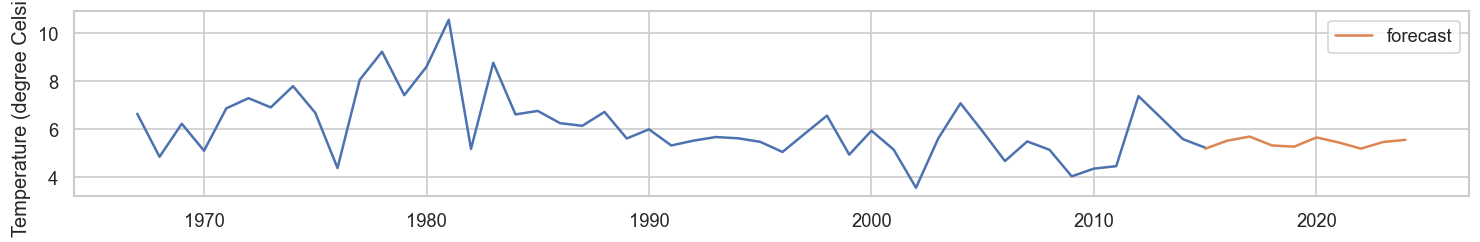

In [651]:
plt.figure(figsize=(15,2))
plt.plot(mins_played["Minuti giocati under21"][:-7])
plt.plot(np.arange(10)+2015, model_fit.forecast(steps=10), label='forecast')
plt.legend()
plt.ylabel('Temperature (degree Celsius)')
plt.show()

In [576]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return np.array(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order, train_size=None):
    # prepare training dataset
    X = X.astype('float32')
    if train_size is None:
        train_size = int(len(X) * 0.50)
    else:
        train_size = int(train_size)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = []
    for t in range(len(test)):
        # difference data
        diff = difference(history, 1)
        model = ARIMA(diff, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        yhat = inverse_difference(history, yhat, 1)
        predictions.append(yhat)
        history.append(test[t])     
    # calculate out of sample error 
    mae = mean_absolute_error(test, predictions)
    return mae


# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s RMSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [585]:
evaluate_models(mins_played["Minuti giocati under21"].to_numpy(), p_values=[0,1,2], d_values=[0,1,2], q_values=[0,1,2])

ARIMA(0, 0, 0) RMSE=0.972
ARIMA(0, 0, 1) RMSE=0.838
ARIMA(0, 0, 2) RMSE=0.858
ARIMA(0, 1, 0) RMSE=1.415
ARIMA(0, 1, 1) RMSE=0.972
ARIMA(0, 1, 2) RMSE=0.893
ARIMA(0, 2, 0) RMSE=2.568
ARIMA(0, 2, 1) RMSE=1.443
ARIMA(0, 2, 2) RMSE=1.077
ARIMA(1, 0, 0) RMSE=0.956
ARIMA(1, 0, 1) RMSE=0.850
ARIMA(1, 0, 2) RMSE=0.854
ARIMA(1, 1, 0) RMSE=1.381
ARIMA(1, 1, 1) RMSE=0.954
ARIMA(1, 1, 2) RMSE=0.905
ARIMA(1, 2, 0) RMSE=1.982
ARIMA(1, 2, 1) RMSE=1.394
ARIMA(1, 2, 2) RMSE=1.023
ARIMA(2, 0, 0) RMSE=0.957
ARIMA(2, 0, 1) RMSE=0.913
ARIMA(2, 0, 2) RMSE=0.967
ARIMA(2, 1, 0) RMSE=1.276
ARIMA(2, 1, 1) RMSE=0.955
ARIMA(2, 1, 2) RMSE=0.928
ARIMA(2, 2, 0) RMSE=1.842
ARIMA(2, 2, 1) RMSE=1.292
ARIMA(2, 2, 2) RMSE=1.041
Best ARIMA(0, 0, 1) RMSE=0.838


# Granger Casuality Test and CCN

In [127]:
from statsmodels.tsa.stattools import grangercausalitytests
import warnings
warnings.filterwarnings("ignore")
maxlag=4
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. 
    The values in the table are the P-Values. 
    P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.
    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:            
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag,verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            #if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df



In [94]:
grangers_causation_matrix(mins_played[['Minuti giocati under21','Minuti giocati Italiani','Minuti giocati Stranieri','Uefa_Ranking','FifaPoints','Punteggio_naz_u21','RK','Entrate','Saldo']][27:-2], variables = mins_played[['Minuti giocati under21','Minuti giocati Italiani','Minuti giocati Stranieri','Uefa_Ranking','FifaPoints','Punteggio_naz_u21','RK','Entrate','Saldo']][27:-2].columns)

,Minuti giocati under21_x,Minuti giocati Italiani_x,Minuti giocati Stranieri_x,Uefa_Ranking_x,FifaPoints_x,Punteggio_naz_u21_x,RK_x,Entrate_x,Saldo_x
Minuti giocati under21_y,1.0000,0.5880,0.5880,0.5502,0.0299,0.3221,0.0000,0.0223,0.0778
Minuti giocati Italiani_y,0.4130,1.0000,0.4130,0.0234,0.0917,0.0847,0.5969,0.3470,0.0755
Minuti giocati Stranieri_y,0.2737,0.2737,1.0000,0.1343,0.4332,0.0022,0.0651,0.0025,0.4830
Uefa_Ranking_y,0.0054,0.0006,0.4455,1.0000,0.2589,0.5008,0.4815,0.6688,0.5080
FifaPoints_y,0.1531,0.3245,0.5162,0.0854,1.0000,0.1532,0.0089,0.0871,0.2731
Punteggio_naz_u21_y,0.1680,0.0320,0.1135,0.0880,0.2561,1.0000,0.6005,0.2488,0.1063
RK_y,0.3193,0.3441,0.2890,0.0407,0.0001,0.0878,1.0000,0.0317,0.0612
Entrate_y,0.0260,0.5681,0.0027,0.1052,0.7721,0.2805,0.2951,1.0000,0.0563
Saldo_y,0.1045,0.5153,0.4013,0.1370,0.3822,0.0195,0.0189,0.0010,1.0000


In [18]:
mins_played[25:].corr(method='spearman')

,Minuti giocati under21,Minuti giocati Italiani,Minuti giocati Stranieri,Minuti giocati Oriundi,Uefa_Ranking,FifaPoints,RK,Punteggio_naz_u21
Minuti giocati under21,1.000000,0.287500,0.529839,0.247774,0.220161,-0.179032,0.310421,0.067762
Minuti giocati Italiani,0.287500,1.000000,-0.611290,-0.306574,0.430242,0.302016,-0.213427,0.492286
Minuti giocati Stranieri,0.529839,-0.611290,1.000000,0.502441,-0.241129,-0.314113,0.353552,-0.367047
Minuti giocati Oriundi,0.247774,-0.306574,0.502441,1.000000,-0.179241,-0.052312,-0.062926,-0.165908
Uefa_Ranking,0.220161,0.430242,-0.241129,-0.179241,1.000000,0.131452,-0.072492,0.178885
FifaPoints,-0.179032,0.302016,-0.314113,-0.052312,0.131452,1.000000,-0.879830,0.496319
RK,0.310421,-0.213427,0.353552,-0.062926,-0.072492,-0.879830,1.000000,-0.450075
Punteggio_naz_u21,0.067762,0.492286,-0.367047,-0.165908,0.178885,0.496319,-0.450075,1.000000


In [331]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
#from grangercausalitytests import grangercausalitytests


test_result=grangercausalitytests(mins_played[['FifaPoints','Minuti giocati Italiani']][28:].diff().dropna(),maxlag=5,verbose=False)
test_result_df=pd.DataFrame(columns=['Lag','Test Statistic','P-value'])
for i in range(2,6):
    test_result_df.loc[i-1]=[i-1,test_result[i][0]['ssr_chi2test'][0],test_result[i][0]['ssr_chi2test'][1]]
print("--------------------------------------------------------------------------------------------")
print("Grenger Causality Test Results for: FifaPoints and Minutes played by Italian U21 players")
print("--------------------------------------------------------------------------------------------")
print(test_result_df)


--------------------------------------------------------------------------------------------
Grenger Causality Test Results for: Points_naz_u21 and Minutes played by Italian U21 players
--------------------------------------------------------------------------------------------
   Lag  Test Statistic   P-value
1  1.0        0.539974  0.763390
2  2.0        1.165756  0.761229
3  3.0        3.642362  0.456564
4  4.0        5.261893  0.384761


In [64]:
prova=mins_played[['FifaPoints','Minuti giocati Italiani']]
prova['Prediction'] = prova[['Minuti giocati Italiani']].shift(6)

In [65]:
#fai la OLS regression tra i minuti giocati dai giocatori under 21 e il ranking uefa
import statsmodels.api as sm

#X = prova[["Minuti giocati Italiani"]][25:] 
X = prova[["Prediction"]][25:] 
y = prova[["FifaPoints"]][25:]
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:             FifaPoints   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     10.74
Date:                Thu, 25 Jan 2024   Prob (F-statistic):            0.00272
Time:                        12:35:52   Log-Likelihood:                -21.995
No. Observations:                  31   AIC:                             47.99
Df Residuals:                      29   BIC:                             50.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0988      0.252     12.306      0.0

In [333]:
from statsmodels.tsa.stattools import ccf
#ccf(mins_played["Punteggio_naz_u21"][22:],mins_played["Minuti giocati Italiani"][22:],adjusted=False)
cross_corr_ita_fifa=ccf(mins_played["FifaPoints"][25:-2],mins_played["Minuti giocati Italiani"][25:-2],adjusted=True)
corr_pearson_ita_fifa=pearsonr(mins_played["FifaPoints"][25:],mins_played["Minuti giocati Italiani"][25:],alternative='greater')
print(f"Peason Correlation: {round(corr_pearson_ita_fifa.statistic,4)}, P-value {round(corr_pearson_ita_fifa.pvalue,4)}")
print(f"Correlation Minuti giocati Italiani e FifaPoints Lag 0: {round(cross_corr_ita_fifa[0],5)}")
print(f"Correlation Minuti giocati Italiani e FifaPoints Lag 1: {round(cross_corr_ita_fifa[1],4)}")
print(f"Correlation Minuti giocati Italiani e FifaPoints Lag 2: {round(cross_corr_ita_fifa[2],4)}")
#crea una tabella con i valori di cross correlation


corr_spearman_ita_nazu21=pearsonr(mins_played["FifaPoints"][25:-2],mins_played["Minuti giocati Italiani"][25:-2])
corr_spearman_ita_nazu21_lag1=pearsonr(mins_played["FifaPoints"][25:-2],mins_played["Minuti giocati Italiani"][24:-2].shift(1).dropna())
corr_spearman_ita_nazu21_lag2=pearsonr(mins_played["FifaPoints"][25:-2],mins_played["Minuti giocati Italiani"][23:-2].shift(2).dropna())


print(f"Spearman Correlation: {round(corr_spearman_ita_nazu21.statistic,4)}, P-value {round(corr_spearman_ita_nazu21.pvalue,4)}")
print(f"Lag1 Correlation: {round(corr_spearman_ita_nazu21_lag1.statistic,4)}, P-value {round(corr_spearman_ita_nazu21_lag1.pvalue,4)}")
print(f"Lag2 Correlation: {round(corr_spearman_ita_nazu21_lag2.statistic,4)}, P-value {round(corr_spearman_ita_nazu21_lag2.pvalue,4)}")


Peason Correlation: 0.2527, P-value 0.0851
Correlation Minuti giocati Italiani e FifaPoints Lag 0: 0.257
Correlation Minuti giocati Italiani e FifaPoints Lag 1: 0.0996
Correlation Minuti giocati Italiani e FifaPoints Lag 2: 0.0776
Spearman Correlation: 0.257, P-value 0.1784
Lag1 Correlation: 0.2163, P-value 0.2596
Lag2 Correlation: 0.2093, P-value 0.2758


In [340]:
corr_spearman_ita_nazu21=spearmanr(mins_played["Punteggio_naz_u21"][24:-2],mins_played["Minuti giocati Italiani"][24:-2])
corr_spearman_ita_nazu21_lag1=spearmanr(mins_played["Punteggio_naz_u21"][24:-2],mins_played["Minuti giocati Italiani"][23:-2].shift(1).dropna())
corr_spearman_ita_nazu21_lag2=spearmanr(mins_played["Punteggio_naz_u21"][24:-2],mins_played["Minuti giocati Italiani"][22:-2].shift(2).dropna())


print(f"Peason Correlation: {round(corr_spearman_ita_nazu21.statistic,4)}, P-value {round(corr_spearman_ita_nazu21.pvalue,4)}")
print(f"Lag1 Correlation: {round(corr_spearman_ita_nazu21_lag1.statistic,4)}, P-value {round(corr_spearman_ita_nazu21_lag1.pvalue,4)}")
print(f"Lag2 Correlation: {round(corr_spearman_ita_nazu21_lag2.statistic,4)}, P-value {round(corr_spearman_ita_nazu21_lag2.pvalue,4)}")


#for i in range(len(mins_played[16:])):
#    corr_shift=pearsonr(mins_played["Punteggio_naz_u21"][19+i:-2],mins_played["Minuti giocati Italiani"][18+i:-2].shift(1).dropna(),alternative='two-sided')
#    corr=pearsonr(mins_played["Punteggio_naz_u21"][19+i:-2],mins_played["Minuti giocati Italiani"][19+i:-2],alternative='two-sided')
#    #if corr_shift>corr:
#    print(f"{19 + i} corr_shift {corr_shift.statistic}, corr {corr.statistic}")

Peason Correlation: 0.4989, P-value 0.005
Lag1 Correlation: 0.3157, P-value 0.0893
Lag2 Correlation: 0.3109, P-value 0.0945


In [344]:
from statsmodels.tsa.stattools import ccf

cross_corr_ita_nazu21=ccf(mins_played["Punteggio_naz_u21"][24:-2],mins_played["Minuti giocati Italiani"][24:-2],adjusted=True)
corr_pearson_ita_nazu21=pearsonr(mins_played["Punteggio_naz_u21"][24:-2],mins_played["Minuti giocati Italiani"][24:-2],alternative='greater')
print("Cross correlation between Italian U21 players and National Team U21 Points")
print("--------------------------------------------------------------------------------------------")
print(f"Peason Correlation: {round(corr_pearson_ita_nazu21.statistic,4)}, P-value {round(corr_pearson_ita_nazu21.pvalue,4)}")
print(f"Correlation Minuti giocati Italiani e Punteggio_naz_u21 Lag 0: {round(cross_corr_ita_nazu21[0],4)}")
print(f"Correlation Minuti giocati Italiani e Punteggio_naz_u21 Lag 1: {round(cross_corr_ita_nazu21[1],4)}")
print(f"Correlation Minuti giocati Italiani e Punteggio_naz_u21 Lag 2: {round(cross_corr_ita_nazu21[2],4)}")
print("--------------------------------------------------------------------------------------------")

corr_spearman_ita_nazu21=spearmanr(mins_played["Punteggio_naz_u21"][24:-2],mins_played["Minuti giocati Italiani"][24:-2])
corr_spearman_ita_nazu21_lag1=spearmanr(mins_played["Punteggio_naz_u21"][24:-2],mins_played["Minuti giocati Italiani"][23:-2].shift(1).dropna())
corr_spearman_ita_nazu21_lag2=spearmanr(mins_played["Punteggio_naz_u21"][24:-2],mins_played["Minuti giocati Italiani"][22:-2].shift(2).dropna())


print(f"Spearman Correlation: {round(corr_spearman_ita_nazu21.statistic,4)}, P-value {round(corr_spearman_ita_nazu21.pvalue,4)}")
print(f"Lag1 Correlation: {round(corr_spearman_ita_nazu21_lag1.statistic,4)}, P-value {round(corr_spearman_ita_nazu21_lag1.pvalue,4)}")
print(f"Lag2 Correlation: {round(corr_spearman_ita_nazu21_lag2.statistic,4)}, P-value {round(corr_spearman_ita_nazu21_lag2.pvalue,4)}")




Cross correlation between Italian U21 players and National Team U21 Points
--------------------------------------------------------------------------------------------
Peason Correlation: 0.4989, P-value 0.0025
Correlation Minuti giocati Italiani e Punteggio_naz_u21 Lag 0: 0.4989
Correlation Minuti giocati Italiani e Punteggio_naz_u21 Lag 1: 0.3025
Correlation Minuti giocati Italiani e Punteggio_naz_u21 Lag 2: 0.2465
--------------------------------------------------------------------------------------------
Spearman Correlation: 0.566, P-value 0.0011
Lag1 Correlation: 0.4133, P-value 0.0232
Lag2 Correlation: 0.3897, P-value 0.0333


In [348]:
from statsmodels.tsa.stattools import ccf

cross_corr=ccf(mins_played["Entrate"][27:-2],mins_played["Minuti giocati under21"][27:-2],adjusted=True)
corr_pearson_ita_fifa=pearsonr(mins_played["Entrate"][27:-2],mins_played["Minuti giocati under21"][27:-2],alternative='greater')
print("Cross correlation between U21 players and Profit")
print("--------------------------------------------------------------------------------------------")
print(f"Peason Correlation: {round(corr_pearson_ita_fifa.statistic,4)}, P-value {round(corr_pearson_ita_fifa.pvalue,4)}")
print(f"Correlation Minuti giocati under21 e Entrate Lag 0: {round(cross_corr[0],4)}")
print(f"Correlation Minuti giocati under21 e Entrate Lag 1: {round(cross_corr[1],4)}")
print(f"Correlation Minuti giocati under21 e Entrate Lag 2: {round(cross_corr[2],4)}")
print("--------------------------------------------------------------------------------------------")

corr_spearman_ita_nazu21=spearmanr(np.log(mins_played["Entrate"][27:-2]),mins_played["Minuti giocati under21"][27:-2])
corr_spearman_ita_nazu21_lag1=spearmanr(np.log(mins_played["Entrate"][27:-2]),mins_played["Minuti giocati under21"][26:-2].shift(1).dropna())
corr_spearman_ita_nazu21_lag2=spearmanr(np.log(mins_played["Entrate"][27:-2]),mins_played["Minuti giocati under21"][25:-2].shift(2).dropna())

print(f"Spearman Correlation: {round(corr_spearman_ita_nazu21.statistic,4)}, P-value {round(corr_spearman_ita_nazu21.pvalue,4)}")
print(f"Lag1 Correlation: {round(corr_spearman_ita_nazu21_lag1.statistic,4)}, P-value {round(corr_spearman_ita_nazu21_lag1.pvalue,4)}")
print(f"Lag2 Correlation: {round(corr_spearman_ita_nazu21_lag2.statistic,4)}, P-value {round(corr_spearman_ita_nazu21_lag2.pvalue,4)}")

Cross correlation between U21 players and Profit
--------------------------------------------------------------------------------------------
Peason Correlation: 0.4005, P-value 0.0192
Correlation Minuti giocati under21 e Entrate Lag 0: 0.4005
Correlation Minuti giocati under21 e Entrate Lag 1: 0.4341
Correlation Minuti giocati under21 e Entrate Lag 2: 0.2459
--------------------------------------------------------------------------------------------
Spearman Correlation: 0.2503, P-value 0.2079
Lag1 Correlation: 0.2381, P-value 0.2317
Lag2 Correlation: 0.0916, P-value 0.6496


In [106]:
adf_test(mins_played[["Entrate"]][27:])

,Entrate
Test statistic,-1.4476
p-value,0.5592
Critical value - 1%,-3.6889
Critical value - 5%,-2.9720
Critical value - 10%,-2.6253


In [322]:
test_result=grangercausalitytests(mins_played[['Punteggio_naz_u21','Minuti giocati Italiani']][28:-2].diff().dropna(),maxlag=4,verbose=False)
#create a dataframe with the results of the granger causality test
test_result_df=pd.DataFrame(columns=['Lag','Test Statistic','P-value'])
for i in range(2,5):
    test_result_df.loc[i-1]=[i-1,test_result[i][0]['ssr_chi2test'][0],test_result[i][0]['ssr_chi2test'][1]]
print("Grenger Causality Test Results for: Points_naz_u21 and Minutes played by Italian U21 players")
print(test_result_df)




Grenger Causality Test Results for: Points_naz_u21 and Minutes played by Italian U21 players
   Lag  Test Statistic   P-value
1  1.0       11.916540  0.002584
2  2.0       12.483196  0.005899
3  3.0       10.864519  0.028130


In [324]:
prova=mins_played.copy()
prova["Diff"]=prova["Entrate"].diff().dropna()

In [326]:
from statsmodels.tsa.stattools import grangercausalitytests

test_result=grangercausalitytests(prova[['Diff','Minuti giocati under21']][25:-2].diff().dropna(),maxlag=4,verbose=False)
test_result_df=pd.DataFrame(columns=['Lag','Test Statistic','P-value'])
for i in range(2,5):
    test_result_df.loc[i-1]=[i-1,test_result[i][0]['ssr_chi2test'][0],test_result[i][0]['ssr_chi2test'][1]]
print("Grenger Causality Test Results for: Profit and Minutes played by U21 players")
print(test_result_df)


Grenger Causality Test Results for: Profit and Minutes played by U21 players
   Lag  Test Statistic   P-value
1  1.0       10.434963  0.005421
2  2.0       12.712740  0.005301
3  3.0       26.026614  0.000031


<Axes: >

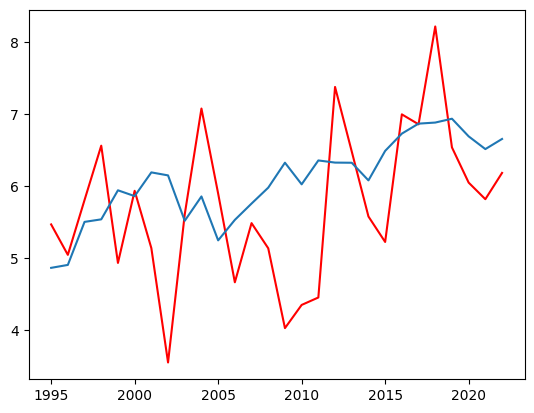

In [172]:
mins_played["Minuti giocati under21"][28:].plot(color="red")
np.log(mins_played["Entrate"][28:]).plot()

In [56]:
grangercausalitytests(SerieA_SerieB[['Minuti giocati under21SeriaA','Minuti giocati under21SerieB']],maxlag=6,verbose=True)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.5565  , p=0.0032  , df_denom=52, df_num=1
ssr based chi2 test:   chi2=10.1078 , p=0.0015  , df=1
likelihood ratio test: chi2=9.2791  , p=0.0023  , df=1
parameter F test:         F=9.5565  , p=0.0032  , df_denom=52, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.7287  , p=0.0311  , df_denom=49, df_num=2
ssr based chi2 test:   chi2=8.2183  , p=0.0164  , df=2
likelihood ratio test: chi2=7.6499  , p=0.0218  , df=2
parameter F test:         F=3.7287  , p=0.0311  , df_denom=49, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.1174  , p=0.1109  , df_denom=46, df_num=3
ssr based chi2 test:   chi2=7.3189  , p=0.0624  , df=3
likelihood ratio test: chi2=6.8558  , p=0.0766  , df=3
parameter F test:         F=2.1174  , p=0.1109  , df_denom=46, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.4564  , p=0.2321  , df_d

{1: ({'ssr_ftest': (9.55647109100429, 0.0031992116792870498, 52.0, 1),
   'ssr_chi2test': (10.107805961639155, 0.0014764262737570369, 1),
   'lrtest': (9.279119522122699, 0.002317808160271019, 1),
   'params_ftest': (9.556471091004303, 0.0031992116792870376, 52.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (3.728687518374971, 0.031091899367839702, 49.0, 2),
   'ssr_chi2test': (8.218331673152997, 0.01642146700175067, 2),
   'lrtest': (7.649944084387272, 0.02181904553516566, 2),
   'params_ftest': (3.728687518374965, 0.031091899367839893, 49.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (2.1174232455045248, 0.11094656358972155, 46.0, 3),
   'ssr_chi2test': (7.318919479026509, 0.06239835791645443, 3),
   'lrtest': (6.855756532574304, 0.0766402106954719, 3),
   'params_ftest': (2.1174232455045217, 0.11094656358972195, 46.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 

In [51]:
SerieA_SerieB

,Minuti giocati under21SerieB,Minuti giocati under21SeriaA
1967-1968,10.594697,5.987542
1968-1969,12.158161,4.841582
1969-1970,9.365896,6.181818
1970-1971,10.147528,5.095118
1971-1972,8.644471,6.451515
1972-1973,9.899920,6.208418
1973-1974,8.822568,6.655892
1974-1975,11.808480,7.756734
1975-1976,15.344099,6.482155
1976-1977,13.042663,4.371044


In [54]:
#correlation between uefa ranking and minutes by squad of high part of the ranking
from scipy.stats import pearsonr,spearmanr,kendalltau
#corr_pearson, p_value = pearsonr(SerieA_SerieB[['Minuti giocati under21SeriaA']],SerieA_SerieB[['Minuti giocati under21SerieB']])
correlazione_spearman, p_value_spearman= spearmanr(SerieA_SerieB[['Minuti giocati under21SeriaA']],SerieA_SerieB[['Minuti giocati under21SerieB']])
correlazione_kendall,p_value_kendall=kendalltau(SerieA_SerieB[['Minuti giocati under21SeriaA']],SerieA_SerieB[['Minuti giocati under21SerieB']])
#print(f"Correlazione di Pearson: {corr_pearson}")
#print(f"P-value Pearson: {p_value}")
print(f"Correlazione di Spearman: {correlazione_spearman}")
print(f"P-value Spearman: {p_value_spearman}")
print(f"Correlazione di Kendall: {correlazione_kendall}")
print(f"P-value Spearman: {p_value_kendall}")

Correlazione di Spearman: 0.3530416951469583
P-value Spearman: 0.0076106515636798775
Correlazione di Kendall: 0.23506493506493512
P-value Spearman: 0.010514065115924912


In [10]:
df_grang=mins_played[['Minuti giocati under21','Minuti giocati Italiani','Uefa_Ranking']][25:]

In [11]:
#one-sided F test for variance
from scipy.stats import f_oneway
f_oneway(df_grang['Minuti giocati under21'],df_grang['Minuti giocati Italiani'],df_grang['Uefa_Ranking'])


F_onewayResult(statistic=152.47975668315718, pvalue=1.2475181265535377e-29)

In [72]:
serie_a.head(5)

,Minuti giocati under21,Minuti giocati Italiani,Minuti giocati Stranieri,Minuti giocati Oriundi
1967-1968,5.987542,5.987542,0.0,NaN
1968-1969,4.841582,4.841582,0.0,NaN
1969-1970,6.181818,6.181818,0.0,NaN
1970-1971,5.095118,5.095118,0.0,NaN
1971-1972,6.451515,6.451515,0.0,NaN


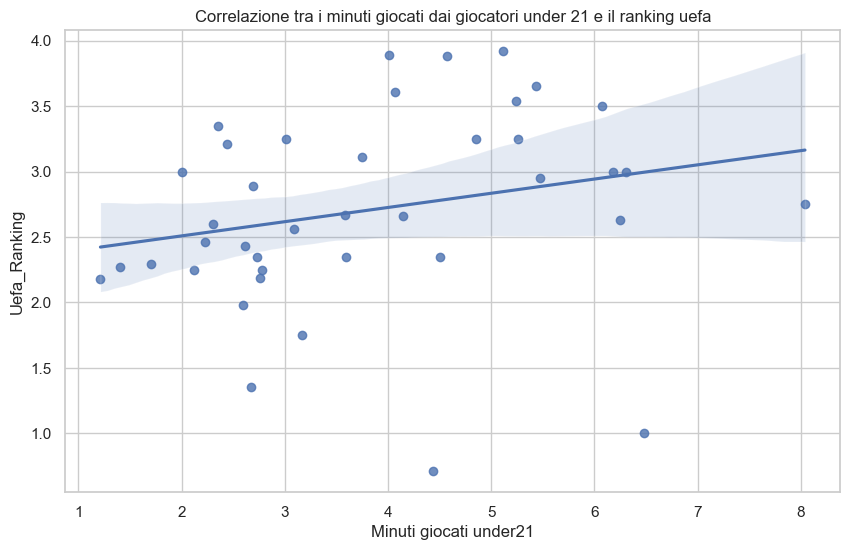

In [62]:
#stampa il grafico della correlazione tra i minuti giocati dai giocatori under 21 e il ranking uefa come retta di regressione
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,6))
sns.regplot(x=mins_played["Minuti giocati Italiani"], y=mins_played["Punteggio_naz_u21"])
plt.xlabel("Minuti giocati under21")
plt.ylabel("Uefa_Ranking")
plt.title("Correlazione tra i minuti giocati dai giocatori under 21 e il ranking uefa")
plt.show()



In [58]:
SerieA_SerieB.head()

,Minuti giocati under21SerieB,Minuti giocati under21SeriaA
1967-1968,10.594697,5.987542
1968-1969,12.158161,4.841582
1969-1970,9.365896,6.181818
1970-1971,10.147528,5.095118
1971-1972,8.644471,6.451515


In [65]:
SerieA_SerieB[['Minuti giocati under21SeriaA']] = SerieA_SerieB[['Minuti giocati under21SeriaA']].shift(1)


In [67]:
SerieA_SerieB.fillna(0,inplace=True)

In [66]:
SerieA_SerieB.head()

,Minuti giocati under21SerieB,Minuti giocati under21SeriaA
1967-1968,10.594697,NaN
1968-1969,12.158161,0.000000
1969-1970,9.365896,5.987542
1970-1971,10.147528,4.841582
1971-1972,8.644471,6.181818


In [227]:
#fai la OLS regression tra i minuti giocati dai giocatori under 21 e il ranking uefa
import statsmodels.api as sm

X = mins_played["Minuti giocati under21"][24:]
y = mins_played["Entrate"][24:]
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                Entrate   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     4.288
Date:                Wed, 24 Jan 2024   Prob (F-statistic):             0.0471
Time:                        17:00:53   Log-Likelihood:                -224.90
No. Observations:                  32   AIC:                             453.8
Df Residuals:                      30   BIC:                             456.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -136

In [68]:
import statsmodels.api as sm

X = SerieA_SerieB[['Minuti giocati under21SerieB']][2:]
y = SerieA_SerieB[['Minuti giocati under21SeriaA']][2:]
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Minuti giocati under21SeriaA   R-squared:                       0.093
Model:                                      OLS   Adj. R-squared:                  0.076
Method:                           Least Squares   F-statistic:                     5.332
Date:                          Wed, 10 Jan 2024   Prob (F-statistic):             0.0249
Time:                                  18:12:53   Log-Likelihood:                -89.852
No. Observations:                            54   AIC:                             183.7
Df Residuals:                                52   BIC:                             187.7
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------

In [57]:
import statsmodels.api as sm

X = SerieA_SerieB[['Minuti giocati under21SerieB']]
y = SerieA_SerieB[['Minuti giocati under21SeriaA']]
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

#SerieA_SerieB[['Minuti giocati under21SeriaA','Minuti giocati under21SerieB']]

                                 OLS Regression Results                                 
Dep. Variable:     Minuti giocati under21SeriaA   R-squared:                       0.157
Model:                                      OLS   Adj. R-squared:                  0.141
Method:                           Least Squares   F-statistic:                     10.03
Date:                          Wed, 10 Jan 2024   Prob (F-statistic):            0.00253
Time:                                  17:45:57   Log-Likelihood:                -90.140
No. Observations:                            56   AIC:                             184.3
Df Residuals:                                54   BIC:                             188.3
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------

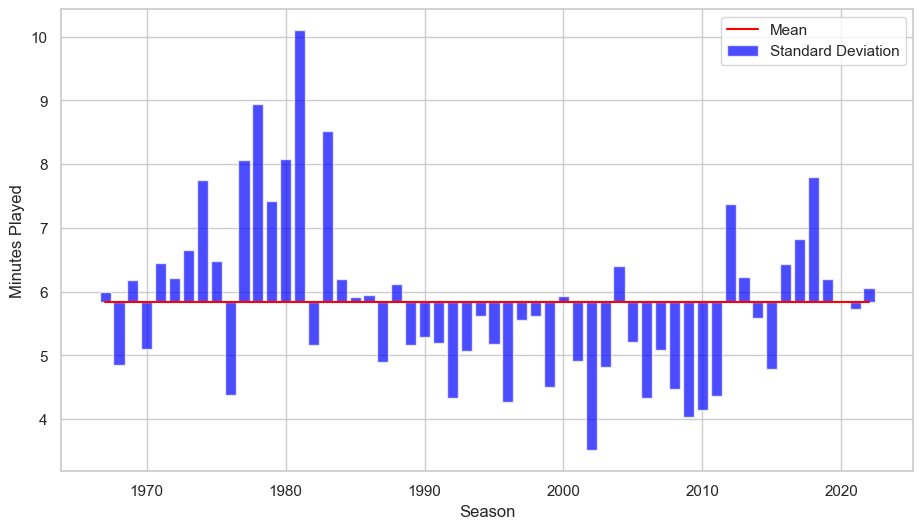

In [104]:
sns.set_style("whitegrid")

# Calcola la media dei minuti giocati
mean_minutes = mins_played['Minuti giocati under21'].mean()

# Calcola la deviazione dei minuti giocati rispetto alla media
mins_played['Deviazione'] = mins_played['Minuti giocati under21'] - mean_minutes
# Plot della linea media
plt.figure(figsize=(11, 6))
plt.plot(mins_played.index, [mean_minutes] * len(mins_played), label='Mean', color='red')

# Plot delle barre di deviazione per ogni stagione
plt.bar(mins_played.index, mins_played['Deviazione'], color='blue', alpha=0.7, label='Standard Deviation',bottom=mean_minutes)

#plt.title('Mean and Standard Deviation of Minutes Played by Under-21 Players')
plt.xlabel('Season')
plt.ylabel('Minutes Played')
plt.legend()
plt.show()

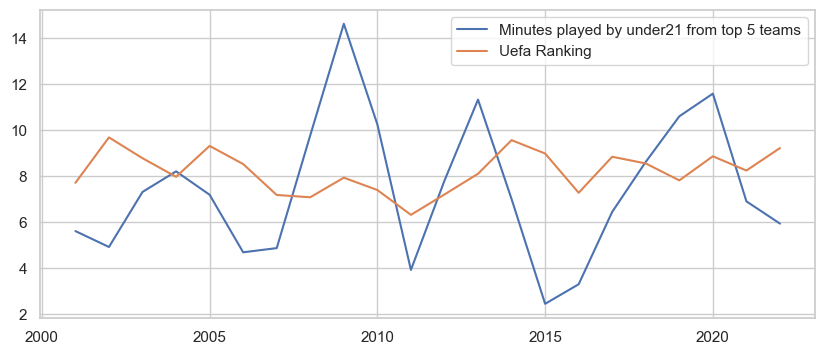

In [46]:
plt.rcParams['figure.figsize'] = [10, 4]
(mins_played["Minuti giocati Prima Parte Classifica"][33:]*9).rolling(2).mean().plot(label='Minutes played by under21 from top 5 teams')
((mins_played["Uefa_Ranking"][33:]).rolling(2).mean().plot(label='Uefa Ranking'))
                                                                               
#(mins_played["Minuti giocati under21"][40:]).rolling(2).mean().plot()
#plt.xticks(rotation=90)
#adjust the size of the graph


plt.legend()

In [26]:
#correlazione tra il la percentuale di minuti giocati dagli under 21 stranieri e italiani nel periodo 2011-2012 e 2021-2022
from scipy.stats import pearsonr,spearmanr

corr_pearson, p_value = pearsonr(mins_played["Minuti giocati Italiani"][40:] + mins_played["Minuti giocati Oriundi"][40:],mins_played["Minuti giocati under21"][40:])
correlazione_spearman, p_value_spearman= spearmanr(mins_played["Minuti giocati Italiani"][40:] + mins_played["Minuti giocati Oriundi"][40:],mins_played["Minuti giocati under21"][40:])
print(f"Correlazione di Pearson: {corr_pearson}")
print(f"P-value Pearson: {p_value}")
print(f"Correlazione di Spearman: {correlazione_spearman}")
print(f"P-value Spearman: {p_value_spearman}")



Correlazione di Pearson: 0.6464639703584583
P-value Pearson: 0.006809663357140005
Correlazione di Spearman: 0.6323529411764706
P-value Spearman: 0.008577584103099355


In [75]:
#crea un datframe chiamato perc_under_ita_stra
perc_under_ita_stra=mins_played[41:]
#perc_under_ita_stra.head()
perc_under_ita_stra["Minuti giocati Stranieri"]=perc_under_ita_stra["Minuti giocati Stranieri"]/perc_under_ita_stra["Minuti giocati under21"]*100
perc_under_ita_stra["Minuti giocati Italiani"]=perc_under_ita_stra["Minuti giocati Italiani"]/perc_under_ita_stra["Minuti giocati under21"]*100+perc_under_ita_stra["Minuti giocati Oriundi"]/perc_under_ita_stra["Minuti giocati under21"]*100
#perc_under_ita_stra["Minuti giocati Oriundi"]=perc_under_ita_stra["Minuti giocati Oriundi"]/perc_under_ita_stra["Minuti giocati under21"]*100
perc_under_ita_stra=perc_under_ita_stra.drop(columns=["Minuti giocati Oriundi"])
#perc_under_ita_stra


In [14]:
#fai la media di ogni tre anni e crea un nuvo datframe
perc_under_ita_stra=perc_under_ita_stra.rolling(3).mean()

In [78]:
print(f"L'influenza percentuale di Minuti_under21_Stranieri sul trend è: {perc_under_ita_stra['Minuti giocati Stranieri'].mean()}")
print(f"La deviazione standard di Minuti_under21_Strasnieri sul trend è: {perc_under_ita_stra['Minuti giocati Stranieri'].std()}")
#intervallo di confidenza al 95%
confidence_interval_stra = stats.t.interval(0.95, len(perc_under_ita_stra["Minuti giocati Stranieri"])-1, loc=perc_under_ita_stra["Minuti giocati Stranieri"].mean(), scale=stats.sem(perc_under_ita_stra["Minuti giocati Stranieri"]))
print(f"Intervallo di Confidenza Minuti_under21_Strasnieri al 95%: {confidence_interval_stra}")

print(f"L'influenza percentuale di Minuti_under21_Italiani sul trend è: {perc_under_ita_stra['Minuti giocati Italiani'].mean()}")
print(f"deviazione standard di Minuti_under21_Italiani sul trend è: {perc_under_ita_stra['Minuti giocati Italiani'].std()}")
#intervallo di confidenza al 95%
confidence_interval_ita = stats.t.interval(0.95, len(perc_under_ita_stra["Minuti giocati Italiani"])-1, loc=perc_under_ita_stra["Minuti giocati Italiani"].mean(), scale=stats.sem(perc_under_ita_stra["Minuti giocati Italiani"]))
print(f"Intervallo di Confidenza Minuti_under21_Italiani al 95%: {confidence_interval_ita}")


L'influenza percentuale di Minuti_under21_Stranieri sul trend è: 59.09747043706466
La deviazione standard di Minuti_under21_Strasnieri sul trend è: 8.476518215584795
Intervallo di Confidenza Minuti_under21_Strasnieri al 95%: (54.403331112537344, 63.79160976159197)
L'influenza percentuale di Minuti_under21_Italiani sul trend è: 40.90252956293534
deviazione standard di Minuti_under21_Italiani sul trend è: 8.476518215584802
Intervallo di Confidenza Minuti_under21_Italiani al 95%: (36.20839023840803, 45.596668887462656)


In [76]:
perc_under_ita_stra.rolling(window=3).mean()[2:]

,Minuti giocati under21,Minuti giocati Italiani,Minuti giocati Stranieri
2010-2011,4.212786,37.946809,62.053191
2011-2012,4.177255,33.821316,66.178684
2012-2013,5.295499,35.937759,64.062241
2013-2014,5.988703,35.262108,64.737892
2014-2015,6.394427,41.819332,58.180668
2015-2016,5.527246,44.624171,55.375829
2016-2017,5.594763,45.723871,54.276129
2017-2018,6.007886,49.413311,50.586689
2018-2019,7.014133,45.201586,54.798414
2019-2020,6.940103,45.030667,54.969333


## Bayesian changepoint detection con Ruptures

In [4]:
#modify the index of mins_played and get only the first part(examples: 2022-2023 becomes 2022, 2021-2022 becomes 2021)
mins_played.index=mins_played.index.str[:4].astype(int)
#convert the index of mins_played to DateTime
mins_played.index=pd.to_datetime(mins_played.index, format='%Y')

In [5]:
mins_played.index = mins_played.index.to_period('Y')

Punti di rottura trovati: [1977, 1984, 2012]
Punti di rottura trovati: [10, 17, 45]


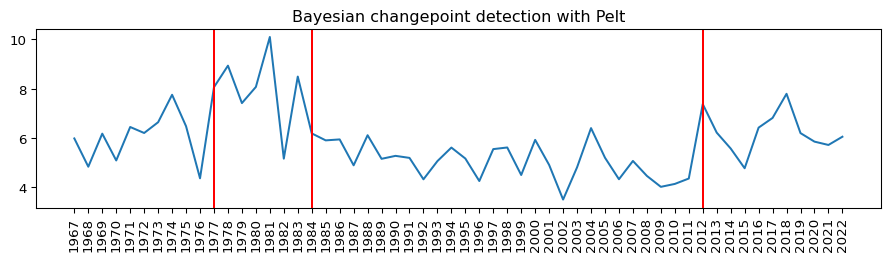

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(900/96, 250/96), dpi=96)
# Crea un punto di rottura con il modello "l1" (changepoint detection basato sulla somma delle differenze)
model = "l2"
impressions = mins_played["Minuti giocati under21"].values.reshape(-1, 1)

penalty=2*np.log(len(impressions))*np.std(impressions)**2
print
# Esegui il rilevamento dei cambiamenti senza specificare il numero di punti di rottura
algo = rpt.Pelt(model=model,jump=1).fit(impressions)
result = algo.predict(pen=7)

# Puoi visualizzare i punti di rottura sul grafico

#rpt.display(impressions,[], result)


# Stampa i punti di rottura trovati
print("Punti di rottura trovati:", [x+1967 for x in result[0:-1]])

# Puoi visualizzare i punti di rottura sul grafico
#rpt.display(impressions,[], result)
ax.plot(impressions)
for bkp in result[0:-1]:
    ax.axvline(x=bkp, color='r', )
ax.set_title("Bayesian changepoint detection with Pelt")
fig.tight_layout()
#change the x ticks to be the index of mins_played
#crea una lista da 0 a 54
a=list(range(0,56))
b=list(range(1967,2023))
ax.set_xticks(a,b)
#ruota i tick di 90 gradi
plt.xticks(rotation=90)
print("Punti di rottura trovati:", result[0:-1])
plt.show()

Punti di rottura trovati: [1977, 1985, 2011, 2023]
Punti di rottura trovati: [10, 18, 44]


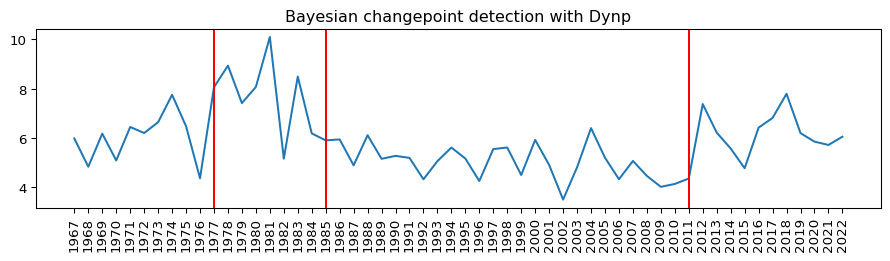

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(900/96, 250/96), dpi=96)

# Crea un punto di rottura con il modello "l1" (changepoint detection basato sulla somma delle differenze)
model = "l2"
impressions = mins_played["Minuti giocati under21"].values.reshape(-1, 1)

# Esegui il rilevamento dei cambiamenti senza specificare il numero di punti di rottura
algo = rpt.Dynp(model=model, min_size=3,jump=2).fit(impressions)
result = algo.predict(n_bkps=3)

# Stampa i punti di rottura trovati
print("Punti di rottura trovati:", [x+1967 for x in result])

# Puoi visualizzare i punti di rottura sul grafico
#rpt.display(impressions,[], result)
ax.plot(impressions)
for bkp in result[0:-1]:
    ax.axvline(x=bkp, color='r', )
ax.set_title("Bayesian changepoint detection with Dynp")
fig.tight_layout()
#change the x ticks to be the index of mins_played
#crea una lista da 0 a 54
a=list(range(0,56))
b=list(range(1967,2023))
ax.set_xticks(a,b)
#ruota i tick di 90 gradi
plt.xticks(rotation=90)
print("Punti di rottura trovati:", result[0:-1])
plt.show()


Punti di rottura trovati: [1999, 2009, 2023]


(<Figure size 1000x200 with 1 Axes>, [<Axes: >])

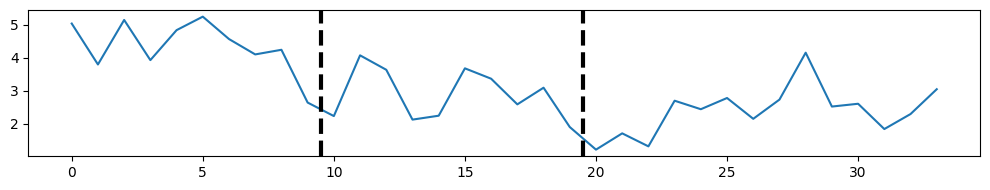

In [20]:
# Crea un punto di rottura con il modello "l1" (changepoint detection basato sulla somma delle differenze)
model = "l2"
impressions_first_up_trend = (mins_played["Minuti giocati Italiani"][22:]+mins_played["Minuti giocati Oriundi"][22:]).values.reshape(-1, 1)

# Esegui il rilevamento dei cambiamenti senza specificare il numero di punti di rottura
algo = rpt.Dynp(model=model, min_size=4,jump=5).fit(impressions_first_up_trend)
result = algo.predict(n_bkps=2)

# Stampa i punti di rottura trovati
print("Punti di rottura trovati:", [x+1989 for x in result])

# Puoi visualizzare i punti di rottura sul grafico
rpt.display(impressions_first_up_trend,[], result)

Punti di rottura trovati: [1973, 1985, 1989]


(<Figure size 1000x200 with 1 Axes>, [<Axes: >])

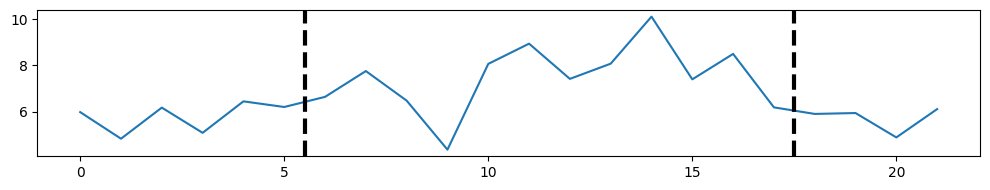

In [171]:
# Crea un punto di rottura con il modello "l1" (changepoint detection basato sulla somma delle differenze)
model = "l2"
impressions_first_up_trend = mins_played["Minuti giocati under21"][0:22].values.reshape(-1, 1)

# Esegui il rilevamento dei cambiamenti senza specificare il numero di punti di rottura
algo = rpt.Dynp(model=model, min_size=1,jump=3).fit(impressions_first_up_trend)
result = algo.predict(n_bkps=2)

# Stampa i punti di rottura trovati
print("Punti di rottura trovati:", [x+1967 for x in result])

# Puoi visualizzare i punti di rottura sul grafico
rpt.display(impressions_first_up_trend,[], result)

Punti di rottura trovati: [2011, 2023]


(<Figure size 1000x200 with 1 Axes>, [<Axes: >])

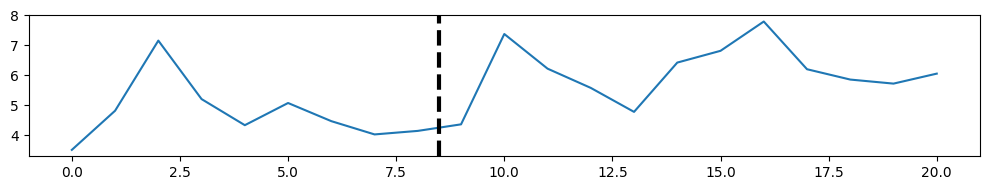

In [127]:
# Crea un punto di rottura con il modello "l1" (changepoint detection basato sulla somma delle differenze)
model = "l2"
impressions_final_trend = mins_played["Minuti giocati under21"][50:].values.reshape(-1, 1)
# Esegui il rilevamento dei cambiamenti senza specificare il numero di punti di rottura
algo = rpt.Dynp(model=model, min_size=1,jump=3).fit(impressions_final_trend)
result = algo.predict(n_bkps=1)

# Stampa i punti di rottura trovati
print("Punti di rottura trovati:", [x+2002 for x in result])

# Puoi visualizzare i punti di rottura sul grafico
rpt.display(impressions_final_trend,[], result)

Punti di rottura trovati: [10, 17, 45, 56]


(<Figure size 1000x200 with 1 Axes>, [<Axes: >])

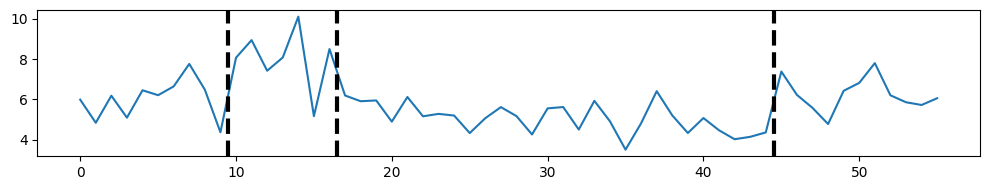

In [12]:
# Crea un punto di rottura con il modello "l1" (changepoint detection basato sulla somma delle differenze)
model = "l1"

# Esegui il rilevamento dei cambiamenti senza specificare il numero di punti di rottura
algo = rpt.Dynp(model=model, min_size=1,jump=1).fit(impressions)
result = algo.predict(n_bkps=3)

# Stampa i punti di rottura trovati
print("Punti di rottura trovati:", result)

# Puoi visualizzare i punti di rottura sul grafico
rpt.display(impressions,[], result)

Punti di rottura trovati: [10, 17, 45]


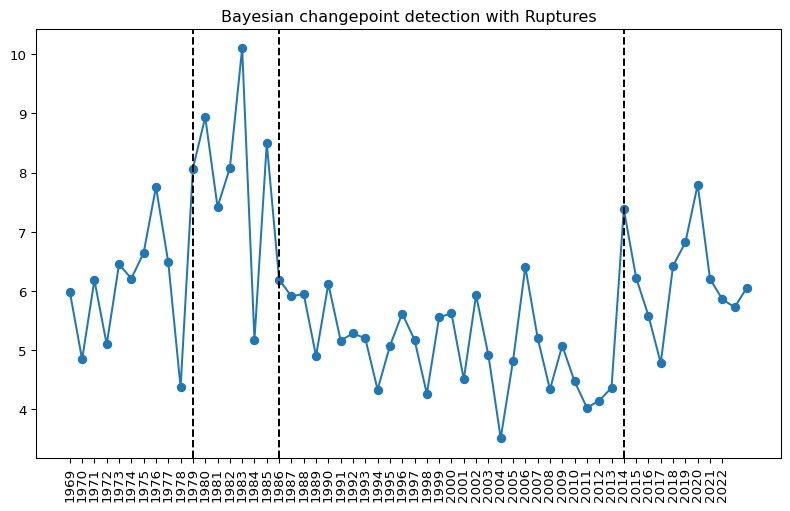

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(800/96, 500/96), dpi=96)

kernel = 'linear'
algo = rpt.KernelCPD(kernel=kernel, min_size=6)
algo.fit(impressions)
result = algo.predict(n_bkps=3)
ax.plot(impressions,marker='o')
for bkp in result[0:-1]:
    ax.axvline(x=bkp, color='k', linestyle='--')
ax.set_title("Bayesian changepoint detection with Ruptures")
fig.tight_layout()
#change the x ticks to be the index of mins_played
#crea una lista da 0 a 54
a=list(range(0,54))
b=list(range(1969,2023))
ax.set_xticks(a,b)
#ruota i tick di 90 gradi
plt.xticks(rotation=90)
print("Punti di rottura trovati:", result[0:-1])
plt.show()

Punti di rottura trovati: [22]


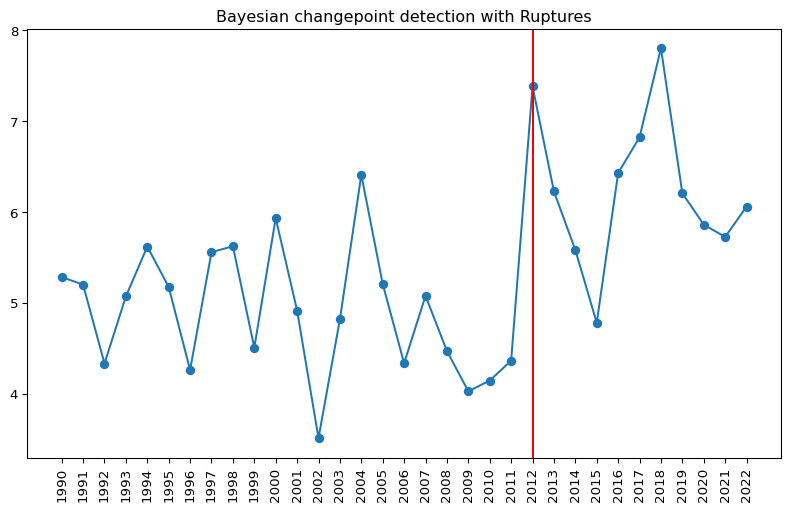

In [73]:
fig, ax = plt.subplots(1, 1, figsize=(800/96, 500/96), dpi=96)

kernel = 'linear'
algo = rpt.KernelCPD(kernel=kernel, min_size=6)
algo.fit(impressions)
result = algo.predict(n_bkps=1)
ax.plot(impressions,marker='o')
for bkp in result[0:-1]:
    ax.axvline(x=bkp, color='r')
ax.set_title("Bayesian changepoint detection with Ruptures")
fig.tight_layout()
#change the x ticks to be the index of mins_played
#crea una lista da 0 a 54
a=list(range(0,33))
b=list(range(1990,2023))
ax.set_xticks(a,b)
#ruota i tick di 90 gradi
plt.xticks(rotation=90)
print("Punti di rottura trovati:", result[0:-1])
plt.show()



## Test Mann-Kendall

### Test Mann-Kendall under-21 2011/2012 to 2022/2023

In [69]:
mean_value = np.mean(mins_played["Minuti giocati under21"][45:])
print(f"Mean: {mean_value}")

# Calcola la varianza
variance_value = np.var(mins_played["Minuti giocati under21"][45:])
print(f"Variance: {variance_value}")

# Calcola l'intervallo di confidenza al 95%
confidence_interval = stats.t.interval(0.95, len(mins_played["Minuti giocati under21"][45:])-1, loc=mean_value, scale=stats.sem(mins_played["Minuti giocati under21"][45:]))
confidence_interval_90 = stats.t.interval(0.90, len(mins_played["Minuti giocati under21"][45:])-1, loc=mean_value, scale=stats.sem(mins_played["Minuti giocati under21"][45:]))

print(f"Confidence Interval 95%: {confidence_interval}")
print(f"Intervallo di Confidenza al 90%: {confidence_interval_90}")

Mean: 6.258808177468464
Variance: 0.6464716130103549
Confidence Interval 95%: (5.692285914566664, 6.825330440370264)
Intervallo di Confidenza al 90%: (5.797975327751416, 6.719641027185512)


### Test Mann-Kendall under-21 1973/1974 to 1984/1985

Mann_Kendall_Test(trend='decreasing', h=True, p=0.0041383639950869355, z=-2.8674177176068465, Tau=-0.6153846153846154, s=-48.0, var_s=268.6666666666667, slope=-0.21135620915032677, intercept=5.336467617349971)


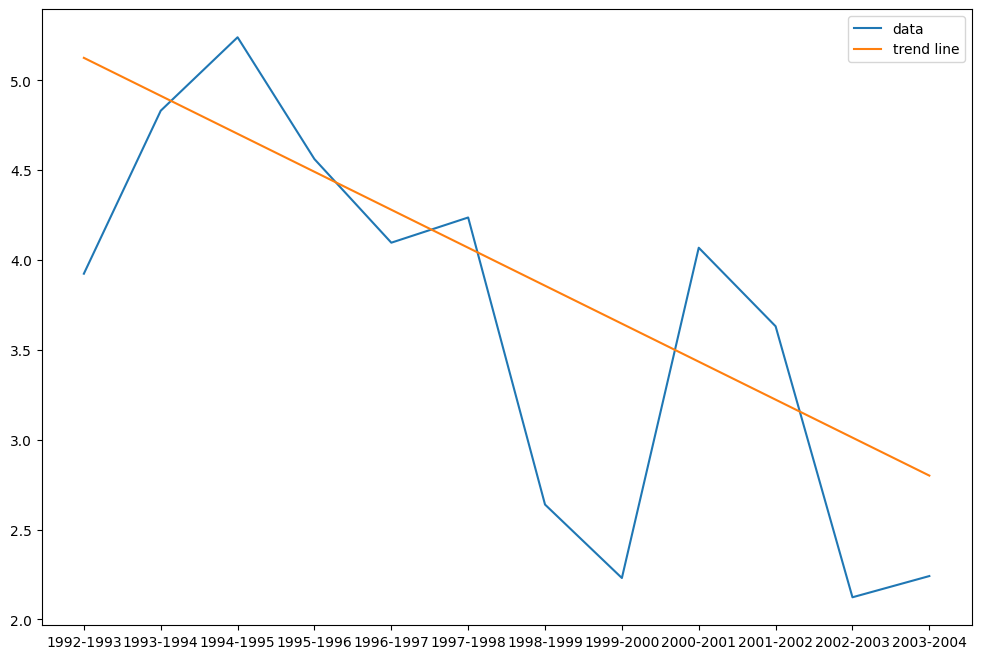

In [189]:
data = (mins_played["Minuti giocati Italiani"][24:37] + mins_played["Minuti giocati Oriundi"][24:37])

fig, ax = plt.subplots(figsize=(12, 8))
res = mk.original_test(data,alpha=0.075)

print(res)
trend_line = np.arange(len(data)) * res.slope + res.intercept

ax.plot(data[1:])
ax.plot(data[1:].index, trend_line[1:])
ax.legend(['data', 'trend line'])

### Test Mann-Kendall under-21 1985/1986 to 2011/2012

Modified_Mann_Kendall_Test_Hamed_Rao_Approach(trend='no trend', h=False, p=0.36033850469835116, z=-0.9147202616087684, Tau=-0.08571428571428572, s=-18.0, var_s=345.39913419913427, slope=-0.020047286591404277, intercept=5.1143171915230745)


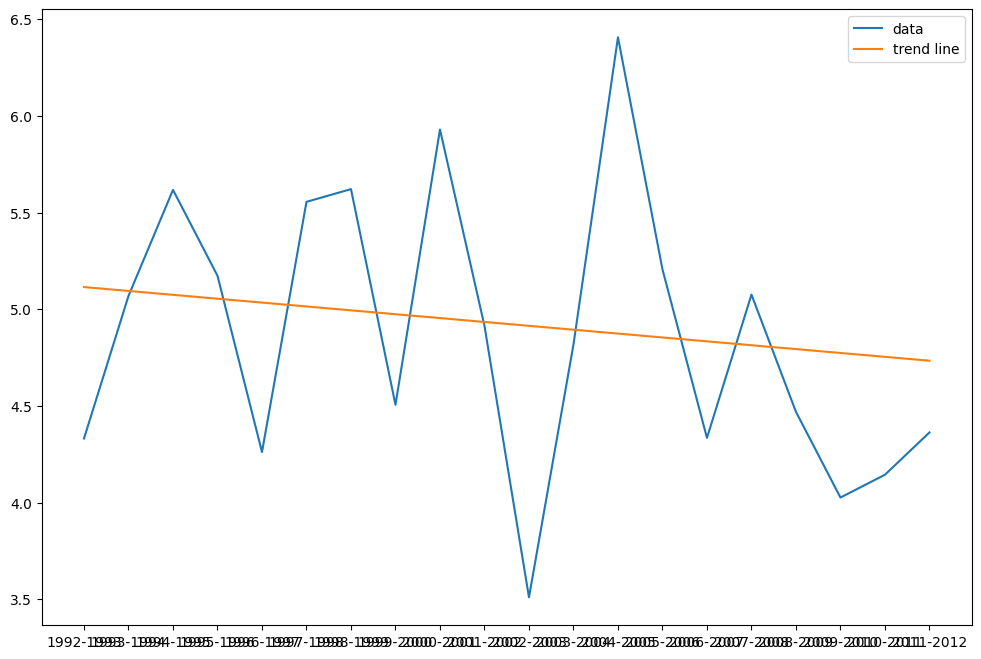

In [8]:
data = (mins_played["Minuti giocati under21"][25:46])
data_bis = (mins_played["Minuti giocati under21"][22:45])


fig, ax = plt.subplots(figsize=(12, 8))
res = mk.hamed_rao_modification_test(data)
print(res)
trend_line = np.arange(len(data)) * res.slope + res.intercept

ax.plot(data[:-1])
ax.plot(data[:-1].index, trend_line[:-1])
ax.legend(['data', 'trend line'])

### Test Mann-kendall e stazioniarietà ADCF 1992/1993 to 2011/2012

Modified_Mann_Kendall_Test_Hamed_Rao_Approach(trend='increasing', h=True, p=0.0006624132333039601, z=3.4046812552279486, Tau=0.38235294117647056, s=52.0, var_s=224.38169934640516, slope=0.13155901116427432, intercept=4.670813397129187)


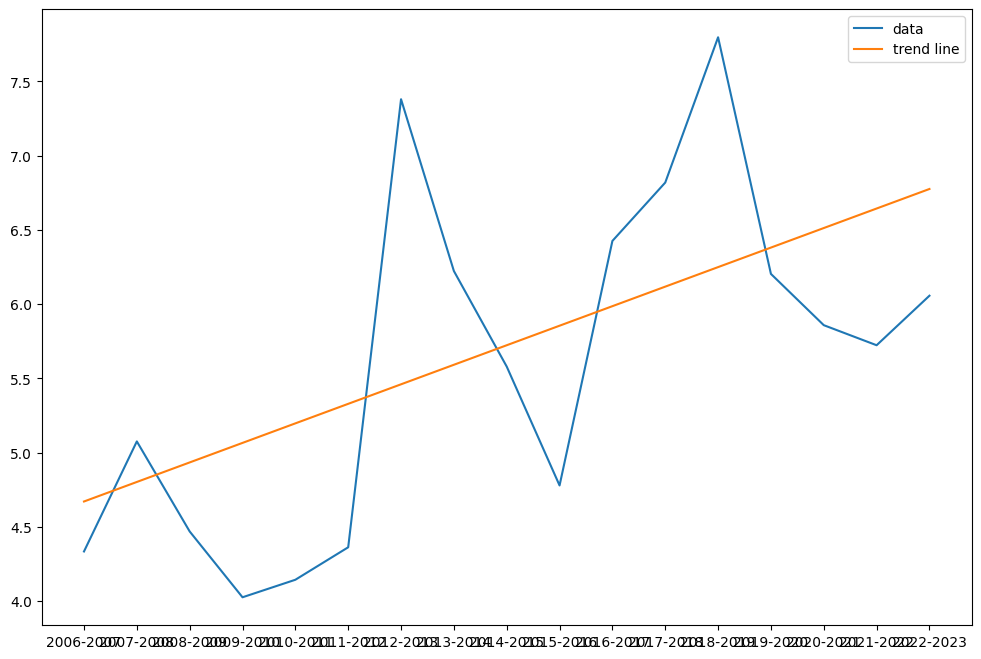

In [44]:
data = (mins_played["Minuti giocati under21"][39:60])

fig, ax = plt.subplots(figsize=(12, 8))
res = mk.hamed_rao_modification_test(data)
print(res)
trend_line = np.arange(len(data)) * res.slope + res.intercept

ax.plot(data)
ax.plot(data.index, trend_line)
ax.legend(['data', 'trend line'])

C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCac

                                 SARIMAX Results                                  
Dep. Variable:     Minuti giocati under21   No. Observations:                   23
Model:                     ARIMA(2, 3, 5)   Log Likelihood                 -24.529
Date:                    Wed, 10 Jan 2024   AIC                             65.058
Time:                            12:59:49   BIC                             73.024
Sample:                                 0   HQIC                            66.613
                                     - 23                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1844      1.956     -0.605      0.545      -5.018       2.649
ar.L2         -0.3761      0.712     -0.528      0.597      -1.771       1.019
ma.L1         -0.871

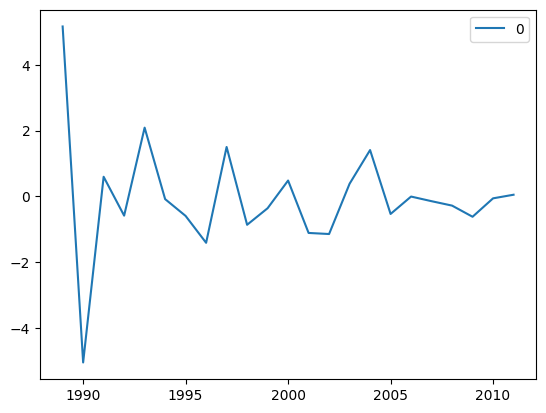

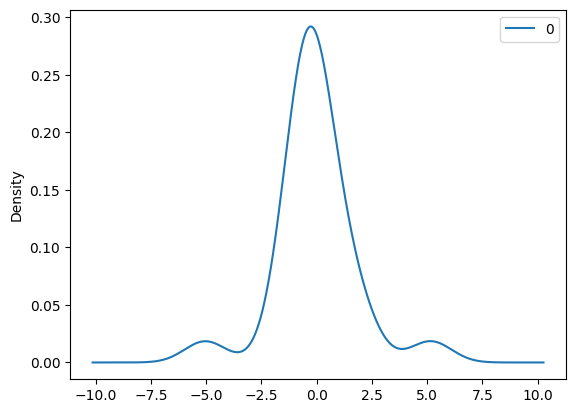

               0
count  23.000000
mean   -0.048745
std     1.760632
min    -5.041745
25%    -0.604099
50%    -0.143953
75%     0.434607
max     5.161616


In [74]:
#fai il modello ARIMA

from statsmodels.tsa.arima.model import ARIMA
from random import random
# fit model

model = ARIMA(mins_played["Minuti giocati under21"][22:45], order=(2,3,5))
#add costant to the model

model_fit = model.fit()
# make prediction
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())



In [89]:
mins_played.tail()

,Minuti giocati under21,Minuti giocati Italiani,Minuti giocati Stranieri,Minuti giocati Oriundi
2018,7.797315,2.310340,5.279107,0.207868
2019,6.203748,2.500000,3.600877,0.102871
2020,5.858852,1.547847,4.022063,0.288942
2021,5.723285,1.750399,3.431685,0.541201
2022,6.056885,2.403907,3.013557,0.639421


In [40]:
serie_a=mins_played

In [41]:
serie_a.index = pd.date_range(start='1967', end='2023', freq='A')


In [43]:
serie_a.head()

,Minuti giocati under21,Minuti giocati Italiani,Minuti giocati Stranieri,Minuti giocati Oriundi
1967-12-31,8.298822,8.298822,0.0,0.000000
1968-12-31,6.051978,6.051978,0.0,0.018939
1969-12-31,7.780724,7.780724,0.0,0.000000
1970-12-31,6.369949,6.369949,0.0,0.000000
1971-12-31,8.583333,8.583333,0.0,0.009470


In [91]:
mins_played.tail()

,Minuti giocati under21,Minuti giocati Italiani,Minuti giocati Stranieri,Minuti giocati Oriundi
2018-12-31,7.797315,2.310340,5.279107,0.207868
2019-12-31,6.203748,2.500000,3.600877,0.102871
2020-12-31,5.858852,1.547847,4.022063,0.288942
2021-12-31,5.723285,1.750399,3.431685,0.541201
2022-12-31,6.056885,2.403907,3.013557,0.639421


In [38]:
#plot the forecast of the model
from statsmodels.graphics.tsaplots import plot_predict

from statsmodels.tsa.arima.model import ARIMA
from random import random
# fit model
model = ARIMA(mins_played["Minuti giocati under21"][:-3], order=(2,3,5))
model_fit = model.fit()
print(model_fit.summary())

# forecast
#yhat = model_fit.predict(1, 54)
#plt.plot(yhat)
#plt.plot(mins_played["Minuti giocati under21"])
#plt.show()


C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing i

                                 SARIMAX Results                                  
Dep. Variable:     Minuti giocati under21   No. Observations:                   53
Model:                     ARIMA(2, 3, 5)   Log Likelihood                 -98.492
Date:                    Mon, 15 Jan 2024   AIC                            212.984
Time:                            19:06:29   BIC                            228.280
Sample:                                 0   HQIC                           218.809
                                     - 53                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1410      0.070    -16.196      0.000      -1.279      -1.003
ar.L2         -0.9977      0.062    -15.977      0.000      -1.120      -0.875
ma.L1         -1.404

C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


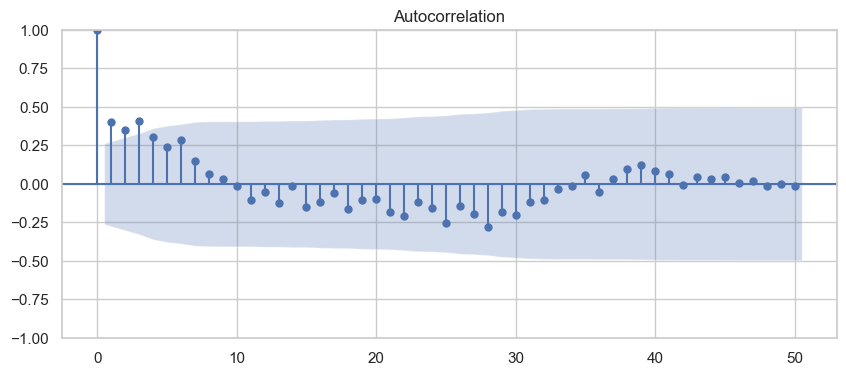

In [91]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(mins_played["Minuti giocati under21"], lags=50)
plt.show()

In [97]:
#usa il modello AR AutoRegression
from statsmodels.tsa.ar_model import AutoReg
from random import random
# fit model
model = AutoReg(mins_played["Minuti giocati under21"],mins_played["Uefa_ranking"], lags=3)
model_fit = model.fit()
print(model_fit.summary())

KeyError: 'Uefa_ranking'

In [197]:
#fai la regressioe OLS condiderando anche i residui
# Fit a linear regression model (you can replace this with your specific model)
model = sm.OLS((mins_played['Minuti giocati Italiani'][39:]+mins_played['Minuti giocati Oriundi'][39:]), np.arange(len(mins_played['Minuti giocati Italiani'][39:]))).fit()
model21= sm.OLS(mins_played['Minuti giocati under21'][39:], np.arange(len(mins_played['Minuti giocati under21'][39:]))).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.740
Model:                            OLS   Adj. R-squared (uncentered):              0.724
Method:                 Least Squares   F-statistic:                              45.63
Date:                Thu, 07 Dec 2023   Prob (F-statistic):                    4.62e-06
Time:                        17:57:37   Log-Likelihood:                         -28.306
No. Observations:                  17   AIC:                                      58.61
Df Residuals:                      16   BIC:                                      59.45
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
